# Introduction

This notebook backtests 2000 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import ticker_stats, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_2000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers)

Simulating 2026 stocks
Failed to smooth prices for AVA!
Failed to smooth prices for HSY!
Failed to smooth prices for NTR!
Failed to smooth prices for OR!
Failed to smooth prices for PIPR!
Failed to smooth prices for PROV!
Failed to smooth prices for RHI!
Failed to smooth prices for STRA!
Unable to determine minima and maxima for the following tickers:
['AVA', 'HSY', 'NTR', 'OR', 'PIPR', 'PROV', 'RHI', 'STRA']
Simulating now with 2018 stocks
tickers= ['PIH', 'FCCY', 'SRCE', 'MMM', 'ATEN', 'AIR', 'ABBV', 'ABMD', 'ABM', 'AXAS', 'ACIA', 'ACAD', 'ACCO', 'ARAY', 'ACRS', 'ACU', 'ACNB', 'ACOR', 'ATNM', 'AYI', 'GOLF', 'ADMS', 'ADUS', 'AGRO', 'IOTS', 'ADBE', 'ATGE', 'ADTN', 'ADRO', 'AAP', 'ADSW', 'WMS', 'AEIS', 'AMD', 'ASIX', 'ADVM', 'ACM', 'AEGN', 'AGLE', 'AERI', 'ACY', 'AJRD', 'AVAV', 'ARPO', 'AES', 'AEZS', 'AMG', 'AGCO', 'A', 'AGRX', 'AGYS', 'AGIO', 'AEM', 'AGFS', 'ALRN', 'AYR', 'AIRG', 'AIRT', 'ATSG', 'AKAM', 'AKBA', 'AKRX', 'AKS', 'ALK', 'ALSK', 'AA', 'ALX', 'AXU', 'ALXN', 'AQN', 'ALCO', 'A

Failed to get possible trades for CRRT
Failed to get possible trades for DESTQ
Failed to get possible trades for HOSS
- LB: Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=LB, cluster=finance]]
Failed to smooth prices for LB!
Failed to get possible trades for NVTRQ
Possible trades to simulate: 21692
before day_close: 2016-09-09 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-09 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-12 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-12 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-13 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-13 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-14 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-14 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-15 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-15 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-16 00:00:00 0 10000 0 10000 0 True
after

after day_close: 2017-01-18 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-19 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-19 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-20 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-20 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-23 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-23 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-24 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-24 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-25 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-25 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-26 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-26 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-27 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-27 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-30 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-30 00:0

after buy: invested in ['SYX', 'TGI', 'OFLX', 'WRLD', 'CHNR'] (5
capital=9959.689533984489 in_use=9952.952374967193 free=6.737159017295426
*** buying 1991.9379067968978 in NATR on 2017-03-20 00:00:00 with target sell date of 2017-05-22 00:00:00
maxed out: NATR is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'WRLD', 'CHNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'WRLD', 'CHNR'] (5
capital=9959.689533984489 in_use=9952.952374967193 free=6.737159017295426
*** buying 1991.9379067968978 in ZIOP on 2017-03-20 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'WRLD', 'CHNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'WRLD', 'CHNR'] (5
capital=9959.689533984489 in_use=9952.952374967193 free=6.737159017295426
*** buying 1991

after buy: invested in ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=9959.689533984489 in_use=9954.59865802014 free=5.090875964348925
*** buying 1991.9379067968978 in TBBK on 2017-03-20 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=9959.689533984489 in_use=9954.59865802014 free=5.090875964348925
*** buying 1991.9379067968978 in KINS on 2017-03-20 00:00:00 with target sell date of 2017-03-22 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=9959.689533984489 in_use=9954.59865802014 free=5.090875964348925
*** buying 1991.93

after buy: invested in ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=9959.689533984489 in_use=9954.59865802014 free=5.090875964348925
*** buying 1991.9379067968978 in IESC on 2017-03-20 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: IESC is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=9959.689533984489 in_use=9954.59865802014 free=5.090875964348925
*** buying 1991.9379067968978 in TMP on 2017-03-20 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: TMP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=9959.689533984489 in_use=9954.59865802014 free=5.090875964348925
*** buying 1991.9379

after buy: invested in ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9753.35778918164 in_use=9701.107486106928 free=52.25030307471502
*** buying 1950.671557836328 in ANIP on 2017-03-22 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: ANIP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9753.35778918164 in_use=9701.107486106928 free=52.25030307471502
*** buying 1950.671557836328 in CORE on 2017-03-22 00:00:00 with target sell date of 2017-04-18 00:00:00
maxed out: CORE is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9753.35778918164 in_use=9701.107486106928 free=52.25030307471502
*** buying 1950.671557836

after buy: invested in ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9879.506225136245 in_use=9879.506225136249 free=0.0
*** buying 1975.901245027249 in WTT on 2017-03-23 00:00:00 with target sell date of 2017-06-07 00:00:00
maxed out: WTT is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9879.506225136245 in_use=9879.506225136249 free=0.0
*** buying 1975.901245027249 in NM on 2017-03-23 00:00:00 with target sell date of 2017-04-04 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9879.506225136245 in_use=9879.506225136249 free=0.0
*** buying 1975.901245027249 in HROW on 2017-03-23 00:00:00 with 

after buy: invested in ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9946.750299950021 in_use=9946.750299950025 free=0.0
*** buying 1989.3500599900042 in GNRC on 2017-03-23 00:00:00 with target sell date of 2017-07-14 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9946.750299950021 in_use=9946.750299950025 free=0.0
*** buying 1989.3500599900042 in ARWR on 2017-03-23 00:00:00 with target sell date of 2017-05-05 00:00:00
maxed out: ARWR is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9946.750299950021 in_use=9946.750299950025 free=0.0
*** buying 1989.3500599900042 in DIN on 2017-03-23 00:00:

after buy: invested in ['ELOX', 'BHC', 'TCCO', 'CTRC', 'SGMO'] (5
capital=10225.997650149991 in_use=10225.997650149995 free=0.0
*** buying 2045.1995300299982 in ZN on 2017-03-28 00:00:00 with target sell date of 2017-05-02 00:00:00
*** selling SGMO on 2017-03-28 00:00:00 to free up money for ZN
profit of selling SGMO on 2017-03-28 00:00:00:  0.0 0.0%
enough money (1906.6199367703973) to buy ZN (capital=10225.997650149991
invested in: ['ELOX', 'BHC', 'TCCO', 'CTRC'] (4
you do not have 1906.6199367703973 and setting amount to 1906.6199367703973
after buy: invested in ['ELOX', 'BHC', 'TCCO', 'CTRC', 'ZN'] (5
capital=10225.997650149991 in_use=10225.997650149995 free=0.0
*** buying 2045.1995300299982 in ATHX on 2017-03-28 00:00:00 with target sell date of 2017-04-19 00:00:00
maxed out: ATHX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TCCO', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TC

after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ'] (4
capital=9600.727064193137 in_use=8030.696759069091 free=1570.0303051240528
*** buying 1920.1454128386274 in CRL on 2017-04-03 00:00:00 with target sell date of 2017-07-11 00:00:00
enough money (1570.0303051240528) to buy CRL (capital=9600.727064193137
invested in: ['BHC', 'TCCO', 'ZN', 'CBZ'] (4
you do not have 1570.0303051240528 and setting amount to 1570.0303051240528
after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ', 'CRL'] (5
capital=9600.727064193137 in_use=9600.727064193145 free=0.0
*** buying 1920.1454128386274 in EBS on 2017-04-03 00:00:00 with target sell date of 2017-05-10 00:00:00
*** selling CBZ on 2017-04-03 00:00:00 to free up money for EBS
profit of selling CBZ on 2017-04-03 00:00:00:  0.0 0.0%
enough money (1920.1454128386274) to buy EBS (capital=9600.727064193137
invested in: ['BHC', 'TCCO', 'ZN', 'CRL'] (4
after buy: invested in ['BHC', 'TCCO', 'ZN', 'CRL', 'EBS'] (5
capital=9600.727064193137 in_use=9600.72706419

after day_close: 2017-04-03 00:00:00 5 9531.849493514695 9531.849493514703 0.0 7.275957614183426e-12 True
invested in: ['BHC', 'TCCO', 'ZN', 'SCL', 'GEOS'] (5
capital=9531.849493514695 in_use=9531.849493514703 free=0.0
*** selling TCCO on 2017-04-04 00:00:00
profit of selling TCCO on 2017-04-04 00:00:00:  41.164609271401105 2.08%
after selling invested in: ['BHC', 'ZN', 'SCL', 'GEOS'] (4
capital=9367.191056429092 in_use=7350.125202130449 free=2017.06585429865
*** buying 1873.4382112858184 in BASI on 2017-04-04 00:00:00 with target sell date of 2017-05-02 00:00:00
enough money (2017.06585429865) to buy BASI (capital=9367.191056429092
invested in: ['BHC', 'ZN', 'SCL', 'GEOS'] (4
after buy: invested in ['BHC', 'ZN', 'SCL', 'GEOS', 'BASI'] (5
capital=9367.191056429092 in_use=9223.563413416268 free=143.62764301283164
*** buying 1873.4382112858184 in DPZ on 2017-04-04 00:00:00 with target sell date of 2017-06-15 00:00:00
*** selling BASI on 2017-04-04 00:00:00 to free up money for DPZ
profit

after buy: invested in ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9322.883799351892 in_use=9322.8837993519 free=0.0
*** buying 1864.5767598703783 in CAMP on 2017-04-05 00:00:00 with target sell date of 2017-04-25 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9322.883799351892 in_use=9322.8837993519 free=0.0
*** buying 1864.5767598703783 in HELE on 2017-04-05 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: HELE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9322.883799351892 in_use=9322.8837993519 free=0.0
*** buying 1864.5767598703783 in BWA on 2017-04-05 00:00:00 with tar

after buy: invested in ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5
capital=9035.942364070099 in_use=9035.942364070106 free=0.0
*** buying 1807.1884728140199 in FNCB on 2017-04-06 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5
capital=9035.942364070099 in_use=9035.942364070106 free=0.0
*** buying 1807.1884728140199 in ISNS on 2017-04-06 00:00:00 with target sell date of 2017-05-08 00:00:00
*** selling STRL on 2017-04-06 00:00:00 to free up money for ISNS
profit of selling STRL on 2017-04-06 00:00:00:  0.0 0.0%
enough money (1727.6211944092663) to buy ISNS (capital=9035.942364070099
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN'] (4
you do not have 1727.6211944092663 and setting amount to 1727.6211944092663
after buy: invested in ['ZN', 'GEOS', 'LU

after buy: invested in ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9113.952556781236 in_use=9113.952556781243 free=0.0
*** buying 1822.7905113562472 in CVCY on 2017-04-10 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: CVCY is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9113.952556781236 in_use=9113.952556781243 free=0.0
*** buying 1822.7905113562472 in BSTC on 2017-04-10 00:00:00 with target sell date of 2017-05-11 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9113.952556781236 in_use=9113.952556781243 free=0.0
*** buying 1822.7905113562472 in MCS on 2017-04-10 00:00:

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'DAIO'] (5
capital=8941.115752729236 in_use=8941.115752729243 free=0.0
*** buying 1788.2231505458471 in SGC on 2017-04-12 00:00:00 with target sell date of 2017-04-26 00:00:00
*** selling DAIO on 2017-04-12 00:00:00 to free up money for SGC
profit of selling DAIO on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1596.0734256277005) to buy SGC (capital=8941.115752729236
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT'] (4
you do not have 1596.0734256277005 and setting amount to 1596.0734256277005
after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'SGC'] (5
capital=8941.115752729236 in_use=8941.115752729243 free=0.0
*** buying 1788.2231505458471 in CSGS on 2017-04-12 00:00:00 with target sell date of 2017-05-30 00:00:00
*** selling SGC on 2017-04-12 00:00:00 to free up money for CSGS
profit of selling SGC on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1596.0734256277005) to buy CSGS (capital=8941.115752729236
invested in: ['ZN', 'GEOS', '

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8917.739261253259 in_use=8917.739261253266 free=0.0
*** buying 1783.5478522506517 in HWBK on 2017-04-13 00:00:00 with target sell date of 2017-06-20 00:00:00
maxed out: HWBK is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8917.739261253259 in_use=8917.739261253266 free=0.0
*** buying 1783.5478522506517 in BHB on 2017-04-13 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: BHB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8917.739261253259 in_use=8917.739261253266 free=0.0
*** buying 1783.5478522506517 in CASS on 2017-04-13 00:00:0

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5
capital=8951.022046890383 in_use=8951.02204689039 free=0.0
*** buying 1790.2044093780764 in EXPR on 2017-04-17 00:00:00 with target sell date of 2017-08-23 00:00:00
maxed out: EXPR is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5
capital=8951.022046890383 in_use=8951.02204689039 free=0.0

before day_close: 2017-04-17 00:00:00 5 8951.022046890383 8951.02204689039 0.0 7.275957614183426e-12 True
after day_close: 2017-04-17 00:00:00 5 8986.904991449703 8986.90499144971 0.0 7.275957614183426e-12 True
*** buying 1797.3809982899406 in FORM on 2017-04-18 00:00:00 with target sell date of 2017-05-23 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5)

not enough 

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5
capital=9106.224719050162 in_use=9106.22471905017 free=0.0
*** buying 1821.2449438100325 in NM on 2017-04-19 00:00:00 with target sell date of 2017-08-18 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5
capital=9106.224719050162 in_use=9106.22471905017 free=0.0

before day_close: 2017-04-19 00:00:00 5 9106.224719050162 9106.22471905017 0.0 7.275957614183426e-12 True
after day_close: 2017-04-19 00:00:00 5 9110.63513595938 9110.635135959386 0.0 7.275957614183426e-12 True
*** buying 1822.1270271918759 in NVDA on 2017-04-20 00:00:00 with target sell date of 2017-06-26 00:00:00
*** selling SES on 2017-04-20 00:00:00 to free up money for NVDA
profit of selling SES on 2017-04-20 00:00:00:  -59.67778051389246 -3.45%
enough money (1670.

after buy: invested in ['ZN', 'GEOS', 'LULU', 'NVDA', 'SRT'] (5
capital=9255.617440336582 in_use=9255.61744033659 free=0.0
*** buying 1851.1234880673164 in GLUU on 2017-04-28 00:00:00 with target sell date of 2017-05-10 00:00:00
*** selling SRT on 2017-04-28 00:00:00 to free up money for GLUU
profit of selling SRT on 2017-04-28 00:00:00:  0.0 0.0%
enough money (1584.8042972280891) to buy GLUU (capital=9255.617440336582
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA'] (4
you do not have 1584.8042972280891 and setting amount to 1584.8042972280891
after buy: invested in ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5
capital=9255.617440336582 in_use=9255.61744033659 free=0.0
*** buying 1851.1234880673164 in MRCY on 2017-04-28 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: MRCY is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 

after day_close: 2017-04-28 00:00:00 5 9282.790120751468 9282.790120751475 0.0 7.275957614183426e-12 True
*** buying 1856.5580241502935 in BIIB on 2017-05-01 00:00:00 with target sell date of 2017-06-22 00:00:00
maxed out: BIIB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5
capital=9282.790120751468 in_use=9282.790120751475 free=0.0
*** buying 1856.5580241502935 in AJG on 2017-05-01 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: AJG is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5
capital=9282.790120751468 in_use=9282.790120751475 free=0.0
*** buying 1856.5580241502935 in NPO on 2017-05-01 00:00:00 with target sell d

after buy: invested in ['LULU', 'NVDA', 'CTRC', 'IOVA'] (4
capital=9600.141222440581 in_use=7092.998067173745 free=2507.1431552668423
*** buying 1920.0282444881163 in SJW on 2017-05-02 00:00:00 with target sell date of 2017-06-12 00:00:00
enough money (2507.1431552668423) to buy SJW (capital=9600.141222440581
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA'] (4
after buy: invested in ['LULU', 'NVDA', 'CTRC', 'IOVA', 'SJW'] (5
capital=9600.141222440581 in_use=9013.02631166186 free=587.114910778726
*** buying 1920.0282444881163 in TCCO on 2017-05-02 00:00:00 with target sell date of 2017-05-04 00:00:00
*** selling SJW on 2017-05-02 00:00:00 to free up money for TCCO
profit of selling SJW on 2017-05-02 00:00:00:  -2.2737367544323206e-13 -0.0%
enough money (2507.143155266842) to buy TCCO (capital=9600.141222440581
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA'] (4
after buy: invested in ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5
capital=9600.141222440581 in_use=9013.02631166186 free=587.1149107

after day_close: 2017-05-02 00:00:00 5 9782.133956110229 9195.019045331508 587.1149107787255 5.002220859751105e-12 True
*** buying 1956.4267912220457 in CPSI on 2017-05-03 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: CPSI is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5
capital=9782.133956110229 in_use=9195.019045331508 free=587.1149107787255
*** buying 1956.4267912220457 in LGL on 2017-05-03 00:00:00 with target sell date of 2017-08-22 00:00:00
maxed out: LGL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5
capital=9782.133956110229 in_use=9195.019045331508 free=587.1149107787255
*** buying 1956.426791222045

after buy: invested in ['LULU', 'NVDA', 'IOVA', 'PZG'] (4
capital=9705.854954952096 in_use=7327.337743817964 free=2378.517211134137
*** buying 1941.170990990419 in TGA on 2017-05-04 00:00:00 with target sell date of 2017-05-17 00:00:00
enough money (2378.517211134137) to buy TGA (capital=9705.854954952096
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG'] (4
after buy: invested in ['LULU', 'NVDA', 'IOVA', 'PZG', 'TGA'] (5
capital=9705.854954952096 in_use=9268.508734808383 free=437.346220143718
*** buying 1941.170990990419 in CRK on 2017-05-04 00:00:00 with target sell date of 2017-05-11 00:00:00
*** selling TGA on 2017-05-04 00:00:00 to free up money for CRK
profit of selling TGA on 2017-05-04 00:00:00:  0.0 0.0%
enough money (2378.517211134137) to buy CRK (capital=9705.854954952096
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG'] (4
after buy: invested in ['LULU', 'NVDA', 'IOVA', 'PZG', 'CRK'] (5
capital=9705.854954952096 in_use=9268.508734808383 free=437.346220143718
*** buying 1941.1709909904

after day_close: 2017-05-05 00:00:00 5 9742.132538642514 9300.76516558292 441.3673730596008 6.139089236967266e-12 True
*** buying 1948.4265077285029 in MSEX on 2017-05-08 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: MSEX is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5
capital=9742.132538642514 in_use=9300.76516558292 free=441.3673730596008
*** buying 1948.4265077285029 in ARL on 2017-05-08 00:00:00 with target sell date of 2017-05-31 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5
capital=9742.132538642514 in_use=9300.76516558292 free=441.3673730596008
*** buying 1948.4265077285029 in TL

after buy: invested in ['LULU', 'NVDA', 'IOVA', 'TCCO', 'NSSC'] (5
capital=9797.198652284782 in_use=9331.458164206955 free=465.74048807783356

before day_close: 2017-05-09 00:00:00 5 9797.198652284782 9331.458164206955 465.74048807783356 6.821210263296962e-12 True
after day_close: 2017-05-09 00:00:00 5 9827.988155919931 9362.247667842104 465.74048807783356 6.821210263296962e-12 True
*** buying 1965.5976311839863 in ELMD on 2017-05-10 00:00:00 with target sell date of 2017-07-18 00:00:00
maxed out: ELMD is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'IOVA', 'TCCO', 'NSSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'IOVA', 'TCCO', 'NSSC'] (5
capital=9827.988155919931 in_use=9362.247667842104 free=465.74048807783356
*** buying 1965.5976311839863 in IAG on 2017-05-10 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in


after buy: invested in ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10129.092324892143 in_use=9812.63784277847 free=316.45448211368034
*** buying 2025.8184649784284 in KMB on 2017-05-11 00:00:00 with target sell date of 2017-09-13 00:00:00
maxed out: KMB is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10129.092324892143 in_use=9812.63784277847 free=316.45448211368034
*** buying 2025.8184649784284 in ASTE on 2017-05-11 00:00:00 with target sell date of 2017-10-09 00:00:00
maxed out: ASTE is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10129.092324892143 in_use=9812.63784277847 free=316.45448211368034

before d

after buy: invested in ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5
capital=10389.67488732245 in_use=10385.38295076328 free=4.2919365591774294

before day_close: 2017-05-15 00:00:00 5 10389.67488732245 10385.38295076328 4.2919365591774294 7.73070496506989e-12 True
after day_close: 2017-05-15 00:00:00 5 10315.175057840754 10310.883121281584 4.2919365591774294 7.73070496506989e-12 True
*** buying 2063.035011568151 in TITN on 2017-05-16 00:00:00 with target sell date of 2017-05-26 00:00:00
maxed out: TITN is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5
capital=10315.175057840754 in_use=10310.883121281584 free=4.2919365591774294
*** buying 2063.035011568151 in EXC on 2017-05-16 00:00:00 with target sell date of 2017-06-05 00:00:00
maxed out: EXC is not expected to perform better than stocks already invested in
invest

after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'SPPI'] (5
capital=9886.5539587761 in_use=9869.974883077688 free=16.579075698419956
*** buying 1977.31079175522 in ODC on 2017-05-17 00:00:00 with target sell date of 2017-07-03 00:00:00
*** selling SPPI on 2017-05-17 00:00:00 to free up money for ODC
profit of selling SPPI on 2017-05-17 00:00:00:  0.0 0.0%
enough money (1993.88986745364) to buy ODC (capital=9886.5539587761
invested in: ['LULU', 'NVDA', 'INS', 'SES'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'ODC'] (5
capital=9886.5539587761 in_use=9869.974883077688 free=16.579075698419956
*** buying 1977.31079175522 in VRTX on 2017-05-17 00:00:00 with target sell date of 2017-06-05 00:00:00
*** selling ODC on 2017-05-17 00:00:00 to free up money for VRTX
profit of selling ODC on 2017-05-17 00:00:00:  -2.2737367544323206e-13 -0.0%
enough money (1993.8898674536397) to buy VRTX (capital=9886.5539587761
invested in: ['LULU', 'NVDA', 'INS', 'SES'] (4
after buy: invested i

after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'MU'] (5
capital=9745.562353277604 in_use=9682.343715934625 free=63.21863734298631
*** buying 1949.1124706555208 in ATRS on 2017-05-18 00:00:00 with target sell date of 2017-06-14 00:00:00
*** selling MU on 2017-05-18 00:00:00 to free up money for ATRS
profit of selling MU on 2017-05-18 00:00:00:  -2.2737367544323206e-13 -0.0%
enough money (2009.2575679076956) to buy ATRS (capital=9745.562353277604
invested in: ['LULU', 'NVDA', 'INS', 'SES'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5
capital=9745.562353277604 in_use=9685.417256025436 free=60.145097252174764
*** buying 1949.1124706555208 in PFBI on 2017-05-18 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PFBI is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5
capital=

after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5
capital=9678.893497940024 in_use=9678.89349794003 free=0.0
*** buying 1935.7786995880047 in CVCO on 2017-05-19 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: CVCO is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5
capital=9678.893497940024 in_use=9678.89349794003 free=0.0
*** buying 1935.7786995880047 in FBNC on 2017-05-19 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: FBNC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5
capital=9678.893497940024 in_use=9678.89349794003 free=0.0
*** buying 1935.7786995880047 in NPO on 2017-05-19 00:0

after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5
capital=9846.94492998878 in_use=9846.944929988786 free=0.0
*** buying 1969.388985997756 in MKTX on 2017-05-22 00:00:00 with target sell date of 2017-05-30 00:00:00
maxed out: MKTX is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5
capital=9846.94492998878 in_use=9846.944929988786 free=0.0
*** buying 1969.388985997756 in UTL on 2017-05-22 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: UTL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5
capital=9846.94492998878 in_use=9846.944929988786 free=0.0
*** buying 1969.388985997756 in SB on 2017-05-22 00:00:00 with t

after buy: invested in ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5
capital=9817.766013801105 in_use=9817.76601380111 free=0.0
*** buying 1963.553202760221 in MSBF on 2017-05-23 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: MSBF is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5
capital=9817.766013801105 in_use=9817.76601380111 free=0.0
*** buying 1963.553202760221 in FHB on 2017-05-23 00:00:00 with target sell date of 2017-07-12 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5
capital=9817.766013801105 in_use=9817.76601380111 free=0.0
*** buying 1963.553202760221 in BFIN on 2017-05-23 00:00:00 with

after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5
capital=9775.752369651806 in_use=9775.75236965181 free=0.0
*** buying 1955.1504739303612 in PKE on 2017-05-25 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: PKE is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5
capital=9775.752369651806 in_use=9775.75236965181 free=0.0
*** buying 1955.1504739303612 in WBS on 2017-05-25 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: WBS is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5
capital=9775.752369651806 in_use=9775.75236965181 free=0.0
*** buying 1955.1504739303612 in HFWA on 2017-05-25 00:00:00 wit

after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5
capital=9834.784150842315 in_use=9834.784150842319 free=0.0
*** buying 1966.956830168463 in SFST on 2017-05-30 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: SFST is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5
capital=9834.784150842315 in_use=9834.784150842319 free=0.0
*** buying 1966.956830168463 in FRPH on 2017-05-30 00:00:00 with target sell date of 2017-07-06 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5
capital=9834.784150842315 in_use=9834.784150842319 free=0.0
*** buying 1966.956830168463 in CNC on 2017-05-30 00:0

after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'LMNR'] (5
capital=10068.834935052164 in_use=9949.252577427898 free=119.5823576242692
*** buying 2013.7669870104328 in TIPT on 2017-05-31 00:00:00 with target sell date of 2017-06-08 00:00:00
*** selling LMNR on 2017-05-31 00:00:00 to free up money for TIPT
profit of selling LMNR on 2017-05-31 00:00:00:  0.0 0.0%
enough money (2133.349344634702) to buy TIPT (capital=10068.834935052164
invested in: ['LULU', 'NVDA', 'INS', 'IRDM'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'TIPT'] (5
capital=10068.834935052164 in_use=9949.252577427898 free=119.5823576242692
*** buying 2013.7669870104328 in MNTA on 2017-05-31 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'TIPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'TIPT'] (5
capital=10068.834

after buy: invested in ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5
capital=10312.441388019693 in_use=10312.441388019697 free=0.0
*** buying 2062.4882776039385 in VNDA on 2017-06-02 00:00:00 with target sell date of 2017-06-26 00:00:00
maxed out: VNDA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5
capital=10312.441388019693 in_use=10312.441388019697 free=0.0
*** buying 2062.4882776039385 in SIGA on 2017-06-02 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: SIGA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5
capital=10312.441388019693 in_use=10312.441388019697 free=0.0
*** buying 2062.4882776039385 in NEM on 2017-06-02 00:00

after buy: invested in ['NVDA', 'INS', 'BHC', 'SGMO', 'AVID'] (5
capital=10456.96647835202 in_use=10456.966478352024 free=0.0
*** buying 2091.393295670404 in PGC on 2017-06-07 00:00:00 with target sell date of 2017-06-29 00:00:00
*** selling AVID on 2017-06-07 00:00:00 to free up money for PGC
profit of selling AVID on 2017-06-07 00:00:00:  0.0 0.0%
enough money (2032.762788192611) to buy PGC (capital=10456.96647835202
invested in: ['NVDA', 'INS', 'BHC', 'SGMO'] (4
you do not have 2032.762788192611 and setting amount to 2032.762788192611
after buy: invested in ['NVDA', 'INS', 'BHC', 'SGMO', 'PGC'] (5
capital=10456.96647835202 in_use=10456.966478352024 free=0.0
*** buying 2091.393295670404 in PWOD on 2017-06-07 00:00:00 with target sell date of 2017-06-14 00:00:00
*** selling PGC on 2017-06-07 00:00:00 to free up money for PWOD
profit of selling PGC on 2017-06-07 00:00:00:  2.2737367544323206e-13 0.0%
enough money (2032.7627881926112) to buy PWOD (capital=10456.96647835202
invested in: 

after buy: invested in ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5
capital=10430.151303586634 in_use=10430.151303586637 free=0.0
*** buying 2086.0302607173267 in BWA on 2017-06-08 00:00:00 with target sell date of 2017-07-14 00:00:00
maxed out: BWA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5
capital=10430.151303586634 in_use=10430.151303586637 free=0.0
*** buying 2086.0302607173267 in AEO on 2017-06-08 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: AEO is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5
capital=10430.151303586634 in_use=10430.151303586637 free=0.0
*** buying 2086.0302607173267 in SBBX on 2017-06-08 00:00:00

after buy: invested in ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5
capital=10523.869408421207 in_use=10149.926200561567 free=373.9432078596428
*** buying 2104.7738816842416 in GLUU on 2017-06-12 00:00:00 with target sell date of 2017-07-24 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5
capital=10523.869408421207 in_use=10149.926200561567 free=373.9432078596428
*** buying 2104.7738816842416 in HOFT on 2017-06-12 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5
capital=10523.869408421207 in_use=10149.926200561567 free=373.9432078596428
*** buyin

after buy: invested in ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10802.457037619966 in_use=10309.847184030252 free=492.6098535897181
*** buying 2160.491407523993 in PAYS on 2017-06-14 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10802.457037619966 in_use=10309.847184030252 free=492.6098535897181
*** buying 2160.491407523993 in INT on 2017-06-14 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: INT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10802.457037619966 in_use=10309.847184030252 free=492.6098535897181
*** buying 21

after buy: invested in ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5
capital=11283.824118916598 in_use=10726.704484756183 free=557.1196341604195
*** buying 2256.7648237833196 in AEGN on 2017-06-20 00:00:00 with target sell date of 2017-07-26 00:00:00
maxed out: AEGN is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5
capital=11283.824118916598 in_use=10726.704484756183 free=557.1196341604195
*** buying 2256.7648237833196 in CYH on 2017-06-20 00:00:00 with target sell date of 2017-07-05 00:00:00
*** selling LZB on 2017-06-20 00:00:00 to free up money for CYH
profit of selling LZB on 2017-06-20 00:00:00:  0.0 0.0%
enough money (2813.884457943739) to buy CYH (capital=11283.824118916598
invested in: ['INS', 'BHC', 'DXCM', 'TACT'] (4
after buy: invested in ['INS', 'BHC', 'DXCM', 'TACT', 'CYH'] (5
capital=11283.824118916598 in

after day_close: 2017-06-27 00:00:00 5 11447.893599597863 10890.773965437447 557.1196341604195 4.092726157978177e-12 True
*** buying 2289.5787199195724 in KMPR on 2017-06-28 00:00:00 with target sell date of 2017-08-22 00:00:00
maxed out: KMPR is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5
capital=11447.893599597863 in_use=10890.773965437447 free=557.1196341604195
*** buying 2289.5787199195724 in ICFI on 2017-06-28 00:00:00 with target sell date of 2017-11-17 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5
capital=11447.893599597863 in_use=10890.773965437447 free=557.1196341604195
*** buying 2289.578719919572

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'BKH'] (5
capital=11409.086229074348 in_use=11312.953437192145 free=96.13279188220667
*** buying 2281.8172458148697 in ARL on 2017-07-03 00:00:00 with target sell date of 2017-09-19 00:00:00
*** selling BKH on 2017-07-03 00:00:00 to free up money for ARL
profit of selling BKH on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2377.9500376970764) to buy ARL (capital=11409.086229074348
invested in: ['BHC', 'DXCM', 'TACT', 'MELI'] (4
after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'ARL'] (5
capital=11409.086229074348 in_use=11312.953437192145 free=96.13279188220667
*** buying 2281.8172458148697 in WTT on 2017-07-03 00:00:00 with target sell date of 2017-10-04 00:00:00
*** selling ARL on 2017-07-03 00:00:00 to free up money for WTT
profit of selling ARL on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2377.9500376970764) to buy WTT (capital=11409.086229074348
invested in: ['BHC', 'DXCM', 'TACT', 'MELI'] (4
after buy: invested in ['B

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5
capital=11383.02469129481 in_use=11254.834683082405 free=128.19000821240752
*** buying 2276.6049382589617 in TSLA on 2017-07-05 00:00:00 with target sell date of 2017-08-17 00:00:00
maxed out: TSLA is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5
capital=11383.02469129481 in_use=11254.834683082405 free=128.19000821240752
*** buying 2276.6049382589617 in WWD on 2017-07-05 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5
capital=11383.02469129481 in_use=11254.834683082405 free=128.19000821240752
*** buying 

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5
capital=11372.011502514064 in_use=11284.157660278943 free=87.85384223512528
*** buying 2274.402300502813 in LNT on 2017-07-06 00:00:00 with target sell date of 2017-07-20 00:00:00
maxed out: LNT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5
capital=11372.011502514064 in_use=11284.157660278943 free=87.85384223512528
*** buying 2274.402300502813 in CVS on 2017-07-06 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: CVS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5
capital=11372.011502514064 in_use=11284.157660278943 free=87.85384223512528
*** buying

after buy: invested in ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5
capital=11424.86621968287 in_use=11424.866219682874 free=0.0
*** buying 2284.973243936574 in VERU on 2017-07-10 00:00:00 with target sell date of 2017-08-08 00:00:00
maxed out: VERU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5
capital=11424.86621968287 in_use=11424.866219682874 free=0.0
*** buying 2284.973243936574 in FORM on 2017-07-10 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5
capital=11424.86621968287 in_use=11424.866219682874 free=0.0
*** buying 2284.973243936574 in HMSY on 2017-07-10 

after buy: invested in ['BHC', 'DXCM', 'TACT', 'GEOS', 'AEZS'] (5
capital=11499.282572770984 in_use=11421.109655916542 free=78.17291685444707
*** buying 2299.856514554197 in PAYS on 2017-07-12 00:00:00 with target sell date of 2017-07-21 00:00:00
*** selling AEZS on 2017-07-12 00:00:00 to free up money for PAYS
profit of selling AEZS on 2017-07-12 00:00:00:  0.0 0.0%
enough money (2378.029431408644) to buy PAYS (capital=11499.282572770984
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS'] (4
after buy: invested in ['BHC', 'DXCM', 'TACT', 'GEOS', 'PAYS'] (5
capital=11499.282572770984 in_use=11421.109655916542 free=78.17291685444707
*** buying 2299.856514554197 in VSAT on 2017-07-12 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: VSAT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'PAYS'] (5
capital=11499.282

after buy: invested in ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5
capital=11749.119943249265 in_use=11618.698655399181 free=130.42128785008845
*** buying 2349.823988649853 in TG on 2017-07-17 00:00:00 with target sell date of 2017-08-14 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5
capital=11749.119943249265 in_use=11618.698655399181 free=130.42128785008845
*** buying 2349.823988649853 in INDB on 2017-07-17 00:00:00 with target sell date of 2017-08-04 00:00:00
maxed out: INDB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5
capital=11749.119943249265 in_use=11618.698655399181 free=130.42128785008845
*** buying 2

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'DPZ', 'TRST'] (5
capital=11656.648004471825 in_use=11123.554983577815 free=533.0930208940158
*** buying 2331.329600894365 in LHCG on 2017-07-18 00:00:00 with target sell date of 2017-10-25 00:00:00
*** selling TRST on 2017-07-18 00:00:00 to free up money for LHCG
profit of selling TRST on 2017-07-18 00:00:00:  0.0 0.0%
enough money (2864.4226217883806) to buy LHCG (capital=11656.648004471825
invested in: ['DXCM', 'TACT', 'GEOS', 'DPZ'] (4
after buy: invested in ['DXCM', 'TACT', 'GEOS', 'DPZ', 'LHCG'] (5
capital=11656.648004471825 in_use=11123.554983577815 free=533.0930208940158
*** buying 2331.329600894365 in SLCT on 2017-07-18 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: SLCT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'DPZ', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'DPZ', 'LHCG'] (5
capital=11656.64

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5
capital=11745.03900681628 in_use=11160.561919052949 free=584.4770877633355
*** buying 2349.007801363256 in AUB on 2017-07-19 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: AUB is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5
capital=11745.03900681628 in_use=11160.561919052949 free=584.4770877633355
*** buying 2349.007801363256 in NSC on 2017-07-19 00:00:00 with target sell date of 2017-09-14 00:00:00
maxed out: NSC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5
capital=11745.03900681628 in_use=11160.561919052949 free=584.4770877633355
*** buyi

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5
capital=11841.49891857721 in_use=11275.613358049897 free=565.8855605273179
*** buying 2368.299783715442 in HLIO on 2017-07-20 00:00:00 with target sell date of 2017-08-10 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5
capital=11841.49891857721 in_use=11275.613358049897 free=565.8855605273179
*** buying 2368.299783715442 in QUMU on 2017-07-20 00:00:00 with target sell date of 2017-08-07 00:00:00
maxed out: QUMU is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5
capital=11841.49891857721 in_use=11275.613358049897 free=565.8855605273179
*** buyin

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'HCCI'] (5
capital=11786.673507953448 in_use=11192.827085138795 free=593.8464228146586
*** buying 2357.3347015906897 in IOVA on 2017-07-21 00:00:00 with target sell date of 2017-09-07 00:00:00
*** selling HCCI on 2017-07-21 00:00:00 to free up money for IOVA
profit of selling HCCI on 2017-07-21 00:00:00:  0.0 0.0%
enough money (2951.1811244053483) to buy IOVA (capital=11786.673507953448
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX'] (4
after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5
capital=11786.673507953448 in_use=11192.827085138795 free=593.8464228146586
*** buying 2357.3347015906897 in FHN on 2017-07-21 00:00:00 with target sell date of 2017-10-13 00:00:00
maxed out: FHN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5
capital=11786.67

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11623.871527526471 in_use=11116.25952823414 free=507.6119992923341
*** buying 2324.7743055052943 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11623.871527526471 in_use=11116.25952823414 free=507.6119992923341
*** buying 2324.7743055052943 in VTR on 2017-07-26 00:00:00 with target sell date of 2017-08-21 00:00:00
maxed out: VTR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11623.871527526471 in_use=11116.25952823414 free=507.6119992923341
*** buying 232

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5
capital=11675.879845041945 in_use=11265.581157834371 free=410.2986872075776
*** buying 2335.175969008389 in CNC on 2017-07-31 00:00:00 with target sell date of 2017-09-08 00:00:00
maxed out: CNC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5
capital=11675.879845041945 in_use=11265.581157834371 free=410.2986872075776
*** buying 2335.175969008389 in NOV on 2017-07-31 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: NOV is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5
capital=11675.879845041945 in_use=11265.581157834371 free=410.2986872075776
*** buying

after day_close: 2017-08-07 00:00:00 5 12018.346505101534 11433.28765648746 585.058848614075 1.8189894035458565e-12 True
*** buying 2403.6693010203066 in HRI on 2017-08-08 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: HRI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5
capital=12018.346505101534 in_use=11433.28765648746 free=585.058848614075
*** buying 2403.6693010203066 in BCPC on 2017-08-08 00:00:00 with target sell date of 2017-10-04 00:00:00
maxed out: BCPC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5
capital=12018.346505101534 in_use=11433.28765648746 free=585.058848614075
*** buying 2403.6693010203066 in NP

after buy: invested in ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5
capital=11867.20657590738 in_use=11314.37118222029 free=552.8353936870913
*** buying 2373.441315181476 in PFIE on 2017-08-09 00:00:00 with target sell date of 2017-08-16 00:00:00
maxed out: PFIE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5
capital=11867.20657590738 in_use=11314.37118222029 free=552.8353936870913
*** buying 2373.441315181476 in CATY on 2017-08-09 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: CATY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5
capital=11867.20657590738 in_use=11314.37118222029 free=552.8353936870913
*** buying 2373.4

after buy: invested in ['DXCM', 'TACT', 'UNT', 'SGMO', 'AMWD'] (5
capital=11853.759397581747 in_use=11592.851605868269 free=260.9077917134832
*** buying 2370.7518795163496 in IMAX on 2017-08-11 00:00:00 with target sell date of 2017-12-05 00:00:00
*** selling AMWD on 2017-08-11 00:00:00 to free up money for IMAX
profit of selling AMWD on 2017-08-11 00:00:00:  0.0 0.0%
enough money (2631.659671229833) to buy IMAX (capital=11853.759397581747
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO'] (4
after buy: invested in ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMAX'] (5
capital=11853.759397581747 in_use=11592.851605868269 free=260.9077917134832
*** buying 2370.7518795163496 in ITT on 2017-08-11 00:00:00 with target sell date of 2017-11-15 00:00:00
maxed out: ITT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMAX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMAX'] (5
capital=11853.759


not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5
capital=11853.759397581747 in_use=11592.851605868269 free=260.9077917134832
*** buying 2370.7518795163496 in BRO on 2017-08-11 00:00:00 with target sell date of 2017-08-14 00:00:00
maxed out: BRO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5
capital=11853.759397581747 in_use=11592.851605868269 free=260.9077917134832
*** buying 2370.7518795163496 in KAMN on 2017-08-11 00:00:00 with target sell date of 2017-09-11 00:00:00
maxed out: KAMN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5
capital=11853.759397581747 in_use=11592.85

after buy: invested in ['DXCM', 'TACT', 'UNT', 'SGMO', 'BHC'] (5
capital=13042.337860372845 in_use=12544.921243906076 free=497.41661646677767
*** buying 2608.467572074569 in AAME on 2017-08-15 00:00:00 with target sell date of 2017-09-26 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'BHC'] (5
capital=13042.337860372845 in_use=12544.921243906076 free=497.41661646677767

before day_close: 2017-08-15 00:00:00 5 13042.337860372845 12544.921243906076 497.41661646677767 8.185452315956354e-12 True
after day_close: 2017-08-15 00:00:00 5 12828.793620560158 12331.377004093389 497.41661646677767 8.185452315956354e-12 True
*** buying 2565.758724112032 in HBMD on 2017-08-16 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested i

after buy: invested in ['DXCM', 'TACT', 'SGMO', 'BHC', 'RGS'] (5
capital=12644.761927537282 in_use=12615.160731719063 free=29.601195818227552
*** buying 2528.9523855074563 in FMAO on 2017-08-17 00:00:00 with target sell date of 2017-09-18 00:00:00
maxed out: FMAO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'RGS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'RGS'] (5
capital=12644.761927537282 in_use=12615.160731719063 free=29.601195818227552
*** buying 2528.9523855074563 in HOFT on 2017-08-17 00:00:00 with target sell date of 2017-09-29 00:00:00
*** selling RGS on 2017-08-17 00:00:00 to free up money for HOFT
profit of selling RGS on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2558.553581325684) to buy HOFT (capital=12644.761927537282
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC'] (4
after buy: invested in ['DXCM', 'TACT', 'SGMO', 'BHC', 'HOFT'] (5
capital=12644.7619

after buy: invested in ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5
capital=12575.470539665574 in_use=12554.605708339903 free=20.864831325680825
*** buying 2515.0941079331146 in MCO on 2017-08-18 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: MCO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5
capital=12575.470539665574 in_use=12554.605708339903 free=20.864831325680825
*** buying 2515.0941079331146 in RAVN on 2017-08-18 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: RAVN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5
capital=12575.470539665574 in_use=12554.605708339903 free=20.864831325680825
***

after buy: invested in ['DXCM', 'TACT', 'BHC', 'LULU', 'THR'] (5
capital=13051.891432436958 in_use=12638.115933464798 free=413.7754989721707
*** buying 2610.3782864873915 in PLUS on 2017-08-24 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: PLUS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'THR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'THR'] (5
capital=13051.891432436958 in_use=12638.115933464798 free=413.7754989721707
*** buying 2610.3782864873915 in AGX on 2017-08-24 00:00:00 with target sell date of 2017-10-09 00:00:00
*** selling THR on 2017-08-24 00:00:00 to free up money for AGX
profit of selling THR on 2017-08-24 00:00:00:  0.0 0.0%
enough money (3024.153785459562) to buy AGX (capital=13051.891432436958
invested in: ['DXCM', 'TACT', 'BHC', 'LULU'] (4
after buy: invested in ['DXCM', 'TACT', 'BHC', 'LULU', 'AGX'] (5
capital=13051.8914324369

after buy: invested in ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5
capital=13034.385053545047 in_use=12606.117212325084 free=428.26784121997343
*** buying 2606.8770107090095 in MGEE on 2017-08-25 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: MGEE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5
capital=13034.385053545047 in_use=12606.117212325084 free=428.26784121997343
*** buying 2606.8770107090095 in HUBB on 2017-08-25 00:00:00 with target sell date of 2017-09-06 00:00:00
maxed out: HUBB is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5
capital=13034.385053545047 in_use=12606.117212325084 free=428.26784121997343
*

after buy: invested in ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5
capital=13131.673164884953 in_use=12736.391430692178 free=395.281734192783
*** buying 2626.3346329769906 in AUTO on 2017-09-01 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5
capital=13131.673164884953 in_use=12736.391430692178 free=395.281734192783
*** buying 2626.3346329769906 in VLY on 2017-09-01 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: VLY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5
capital=13131.673164884953 in_use=12736.391430692178 free=395.281734192783
*** buying 262

after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5
capital=13239.855401152747 in_use=12810.758439382156 free=429.09696177060096
*** buying 2647.9710802305494 in PACW on 2017-09-11 00:00:00 with target sell date of 2017-10-09 00:00:00
maxed out: PACW is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5
capital=13239.855401152747 in_use=12810.758439382156 free=429.09696177060096
*** buying 2647.9710802305494 in CVGI on 2017-09-11 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5
capital=13239.855401152747 in_use=12810.758439382156 free=429.09696177060096
*

after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5
capital=13721.153944752547 in_use=13259.244734524847 free=461.9092102277082
*** buying 2744.230788950509 in TG on 2017-09-13 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5
capital=13721.153944752547 in_use=13259.244734524847 free=461.9092102277082
*** buying 2744.230788950509 in LOPE on 2017-09-13 00:00:00 with target sell date of 2017-10-05 00:00:00
maxed out: LOPE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5
capital=13721.153944752547 in_use=13259.244734524847 free=461.9092102277082
*** buying 2744

after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'CCMP'] (5
capital=13667.981682225109 in_use=13150.528216621975 free=517.4534656031428
*** buying 2733.5963364450217 in LULU on 2017-09-18 00:00:00 with target sell date of 2017-10-20 00:00:00
*** selling CCMP on 2017-09-18 00:00:00 to free up money for LULU
profit of selling CCMP on 2017-09-18 00:00:00:  0.0 0.0%
enough money (3244.2880835220853) to buy LULU (capital=13667.981682225109
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC'] (4
after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'LULU'] (5
capital=13667.981682225109 in_use=13157.289935148054 free=510.6917470770636
*** buying 2733.5963364450217 in CMS on 2017-09-18 00:00:00 with target sell date of 2017-11-21 00:00:00
maxed out: CMS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'LULU'] (5
capital=13667.98

after buy: invested in ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5
capital=13437.807188764004 in_use=13077.701233869095 free=360.10595489491607
*** buying 2687.561437752801 in TBNK on 2017-09-19 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: TBNK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5
capital=13437.807188764004 in_use=13077.701233869095 free=360.10595489491607
*** buying 2687.561437752801 in BBI on 2017-09-19 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5
capital=13437.807188764004 in_use=13077.701233869095 free=360.10595489491607


after buy: invested in ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=13959.954015409789 in_use=13959.954015409796 free=0.0
*** buying 2791.990803081958 in ADBE on 2017-09-25 00:00:00 with target sell date of 2017-11-17 00:00:00
maxed out: ADBE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=13959.954015409789 in_use=13959.954015409796 free=0.0
*** buying 2791.990803081958 in CRUS on 2017-09-25 00:00:00 with target sell date of 2017-10-27 00:00:00
maxed out: CRUS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=13959.954015409789 in_use=13959.954015409796 free=0.0
*** buying 2791.990803081958 in PAYS on 2017-09-25 00

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5
capital=13766.506631211629 in_use=13766.506631211636 free=0.0
*** buying 2753.3013262423256 in GORO on 2017-09-26 00:00:00 with target sell date of 2017-12-14 00:00:00
maxed out: GORO is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5
capital=13766.506631211629 in_use=13766.506631211636 free=0.0
*** buying 2753.3013262423256 in CLGX on 2017-09-26 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: CLGX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5
capital=13766.506631211629 in_use=13766.506631211636 free=0.0
*** buying 2753.3013262423256 in FLXS on 2017-09-26

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=14227.704631526001 in_use=14227.704631526009 free=0.0
*** buying 2845.5409263052 in BYD on 2017-09-27 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: BYD is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=14227.704631526001 in_use=14227.704631526009 free=0.0
*** buying 2845.5409263052 in EVRG on 2017-09-27 00:00:00 with target sell date of 2017-10-26 00:00:00
maxed out: EVRG is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=14227.704631526001 in_use=14227.704631526009 free=0.0
*** buying 2845.5409263052 in HCA on 2017-09-27 00:00:00 wi

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5
capital=13906.74825951429 in_use=13906.748259514297 free=0.0
*** buying 2781.349651902858 in OKE on 2017-09-28 00:00:00 with target sell date of 2017-12-20 00:00:00
maxed out: OKE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5
capital=13906.74825951429 in_use=13906.748259514297 free=0.0
*** buying 2781.349651902858 in SMED on 2017-09-28 00:00:00 with target sell date of 2018-01-23 00:00:00
maxed out: SMED is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5
capital=13906.74825951429 in_use=13906.748259514297 free=0.0

before day_close: 2017-09-28 00:00:00 5 13906.74825951429

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
capital=13674.085442759619 in_use=11269.93461190314 free=2404.1508308564853
*** buying 2734.817088551924 in BHR on 2017-10-03 00:00:00 with target sell date of 2017-10-18 00:00:00
enough money (2404.1508308564853) to buy BHR (capital=13674.085442759619
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
you do not have 2404.1508308564853 and setting amount to 2404.1508308564853
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOH', 'BHR'] (5
capital=13674.085442759619 in_use=13674.085442759624 free=0.0
*** buying 2734.817088551924 in SCCO on 2017-10-03 00:00:00 with target sell date of 2017-10-20 00:00:00
*** selling BHR on 2017-10-03 00:00:00 to free up money for SCCO
profit of selling BHR on 2017-10-03 00:00:00:  0.0 0.0%
enough money (2404.1508308564853) to buy SCCO (capital=13674.085442759619
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
you do not have 2404.1508308564853 and setting amount to 2404.1508308564853
after buy: inv

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'PCTI', 'BFS'] (5
capital=14051.369989459208 in_use=14051.369989459212 free=0.0
*** buying 2810.2739978918416 in FMBI on 2017-10-05 00:00:00 with target sell date of 2017-10-11 00:00:00
*** selling BFS on 2017-10-05 00:00:00 to free up money for FMBI
profit of selling BFS on 2017-10-05 00:00:00:  0.0 0.0%
enough money (2442.4639915075845) to buy FMBI (capital=14051.369989459208
invested in: ['ELOX', 'TCCO', 'TACT', 'PCTI'] (4
you do not have 2442.4639915075845 and setting amount to 2442.4639915075845
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'PCTI', 'FMBI'] (5
capital=14051.369989459208 in_use=14051.369989459212 free=0.0
*** buying 2810.2739978918416 in MNTX on 2017-10-05 00:00:00 with target sell date of 2017-10-10 00:00:00
*** selling FMBI on 2017-10-05 00:00:00 to free up money for MNTX
profit of selling FMBI on 2017-10-05 00:00:00:  0.0 0.0%
enough money (2442.4639915075845) to buy MNTX (capital=14051.369989459208
invested in: [

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5
capital=14141.189243004912 in_use=14138.087046987435 free=3.102196017479855
*** buying 2828.2378486009825 in SRE on 2017-10-09 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: SRE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5
capital=14141.189243004912 in_use=14138.087046987435 free=3.102196017479855
*** buying 2828.2378486009825 in ERII on 2017-10-09 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: ERII is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5
capital=14141.189243004912 in_use=14138.087046987435 free=3.102196017479855
*** buying 

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5
capital=13633.93274016449 in_use=13597.185291848404 free=36.7474483160895
*** buying 2726.786548032898 in UNAM on 2017-10-11 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: UNAM is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5
capital=13633.93274016449 in_use=13597.185291848404 free=36.7474483160895

before day_close: 2017-10-11 00:00:00 5 13633.93274016449 13597.185291848404 36.7474483160895 3.637978807091713e-12 True
after day_close: 2017-10-11 00:00:00 5 13807.077504103896 13770.330055787808 36.7474483160895 1.8189894035458565e-12 True
*** buying 2761.415500820779 in MEOH on 2017-10-12 00:00:00 with target sell date of 2018-01-08 00:00:00
maxed out: MEOH is not expected to perform better than stocks already invested in
invested in: [

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=13834.610907763834 in_use=13834.610907763836 free=0.0
*** buying 2766.9221815527667 in NHTC on 2017-10-13 00:00:00 with target sell date of 2018-02-15 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=13834.610907763834 in_use=13834.610907763836 free=0.0

before day_close: 2017-10-13 00:00:00 5 13834.610907763834 13834.610907763836 0.0 1.8189894035458565e-12 True
after day_close: 2017-10-13 00:00:00 5 14051.235607578717 14051.23560757872 0.0 1.8189894035458565e-12 True
*** buying 2810.2471215157434 in SAFM on 2017-10-16 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: SAFM is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

no

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=13924.141562857712 in_use=13924.141562857716 free=0.0
*** buying 2784.8283125715425 in ENT on 2017-10-17 00:00:00 with target sell date of 2018-12-13 00:00:00
maxed out: ENT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=13924.141562857712 in_use=13924.141562857716 free=0.0
*** buying 2784.8283125715425 in GNMK on 2017-10-17 00:00:00 with target sell date of 2017-12-27 00:00:00
maxed out: GNMK is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=13924.141562857712 in_use=13924.141562857716 free=0.0

before day_close: 2017-10-17 00:00:00 5 13924.141562

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'NATR'] (5
capital=12973.238034945522 in_use=12973.238034945525 free=0.0
*** buying 2594.647606989104 in ERII on 2017-10-23 00:00:00 with target sell date of 2017-11-21 00:00:00
*** selling NATR on 2017-10-23 00:00:00 to free up money for ERII
profit of selling NATR on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2277.996947037518) to buy ERII (capital=12973.238034945522
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB'] (4
you do not have 2277.996947037518 and setting amount to 2277.996947037518
after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'ERII'] (5
capital=12973.238034945522 in_use=12973.238034945525 free=0.0
*** buying 2594.647606989104 in IVC on 2017-10-23 00:00:00 with target sell date of 2017-12-18 00:00:00
*** selling ERII on 2017-10-23 00:00:00 to free up money for IVC
profit of selling ERII on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2277.996947037518) to buy IVC (capital=12973.238034945522
invested in: ['ELOX', 'TAC

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'MELI'] (5
capital=12743.750018822255 in_use=12743.750018822258 free=0.0
*** buying 2548.750003764451 in KL on 2017-10-24 00:00:00 with target sell date of 2017-11-13 00:00:00
maxed out: KL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB', 'MELI'] (5
capital=12743.750018822255 in_use=12743.750018822258 free=0.0
*** buying 2548.750003764451 in CCXI on 2017-10-24 00:00:00 with target sell date of 2017-11-08 00:00:00
*** selling MLAB on 2017-10-24 00:00:00 to free up money for CCXI
profit of selling MLAB on 2017-10-24 00:00:00:  44.64451959489861 1.89%
enough money (2407.9134057766432) to buy CCXI (capital=12744.874161401982
invested in: ['ELOX', 'TACT', 'ZN', 'MELI'] (4
you do not have 2407.9134057766432 and setting amount to 2407.9134057766432
after buy: invested in ['EL

after buy: invested in ['ELOX', 'TACT', 'MELI', 'CCXI', 'AXU'] (5
capital=12553.351105941816 in_use=12553.35110594182 free=0.0
*** buying 2510.670221188363 in BTE on 2017-10-26 00:00:00 with target sell date of 2017-11-03 00:00:00
maxed out: BTE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI', 'AXU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI', 'AXU'] (5
capital=12553.351105941816 in_use=12553.35110594182 free=0.0
*** buying 2510.670221188363 in UNT on 2017-10-26 00:00:00 with target sell date of 2017-11-07 00:00:00
*** selling AXU on 2017-10-26 00:00:00 to free up money for UNT
profit of selling AXU on 2017-10-26 00:00:00:  0.0 0.0%
enough money (2442.537345073651) to buy UNT (capital=12553.351105941816
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI'] (4
you do not have 2442.537345073651 and setting amount to 2442.537345073651
after buy: invested in ['ELOX', 'TACT', 'MELI

after buy: invested in ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5
capital=12829.047042348197 in_use=12829.0470423482 free=0.0
*** buying 2565.8094084696395 in PRCP on 2017-10-31 00:00:00 with target sell date of 2017-11-08 00:00:00
maxed out: PRCP is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5
capital=12829.047042348197 in_use=12829.0470423482 free=0.0
*** buying 2565.8094084696395 in TRC on 2017-10-31 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: TRC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5
capital=12829.047042348197 in_use=12829.0470423482 free=0.0
*** buying 2565.8094084696395 in AWI on 2017-10-31 00:00:00

after buy: invested in ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15042.59450418572 in_use=14936.969052378343 free=105.62545180738061
*** buying 3008.518900837144 in LPLA on 2017-11-06 00:00:00 with target sell date of 2017-12-29 00:00:00
maxed out: LPLA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15042.59450418572 in_use=14936.969052378343 free=105.62545180738061
*** buying 3008.518900837144 in SAVA on 2017-11-06 00:00:00 with target sell date of 2017-12-04 00:00:00
maxed out: SAVA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15042.59450418572 in_use=14936.969052378343 free=105.62545180738061
*** buying 

after buy: invested in ['ELOX', 'VNRX', 'BHC', 'SGMO', 'INVA'] (5
capital=15396.963027898197 in_use=15346.165429904879 free=50.79759799332078
*** buying 3079.392605579639 in KINS on 2017-11-07 00:00:00 with target sell date of 2017-11-10 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'INVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'INVA'] (5
capital=15396.963027898197 in_use=15346.165429904879 free=50.79759799332078
*** buying 3079.392605579639 in HOFT on 2017-11-07 00:00:00 with target sell date of 2017-12-01 00:00:00
*** selling INVA on 2017-11-07 00:00:00 to free up money for HOFT
profit of selling INVA on 2017-11-07 00:00:00:  0.0 0.0%
enough money (3130.19020357296) to buy HOFT (capital=15396.963027898197
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO'] (4
after buy: invested in ['ELOX', 'VNRX', 'BHC', 'SGMO', 'HOFT'] (5
capital=15396.9630

after buy: invested in ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5
capital=15396.963027898197 in_use=15346.165429904879 free=50.79759799332078
*** buying 3079.392605579639 in POST on 2017-11-07 00:00:00 with target sell date of 2018-01-05 00:00:00
maxed out: POST is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5
capital=15396.963027898197 in_use=15346.165429904879 free=50.79759799332078
*** buying 3079.392605579639 in FULT on 2017-11-07 00:00:00 with target sell date of 2017-11-14 00:00:00
maxed out: FULT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5
capital=15396.963027898197 in_use=15346.165429904879 free=50.79759799332078
*** bu

after buy: invested in ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5
capital=15878.318667551586 in_use=15878.31866755159 free=0.0
*** buying 3175.6637335103173 in TMQ on 2017-11-09 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: TMQ is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5
capital=15878.318667551586 in_use=15878.31866755159 free=0.0
*** buying 3175.6637335103173 in NUE on 2017-11-09 00:00:00 with target sell date of 2018-01-25 00:00:00
maxed out: NUE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5
capital=15878.318667551586 in_use=15878.31866755159 free=0.0
*** buying 3175.6637335103173 in PKG on 2017-11-09 00:00:0

after buy: invested in ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5
capital=15874.575269033592 in_use=15874.575269033596 free=0.0
*** buying 3174.9150538067183 in WIFI on 2017-11-10 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5
capital=15874.575269033592 in_use=15874.575269033596 free=0.0
*** buying 3174.9150538067183 in BRKL on 2017-11-10 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: BRKL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5
capital=15874.575269033592 in_use=15874.575269033596 free=0.0
*** buying 3174.9150538067183 in UMBF on 2017-11-10

after day_close: 2017-11-10 00:00:00 5 16374.51432156693 16374.514321566934 0.0 3.637978807091713e-12 True
*** buying 3274.902864313386 in CTRN on 2017-11-13 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5
capital=16374.51432156693 in_use=16374.514321566934 free=0.0
*** buying 3274.902864313386 in ABIO on 2017-11-13 00:00:00 with target sell date of 2017-11-20 00:00:00
maxed out: ABIO is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5
capital=16374.51432156693 in_use=16374.514321566934 free=0.0
*** buying 3274.902864313386 in RUTH on 2017-11-13 00:00:00 with target sel

after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'KIRK'] (5
capital=15777.834621402828 in_use=15311.455766437923 free=466.3788549649089
*** buying 3155.5669242805657 in AG on 2017-11-15 00:00:00 with target sell date of 2017-12-13 00:00:00
*** selling KIRK on 2017-11-15 00:00:00 to free up money for AG
profit of selling KIRK on 2017-11-15 00:00:00:  4.547473508864641e-13 0.0%
enough money (3621.945779245475) to buy AG (capital=15777.834621402828
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG'] (4
after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'AG'] (5
capital=15777.834621402828 in_use=15311.455766437923 free=466.37885496490935
*** buying 3155.5669242805657 in VICR on 2017-11-15 00:00:00 with target sell date of 2017-11-29 00:00:00
maxed out: VICR is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'AG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'AG'] (5
capital=15777

after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=15900.050937599637 in_use=15279.451530501981 free=620.5994070976585
*** buying 3180.0101875199275 in FNCB on 2017-11-16 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=15900.050937599637 in_use=15279.451530501981 free=620.5994070976585
*** buying 3180.0101875199275 in CPSS on 2017-11-16 00:00:00 with target sell date of 2017-12-15 00:00:00
maxed out: CPSS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=15900.050937599637 in_use=15279.451530501981 free=620.5994070976585
*** buyin

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=17292.088252276393 in_use=16671.48884517874 free=620.5994070976585
*** buying 3458.417650455279 in DRRX on 2017-11-27 00:00:00 with target sell date of 2017-12-04 00:00:00
maxed out: DRRX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=17292.088252276393 in_use=16671.48884517874 free=620.5994070976585
*** buying 3458.417650455279 in RNR on 2017-11-27 00:00:00 with target sell date of 2017-12-28 00:00:00
maxed out: RNR is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=17292.088252276393 in_use=16671.48884517874 

after day_close: 2017-12-04 00:00:00 5 18609.43053006641 17988.831122968757 620.5994070976585 6.366462912410498e-12 True
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=18609.43053006641 in_use=17988.831122968757 free=620.5994070976585
*** selling EEFT on 2017-12-05 00:00:00
profit of selling EEFT on 2017-12-05 00:00:00:  127.82219528715314 4.06%
after selling invested in: ['ELOX', 'BHC', 'TGT', 'ATSG'] (4
capital=18666.43710469586 in_use=14767.782617353145 free=3898.6544873427206
*** buying 3733.2874209391716 in NOVT on 2017-12-05 00:00:00 with target sell date of 2017-12-14 00:00:00
enough money (3898.6544873427206) to buy NOVT (capital=18666.43710469586
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG'] (4
after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'NOVT'] (5
capital=18666.43710469586 in_use=18501.070038292317 free=165.36706640354896
*** buying 3733.2874209391716 in MPWR on 2017-12-05 00:00:00 with target sell date of 2018-01-08 00:00:00
maxed out: MPWR is not exp

after buy: invested in ['ELOX', 'BHC', 'ATSG', 'NOVT', 'TGI'] (5
capital=18648.445033870463 in_use=18648.44503387047 free=0.0

before day_close: 2017-12-05 00:00:00 5 18648.445033870463 18648.44503387047 0.0 7.275957614183426e-12 True
after day_close: 2017-12-05 00:00:00 5 18789.704685270448 18789.704685270455 0.0 7.275957614183426e-12 True
*** buying 3757.9409370540898 in PANW on 2017-12-06 00:00:00 with target sell date of 2018-03-05 00:00:00
*** selling ATSG on 2017-12-06 00:00:00 to free up money for PANW
profit of selling ATSG on 2017-12-06 00:00:00:  21.93279601533186 0.72%
enough money (3073.171771089429) to buy PANW (capital=18735.517777467863
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI'] (4
you do not have 3073.171771089429 and setting amount to 3073.171771089429
after buy: invested in ['ELOX', 'BHC', 'NOVT', 'TGI', 'PANW'] (5
capital=18735.517777467863 in_use=18735.51777746787 free=0.0
*** buying 3747.1035554935725 in APEN on 2017-12-06 00:00:00 with target sell date of 2017-12

after buy: invested in ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5
capital=18695.759946264967 in_use=18695.759946264974 free=0.0
*** buying 3739.151989252993 in CORT on 2017-12-07 00:00:00 with target sell date of 2018-01-03 00:00:00
maxed out: CORT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5
capital=18695.759946264967 in_use=18695.759946264974 free=0.0
*** buying 3739.151989252993 in ASRV on 2017-12-07 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: ASRV is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5
capital=18695.759946264967 in_use=18695.759946264974 free=0.0
*** buying 3739.151989252993 in KRA on 2017-12-07 00:

after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'ABMD'] (5
capital=19876.942167778114 in_use=19686.98856875779 free=189.95359902032988
*** buying 3975.3884335556227 in CROX on 2017-12-14 00:00:00 with target sell date of 2018-01-19 00:00:00
*** selling ABMD on 2017-12-14 00:00:00 to free up money for CROX
profit of selling ABMD on 2017-12-14 00:00:00:  0.0 0.0%
enough money (4165.3420325759525) to buy CROX (capital=19876.942167778114
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE'] (4
after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'CROX'] (5
capital=19876.942167778114 in_use=19686.98856875779 free=189.95359902032988
*** buying 3975.3884335556227 in HCKT on 2017-12-14 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE', 'CROX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE', 'CROX'] (5
capital=19876.94216

after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'CCXI'] (5
capital=20092.269052324307 in_use=19207.717345741752 free=884.5517065825634
*** buying 4018.4538104648614 in VNRX on 2017-12-18 00:00:00 with target sell date of 2018-01-25 00:00:00
*** selling CCXI on 2017-12-18 00:00:00 to free up money for VNRX
profit of selling CCXI on 2017-12-18 00:00:00:  0.0 0.0%
enough money (4877.5688451690985) to buy VNRX (capital=20092.269052324307
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE'] (4
after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'VNRX'] (5
capital=20092.269052324307 in_use=19233.154017620076 free=859.1150347042371
*** buying 4018.4538104648614 in UNT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
*** selling GWRE on 2017-12-18 00:00:00 to free up money for UNT
profit of selling GWRE on 2017-12-18 00:00:00:  68.73236724856042 2.21%
enough money (4032.7573833116658) to buy UNT (capital=20096.965052571104
invested in: ['ELOX', 'BHC', 'TGI', 'VNRX'] (4
after 

after buy: invested in ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5
capital=21552.305245547348 in_use=20403.911902778855 free=1148.3933427684933
*** buying 4310.46104910947 in CNK on 2017-12-26 00:00:00 with target sell date of 2018-01-29 00:00:00
maxed out: CNK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5
capital=21552.305245547348 in_use=20403.911902778855 free=1148.3933427684933
*** buying 4310.46104910947 in RVSB on 2017-12-26 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: RVSB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5
capital=21552.305245547348 in_use=20403.911902778855 free=1148.3933427684933
*** buying 4310.4

after buy: invested in ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5
capital=21790.484347080892 in_use=20689.72682461911 free=1100.757522461785
*** buying 4358.096869416178 in CSGS on 2017-12-27 00:00:00 with target sell date of 2017-12-28 00:00:00
maxed out: CSGS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5
capital=21790.484347080892 in_use=20689.72682461911 free=1100.757522461785
*** buying 4358.096869416178 in FNB on 2017-12-27 00:00:00 with target sell date of 2018-01-04 00:00:00
maxed out: FNB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5
capital=21790.484347080892 in_use=20689.72682461911 free=1100.757522461785
*** buying 4358.09686

after buy: invested in ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=21780.369923418373 in_use=20996.474653010635 free=783.8952704077383
*** buying 4356.073984683675 in UEIC on 2017-12-29 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: UEIC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=21780.369923418373 in_use=20996.474653010635 free=783.8952704077383
*** buying 4356.073984683675 in AXTI on 2017-12-29 00:00:00 with target sell date of 2018-01-23 00:00:00
maxed out: AXTI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=21780.369923418373 in_use=20996.474653010635 free=783.8952704077383
*** buying 4356.0739846836

invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=22661.450491791365 in_use=21877.555221383627 free=783.8952704077383
*** buying 4532.290098358273 in SIX on 2018-01-08 00:00:00 with target sell date of 2018-01-16 00:00:00
maxed out: SIX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=22661.450491791365 in_use=21877.555221383627 free=783.8952704077383
*** buying 4532.290098358273 in HST on 2018-01-08 00:00:00 with target sell date of 2018-01-10 00:00:00
maxed out: HST is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=22661

after buy: invested in ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5
capital=22733.87660221886 in_use=21692.346479663003 free=1041.530122555856
*** buying 4546.775320443772 in CVGI on 2018-01-10 00:00:00 with target sell date of 2018-02-05 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5
capital=22733.87660221886 in_use=21692.346479663003 free=1041.530122555856
*** buying 4546.775320443772 in WABC on 2018-01-10 00:00:00 with target sell date of 2018-01-19 00:00:00
maxed out: WABC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5
capital=22733.87660221886 in_use=21692.346479663003 free=1041.530122555856
*** buying 4546.77532044

after buy: invested in ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5
capital=22473.702730660738 in_use=21284.655552063938 free=1189.0471785967993
*** buying 4494.740546132148 in BSRR on 2018-01-17 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: BSRR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5
capital=22473.702730660738 in_use=21284.655552063938 free=1189.0471785967993
*** buying 4494.740546132148 in CNP on 2018-01-17 00:00:00 with target sell date of 2018-01-25 00:00:00
maxed out: CNP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5
capital=22473.702730660738 in_use=21284.655552063938 free=1189.0471785967993
*** buying 4494.7405

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'JBLU'] (5
capital=23291.986779303144 in_use=21070.67590246325 free=2221.310876839895
*** buying 4658.3973558606285 in VERU on 2018-01-25 00:00:00 with target sell date of 2018-02-06 00:00:00
*** selling JBLU on 2018-01-25 00:00:00 to free up money for VERU
profit of selling JBLU on 2018-01-25 00:00:00:  0.0 0.0%
enough money (6879.708232700524) to buy VERU (capital=23291.986779303144
invested in: ['BHC', 'TGI', 'ZN', 'ENPH'] (4
after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'VERU'] (5
capital=23291.986779303144 in_use=21070.67590246325 free=2221.310876839895
*** buying 4658.3973558606285 in CBU on 2018-01-25 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'VERU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'VERU'] (5
capital=23291.986779303144 in_use=

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=23410.21797501801 in_use=21158.580181749738 free=2251.6377932682726
*** buying 4682.043595003603 in ALK on 2018-01-26 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: ALK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=23410.21797501801 in_use=21158.580181749738 free=2251.6377932682726
*** buying 4682.043595003603 in CNS on 2018-01-26 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: CNS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=23410.21797501801 in_use=21158.580181749738 free=2251.6377932682726
*** buying 4682.043595003

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5
capital=23646.741111229338 in_use=21558.76243254599 free=2087.978678683354
*** buying 4729.348222245868 in BASI on 2018-01-29 00:00:00 with target sell date of 2018-04-25 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5
capital=23646.741111229338 in_use=21558.76243254599 free=2087.978678683354

before day_close: 2018-01-29 00:00:00 5 23646.741111229338 21558.76243254599 2087.978678683354 7.275957614183426e-12 True
after day_close: 2018-01-29 00:00:00 5 23374.709492980888 21286.730814297538 2087.978678683354 3.637978807091713e-12 True
*** buying 4674.941898596177 in IMAX on 2018-01-30 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: IMAX is not expected to perform better than stocks already invested in
invested in: [

after day_close: 2018-02-02 00:00:00 4 22717.417730321326 16499.89710129411 6217.520629027214 0.0 True
*** buying 4543.483546064265 in OIS on 2018-02-05 00:00:00 with target sell date of 2018-05-17 00:00:00
enough money (6217.520629027214) to buy OIS (capital=22717.417730321326
invested in: ['BHC', 'TGI', 'ZN', 'ENPH'] (4
after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'OIS'] (5
capital=22717.417730321326 in_use=21043.380647358375 free=1674.0370829629492
*** buying 4543.483546064265 in PGTI on 2018-02-05 00:00:00 with target sell date of 2018-03-16 00:00:00
*** selling OIS on 2018-02-05 00:00:00 to free up money for PGTI
profit of selling OIS on 2018-02-05 00:00:00:  0.0 0.0%
enough money (6217.520629027214) to buy PGTI (capital=22717.417730321326
invested in: ['BHC', 'TGI', 'ZN', 'ENPH'] (4
after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'PGTI'] (5
capital=22717.417730321326 in_use=21043.380647358375 free=1674.0370829629492
*** buying 4543.483546064265 in ACCO on 2018-02-05 00

*** buying 4543.483546064265 in IAG on 2018-02-05 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5
capital=22717.417730321326 in_use=21043.380647358375 free=1674.0370829629492
*** buying 4543.483546064265 in AVY on 2018-02-05 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5
capital=22717.417730321326 in_use=21043.380647358375 free=1674.0370829629492
*** buying 4543.483546064265 in CLDT on 2018-02-05 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: CLDT is not expected to perform better than st

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5
capital=22858.72471320166 in_use=21192.4025568539 free=1666.3221563477537
*** buying 4571.744942640332 in ATNI on 2018-02-07 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: ATNI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5
capital=22858.72471320166 in_use=21192.4025568539 free=1666.3221563477537
*** buying 4571.744942640332 in DIOD on 2018-02-07 00:00:00 with target sell date of 2018-02-27 00:00:00
maxed out: DIOD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5
capital=22858.72471320166 in_use=21192.4025568539 free=1666.3221563477537
*** buying 4571.74494264033

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5
capital=23057.285318874554 in_use=21615.88763948224 free=1441.3976793923057
*** buying 4611.457063774911 in FNHC on 2018-02-08 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: FNHC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5
capital=23057.285318874554 in_use=21615.88763948224 free=1441.3976793923057
*** buying 4611.457063774911 in PRMW on 2018-02-08 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: PRMW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5
capital=23057.285318874554 in_use=21615.88763948224 free=1441.3976793923057
*** buying 4611.45706

after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'BKNG'] (5
capital=22217.27212557553 in_use=22217.272125575524 free=0.0
*** buying 4443.4544251151065 in ADBE on 2018-02-09 00:00:00 with target sell date of 2018-05-07 00:00:00
*** selling BKNG on 2018-02-09 00:00:00 to free up money for ADBE
profit of selling BKNG on 2018-02-09 00:00:00:  0.0 0.0%
enough money (4313.52254407612) to buy ADBE (capital=22217.27212557553
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT'] (4
you do not have 4313.52254407612 and setting amount to 4313.52254407612
after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'ADBE'] (5
capital=22217.27212557553 in_use=22217.272125575524 free=0.0
*** buying 4443.4544251151065 in SGMS on 2018-02-09 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: SGMS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'ADBE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOV

after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'VPG'] (5
capital=22669.818231434736 in_use=22669.81823143473 free=0.0
*** buying 4533.963646286948 in VECO on 2018-02-12 00:00:00 with target sell date of 2018-02-22 00:00:00
*** selling VPG on 2018-02-12 00:00:00 to free up money for VECO
profit of selling VPG on 2018-02-12 00:00:00:  0.0 0.0%
enough money (4408.975779798002) to buy VECO (capital=22669.818231434736
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT'] (4
you do not have 4408.975779798002 and setting amount to 4408.975779798002
after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'VECO'] (5
capital=22669.818231434736 in_use=22669.81823143473 free=0.0
*** buying 4533.963646286948 in FSS on 2018-02-12 00:00:00 with target sell date of 2018-03-29 00:00:00
maxed out: FSS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'VECO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT',

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=27660.21867935908 in_use=24466.371406578735 free=3193.8472727803373
*** buying 5532.043735871816 in CAR on 2018-02-13 00:00:00 with target sell date of 2018-03-05 00:00:00
maxed out: CAR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=27660.21867935908 in_use=24466.371406578735 free=3193.8472727803373
*** buying 5532.043735871816 in ZIOP on 2018-02-13 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=27660.21867935908 in_use=24466.371406578735 free=3193.8472727803373
*** buying 5532.04

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5
capital=28294.271550325055 in_use=26118.648388650596 free=2175.623161674448
*** buying 5658.854310065011 in LAND on 2018-02-14 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: LAND is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5
capital=28294.271550325055 in_use=26118.648388650596 free=2175.623161674448
*** buying 5658.854310065011 in ACC on 2018-02-14 00:00:00 with target sell date of 2018-03-15 00:00:00
maxed out: ACC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5
capital=28294.271550325055 in_use=26118.648388650596 free=2175.623161674448
*** buying 5658.85

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5
capital=28791.439542274748 in_use=26514.68284826839 free=2276.756694006349
*** buying 5758.2879084549495 in UVE on 2018-02-16 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5
capital=28791.439542274748 in_use=26514.68284826839 free=2276.756694006349
*** buying 5758.2879084549495 in VFC on 2018-02-16 00:00:00 with target sell date of 2018-04-26 00:00:00
maxed out: VFC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5
capital=28791.439542274748 in_use=26514.68284826839 free=2276.756694006349
*** buying 5758.

after buy: invested in ['BHC', 'ENPH', 'UNT', 'ELOX', 'VNRX'] (5
capital=28617.184433809703 in_use=26827.294178429765 free=1789.8902553799235

before day_close: 2018-02-21 00:00:00 5 28617.184433809703 26827.294178429765 1789.8902553799235 1.4551915228366852e-11 True
after day_close: 2018-02-21 00:00:00 5 28917.439452525272 27127.54919714533 1789.8902553799235 1.8189894035458565e-11 True
*** buying 5783.487890505055 in UI on 2018-02-22 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: UI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'UNT', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'UNT', 'ELOX', 'VNRX'] (5
capital=28917.439452525272 in_use=27127.54919714533 free=1789.8902553799235
*** buying 5783.487890505055 in PRPH on 2018-02-22 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
in

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5
capital=28577.08145581008 in_use=26498.52649714761 free=2078.55495866245

before day_close: 2018-02-26 00:00:00 5 28577.08145581008 26498.52649714761 2078.55495866245 1.9099388737231493e-11 True
after day_close: 2018-02-26 00:00:00 5 29356.464058558082 27277.909099895613 2078.55495866245 1.9099388737231493e-11 True
*** buying 5871.292811711616 in SUPN on 2018-02-27 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: SUPN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5
capital=29356.464058558082 in_use=27277.909099895613 free=2078.55495866245
*** buying 5871.292811711616 in MGRC on 2018-02-27 00:00:00 with target sell date of 2018-04-09 00:00:00
maxed out: MGRC is not expected to perform better than stocks already invested in
inves

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'BMRN'] (5
capital=29780.66283912791 in_use=28557.93851338246 free=1222.7243257454293
*** buying 5956.132567825582 in CVCO on 2018-03-02 00:00:00 with target sell date of 2018-03-07 00:00:00
*** selling BMRN on 2018-03-02 00:00:00 to free up money for CVCO
profit of selling BMRN on 2018-03-02 00:00:00:  0.0 0.0%
enough money (7178.856893571011) to buy CVCO (capital=29780.66283912791
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO'] (4
after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5
capital=29780.66283912791 in_use=28557.93851338246 free=1222.7243257454293
*** buying 5956.132567825582 in HTBK on 2018-03-02 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: HTBK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5
capital=29780.662839

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5
capital=30014.37337532723 in_use=28761.137876118068 free=1253.235499209146
*** buying 6002.874675065446 in EME on 2018-03-05 00:00:00 with target sell date of 2018-03-29 00:00:00
maxed out: EME is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5
capital=30014.37337532723 in_use=28761.137876118068 free=1253.235499209146
*** buying 6002.874675065446 in TDC on 2018-03-05 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: TDC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5
capital=30014.37337532723 in_use=28761.137876118068 free=1253.235499209146
*** buying 6002.87

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5
capital=31140.94817264564 in_use=29510.97455443348 free=1629.9736182121414
*** buying 6228.189634529128 in XEL on 2018-03-06 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: XEL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5
capital=31140.94817264564 in_use=29510.97455443348 free=1629.9736182121414
*** buying 6228.189634529128 in OKE on 2018-03-06 00:00:00 with target sell date of 2018-04-24 00:00:00
maxed out: OKE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5
capital=31140.94817264564 in_use=29510.97455443348 free=1629.9736182121414
*** buying 62

after buy: invested in ['BHC', 'ELOX', 'TGT', 'SYNL'] (4
capital=31212.31042232392 in_use=21963.301833296624 free=9249.008589027282
*** buying 6242.462084464784 in VALU on 2018-03-09 00:00:00 with target sell date of 2018-06-07 00:00:00
enough money (9249.008589027282) to buy VALU (capital=31212.31042232392
invested in: ['BHC', 'ELOX', 'TGT', 'SYNL'] (4
after buy: invested in ['BHC', 'ELOX', 'TGT', 'SYNL', 'VALU'] (5
capital=31212.31042232392 in_use=28205.763917761407 free=3006.546504562498
*** buying 6242.462084464784 in SOHO on 2018-03-09 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: SOHO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'SYNL', 'VALU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'SYNL', 'VALU'] (5
capital=31212.31042232392 in_use=28205.763917761407 free=3006.546504562498
*** buying 6242.462084464784 in LNT on 2018-03-09 00:00:00 with target sell date 

after buy: invested in ['BHC', 'ELOX', 'TGT', 'MTEM', 'PLBC'] (5
capital=31518.54927223245 in_use=28466.64568881437 free=3051.9035834180686
*** buying 6303.70985444649 in DTE on 2018-03-13 00:00:00 with target sell date of 2018-04-02 00:00:00
*** selling PLBC on 2018-03-13 00:00:00 to free up money for DTE
profit of selling PLBC on 2018-03-13 00:00:00:  9.094947017729282e-13 0.0%
enough money (9355.613437864558) to buy DTE (capital=31518.54927223245
invested in: ['BHC', 'ELOX', 'TGT', 'MTEM'] (4
after buy: invested in ['BHC', 'ELOX', 'TGT', 'MTEM', 'DTE'] (5
capital=31518.54927223245 in_use=28466.64568881437 free=3051.9035834180686
*** buying 6303.70985444649 in MSON on 2018-03-13 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: MSON is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'MTEM', 'DTE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'MTEM', 'DTE'] (5
capital=31518.5

after buy: invested in ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5
capital=31198.136670064694 in_use=28653.353839841297 free=2544.782830223391
*** buying 6239.627334012939 in VOLT on 2018-03-16 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: VOLT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5
capital=31198.136670064694 in_use=28653.353839841297 free=2544.782830223391
*** buying 6239.627334012939 in GLUU on 2018-03-16 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5
capital=31198.136670064694 in_use=28653.353839841297 free=2544.782830223391
*** buying 

after buy: invested in ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5
capital=31394.90909575686 in_use=28899.995755395037 free=2494.91334036182
*** buying 6278.981819151371 in ARL on 2018-03-20 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5
capital=31394.90909575686 in_use=28899.995755395037 free=2494.91334036182
*** buying 6278.981819151371 in NSTG on 2018-03-20 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: NSTG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5
capital=31394.90909575686 in_use=28899.995755395037 free=2494.91334036182
*** buying 627

after buy: invested in ['BHC', 'TACT', 'AMPE', 'TLRA', 'TROW'] (5
capital=32541.486717750304 in_use=28903.732007966715 free=3637.7547097835923
*** buying 6508.297343550061 in RTRX on 2018-03-26 00:00:00 with target sell date of 2018-04-18 00:00:00
*** selling TROW on 2018-03-26 00:00:00 to free up money for RTRX
profit of selling TROW on 2018-03-26 00:00:00:  0.0 0.0%
enough money (10146.052053333653) to buy RTRX (capital=32541.486717750304
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA'] (4
after buy: invested in ['BHC', 'TACT', 'AMPE', 'TLRA', 'RTRX'] (5
capital=32541.486717750304 in_use=28903.732007966715 free=3637.7547097835923
*** buying 6508.297343550061 in LPLA on 2018-03-26 00:00:00 with target sell date of 2018-05-29 00:00:00
*** selling RTRX on 2018-03-26 00:00:00 to free up money for LPLA
profit of selling RTRX on 2018-03-26 00:00:00:  0.0 0.0%
enough money (10146.052053333653) to buy LPLA (capital=32541.486717750304
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA'] (4
after buy: inv

after buy: invested in ['BHC', 'TACT', 'AMPE', 'LPLA', 'EXPD'] (5
capital=32850.25461342813 in_use=30164.97102142164 free=2685.2835920064945
*** buying 6570.050922685626 in CHD on 2018-03-27 00:00:00 with target sell date of 2018-08-01 00:00:00
*** selling EXPD on 2018-03-27 00:00:00 to free up money for CHD
profit of selling EXPD on 2018-03-27 00:00:00:  0.0 0.0%
enough money (9255.33451469212) to buy CHD (capital=32850.25461342813
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA'] (4
after buy: invested in ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5
capital=32850.25461342813 in_use=30164.97102142164 free=2685.2835920064945
*** buying 6570.050922685626 in HROW on 2018-03-27 00:00:00 with target sell date of 2018-04-05 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5
capital=32850.25461342813 i

*** buying 6570.050922685626 in KRNY on 2018-03-27 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: KRNY is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CACC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CACC'] (5
capital=32850.25461342813 in_use=30164.97102142164 free=2685.2835920064945
*** buying 6570.050922685626 in UNB on 2018-03-27 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: UNB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CACC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CACC'] (5
capital=32850.25461342813 in_use=30164.97102142164 free=2685.2835920064945
*** buying 6570.050922685626 in HCA on 2018-03-27 00:00:00 with target sell date of 2018-04-20 00:00:00
*** selling CACC on 2018-03-27 00:00:00 to free 

after buy: invested in ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=32875.539930225415 in_use=30810.67157926699 free=2064.86835095844
*** buying 6575.107986045083 in KINS on 2018-04-03 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=32875.539930225415 in_use=30810.67157926699 free=2064.86835095844
*** buying 6575.107986045083 in MTX on 2018-04-03 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: MTX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=32875.539930225415 in_use=30810.67157926699 free=2064.86835095844
*** buying 657

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5
capital=33433.06488512949 in_use=29328.385048987755 free=4104.679836141745

before day_close: 2018-04-04 00:00:00 5 33433.06488512949 29328.385048987755 4104.679836141745 1.000444171950221e-11 True
after day_close: 2018-04-04 00:00:00 5 33836.800506040876 29732.120669899145 4104.679836141745 1.3642420526593924e-11 True
*** buying 6767.360101208175 in INTT on 2018-04-05 00:00:00 with target sell date of 2018-05-02 00:00:00
maxed out: INTT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5
capital=33836.800506040876 in_use=29732.120669899145 free=4104.679836141745
*** buying 6767.360101208175 in AIRT on 2018-04-05 00:00:00 with target sell date of 2018-04-25 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in


after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'DWSN'] (5
capital=33103.16874484221 in_use=29677.451907739898 free=3425.716837102317
*** buying 6620.633748968442 in BOOM on 2018-04-09 00:00:00 with target sell date of 2018-04-18 00:00:00
*** selling DWSN on 2018-04-09 00:00:00 to free up money for BOOM
profit of selling DWSN on 2018-04-09 00:00:00:  0.0 0.0%
enough money (10046.35058607076) to buy BOOM (capital=33103.16874484221
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT'] (4
after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'BOOM'] (5
capital=33103.16874484221 in_use=29677.451907739898 free=3425.716837102317
*** buying 6620.633748968442 in CRVL on 2018-04-09 00:00:00 with target sell date of 2018-07-09 00:00:00
maxed out: CRVL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'BOOM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'BOOM'] (5
capital=33103.168744

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=33326.827293238035 in_use=29611.272458138872 free=3715.5548350991676
*** buying 6665.365458647607 in BB on 2018-04-10 00:00:00 with target sell date of 2018-05-17 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=33326.827293238035 in_use=29611.272458138872 free=3715.5548350991676
*** buying 6665.365458647607 in MCRI on 2018-04-10 00:00:00 with target sell date of 2018-05-08 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=33326.827293238035 in_use=29611.272458138872 free=3715.5548350991676
*** buying 6

after buy: invested in ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5
capital=33374.26132718532 in_use=29574.756235811514 free=3799.5050913738096
*** buying 6674.852265437064 in NGD on 2018-04-10 00:00:00 with target sell date of 2018-11-05 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5
capital=33374.26132718532 in_use=29574.756235811514 free=3799.5050913738096

before day_close: 2018-04-10 00:00:00 5 33374.26132718532 29574.756235811514 3799.5050913738096 4.547473508864641e-12 True
after day_close: 2018-04-10 00:00:00 5 33673.843228585196 29874.33813721139 3799.5050913738096 4.547473508864641e-12 True
*** buying 6734.768645717039 in NHTC on 2018-04-11 00:00:00 with target sell date of 2018-07-12 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested in
inve

after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'MHH'] (5
capital=34050.07191155306 in_use=33657.50657730471 free=392.5653342483474
*** buying 6810.014382310612 in CFFI on 2018-04-13 00:00:00 with target sell date of 2018-05-01 00:00:00
*** selling MHH on 2018-04-13 00:00:00 to free up money for CFFI
profit of selling MHH on 2018-04-13 00:00:00:  9.094947017729282e-13 0.0%
enough money (7202.57971655896) to buy CFFI (capital=34050.07191155306
invested in: ['TACT', 'GWRE', 'INS', 'MELI'] (4
after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5
capital=34050.07191155306 in_use=33657.50657730471 free=392.56533424834834
*** buying 6810.014382310612 in ASB on 2018-04-13 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: ASB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5
capital=3

after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=33931.17280666542 in_use=33469.4788761879 free=461.6939304775178
*** buying 6786.234561333084 in FMAO on 2018-04-16 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: FMAO is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=33931.17280666542 in_use=33469.4788761879 free=461.6939304775178
*** buying 6786.234561333084 in NWFL on 2018-04-16 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: NWFL is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=33931.17280666542 in_use=33469.4788761879 free=461.6939304775178
*** buying 6786

after day_close: 2018-04-23 00:00:00 5 34014.90562553433 33553.211695056816 461.6939304775178 2.7284841053187847e-12 True
*** buying 6802.981125106866 in CTRC on 2018-04-24 00:00:00 with target sell date of 2018-06-27 00:00:00
*** selling MELI on 2018-04-24 00:00:00 to free up money for CTRC
profit of selling MELI on 2018-04-24 00:00:00:  -365.2412547561262 -5.48%
enough money (6761.8181343689985) to buy CTRC (capital=33982.52064544315
invested in: ['TACT', 'GWRE', 'INS', 'CCXI'] (4
you do not have 6761.8181343689985 and setting amount to 6761.8181343689985
after buy: invested in ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5
capital=33982.52064544315 in_use=33982.52064544316 free=0.0
*** buying 6796.504129088631 in CECE on 2018-04-24 00:00:00 with target sell date of 2018-05-23 00:00:00
maxed out: CECE is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['T

after buy: invested in ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5
capital=33660.174674368056 in_use=33425.64851926166 free=234.5261551063959
*** buying 6732.034934873611 in TSRI on 2018-04-30 00:00:00 with target sell date of 2018-07-05 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5
capital=33660.174674368056 in_use=33425.64851926166 free=234.5261551063959
*** buying 6732.034934873611 in MOSY on 2018-04-30 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5
capital=33660.174674368056 in_use=33425.64851926166 free=234.5261551063959
*** buyin

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'MU'] (5
capital=34164.655979035786 in_use=33464.11199319491 free=700.543985840889
*** buying 6832.931195807158 in ABIO on 2018-05-04 00:00:00 with target sell date of 2018-05-14 00:00:00
*** selling MU on 2018-05-04 00:00:00 to free up money for ABIO
profit of selling MU on 2018-05-04 00:00:00:  0.0 0.0%
enough money (7533.475181648047) to buy ABIO (capital=34164.655979035786
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT'] (4
after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ABIO'] (5
capital=34164.655979035786 in_use=33464.11199319491 free=700.543985840889
*** buying 6832.931195807158 in JJSF on 2018-05-04 00:00:00 with target sell date of 2018-06-27 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ABIO'] (5
capital=34164.65597903

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'AMPE'] (5
capital=34594.43223927047 in_use=33739.821681487156 free=854.6105577833277
*** buying 6918.8864478540945 in CAR on 2018-05-11 00:00:00 with target sell date of 2018-07-19 00:00:00
maxed out: CAR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'AMPE'] (5
capital=34594.43223927047 in_use=33739.821681487156 free=854.6105577833277

before day_close: 2018-05-11 00:00:00 5 34594.43223927047 33739.821681487156 854.6105577833277 1.2732925824820995e-11 True
after day_close: 2018-05-11 00:00:00 5 34679.45882548402 33824.848267700705 854.6105577833277 1.2732925824820995e-11 True
*** buying 6935.891765096804 in MLAB on 2018-05-14 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: MLAB is not expected to perform better than stocks already invested in

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5
capital=33887.81534955828 in_use=33789.96105897423 free=97.85429058406226
*** buying 6777.563069911656 in AZZ on 2018-05-15 00:00:00 with target sell date of 2018-07-06 00:00:00
maxed out: AZZ is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5
capital=33887.81534955828 in_use=33789.96105897423 free=97.85429058406226
*** buying 6777.563069911656 in ESS on 2018-05-15 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: ESS is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5
capital=33887.81534955828 in_use=33789.96105897423 free=97.85429058406226
*** buying 

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5
capital=33659.798755797885 in_use=33382.45886050454 free=277.33989529336213
*** buying 6731.959751159577 in RBA on 2018-05-18 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5
capital=33659.798755797885 in_use=33382.45886050454 free=277.33989529336213
*** buying 6731.959751159577 in MRLN on 2018-05-18 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: MRLN is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5
capital=33659.798755797885 in_use=33382.45886050454 free=277.33989529336213
*** buying 67

after buy: invested in ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5
capital=33449.67290753138 in_use=32714.828031710174 free=734.844875821218
*** buying 6689.934581506275 in EGOV on 2018-05-21 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: EGOV is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5
capital=33449.67290753138 in_use=32714.828031710174 free=734.844875821218
*** buying 6689.934581506275 in PEG on 2018-05-21 00:00:00 with target sell date of 2018-05-23 00:00:00
maxed out: PEG is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5
capital=33449.67290753138 in_use=32714.828031710174 free=734.844875821218
*** buying 6689.934

after buy: invested in ['CTRC', 'ESNT', 'ZN', 'GOGO', 'NSYS'] (5
capital=32561.73866594244 in_use=32561.738665942463 free=0.0
*** buying 6512.347733188488 in GSIT on 2018-05-23 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling NSYS on 2018-05-23 00:00:00 to free up money for GSIT
profit of selling NSYS on 2018-05-23 00:00:00:  0.0 0.0%
enough money (6305.052183774809) to buy GSIT (capital=32561.73866594244
invested in: ['CTRC', 'ESNT', 'ZN', 'GOGO'] (4
you do not have 6305.052183774809 and setting amount to 6305.052183774809
after buy: invested in ['CTRC', 'ESNT', 'ZN', 'GOGO', 'GSIT'] (5
capital=32561.73866594244 in_use=32561.738665942463 free=0.0
*** buying 6512.347733188488 in VECO on 2018-05-23 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling GSIT on 2018-05-23 00:00:00 to free up money for VECO
profit of selling GSIT on 2018-05-23 00:00:00:  0.0 0.0%
enough money (6305.052183774809) to buy VECO (capital=32561.73866594244
invested in: ['CTRC', 'ESNT

after buy: invested in ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5
capital=31750.212827998042 in_use=31750.212827998064 free=0.0
*** buying 6350.042565599609 in CBAN on 2018-05-25 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: CBAN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5
capital=31750.212827998042 in_use=31750.212827998064 free=0.0
*** buying 6350.042565599609 in COP on 2018-05-25 00:00:00 with target sell date of 2018-06-01 00:00:00
maxed out: COP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5
capital=31750.212827998042 in_use=31750.212827998064 free=0.0
*** buying 6350.042565599609 in KEQU on 2018-05-25 00:0

after buy: invested in ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31915.92398011619 in_use=31915.92398011621 free=0.0
*** buying 6383.184796023238 in GL on 2018-05-29 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: GL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31915.92398011619 in_use=31915.92398011621 free=0.0
*** buying 6383.184796023238 in AVY on 2018-05-29 00:00:00 with target sell date of 2018-06-07 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31915.92398011619 in_use=31915.92398011621 free=0.0
*** buying 6383.184796023238 in WEN on 2018-05-29 00:00:00 w

after buy: invested in ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5
capital=31897.825033265595 in_use=31897.825033265617 free=0.0
*** buying 6379.565006653119 in DG on 2018-05-31 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: DG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5
capital=31897.825033265595 in_use=31897.825033265617 free=0.0
*** buying 6379.565006653119 in CR on 2018-05-31 00:00:00 with target sell date of 2018-08-09 00:00:00
maxed out: CR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5
capital=31897.825033265595 in_use=31897.825033265617 free=0.0
*** buying 6379.565006653119 in DRRX on 2018-05-31 00:00

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5
capital=31560.817052226288 in_use=31560.817052226306 free=0.0
*** buying 6312.163410445258 in ICE on 2018-06-01 00:00:00 with target sell date of 2018-06-08 00:00:00
maxed out: ICE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5
capital=31560.817052226288 in_use=31560.817052226306 free=0.0
*** buying 6312.163410445258 in HBMD on 2018-06-01 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5
capital=31560.817052226288 in_use=31560.817052226306 free=0.0
*** buying 6312.163410445258 in SLCT on 2018-

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'CVGI'] (5
capital=32436.56641000326 in_use=32045.91116920604 free=390.6552407972413
*** buying 6487.313282000652 in BBY on 2018-06-05 00:00:00 with target sell date of 2018-08-27 00:00:00
*** selling CVGI on 2018-06-05 00:00:00 to free up money for BBY
profit of selling CVGI on 2018-06-05 00:00:00:  0.0 0.0%
enough money (6877.9685227978935) to buy BBY (capital=32436.56641000326
invested in: ['ESNT', 'GOGO', 'FEYE', 'HBIO'] (4
after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'BBY'] (5
capital=32436.56641000326 in_use=32045.91116920604 free=390.6552407972413
*** buying 6487.313282000652 in SEM on 2018-06-05 00:00:00 with target sell date of 2018-07-23 00:00:00
maxed out: SEM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'BBY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'BBY'] (5
capital=32436.5664100032

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5
capital=32461.281559976975 in_use=32461.281559976997 free=0.0
*** buying 6492.256311995395 in FLXS on 2018-06-06 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: FLXS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5
capital=32461.281559976975 in_use=32461.281559976997 free=0.0
*** buying 6492.256311995395 in CWT on 2018-06-06 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: CWT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5
capital=32461.281559976975 in_use=32461.281559976997 free=0.0
*** buying 6492.256311995395 in AEM on 2018-0

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5
capital=32385.01559782834 in_use=32385.015597828362 free=0.0
*** buying 6477.003119565668 in HLX on 2018-06-08 00:00:00 with target sell date of 2018-07-03 00:00:00
maxed out: HLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5
capital=32385.01559782834 in_use=32385.015597828362 free=0.0
*** buying 6477.003119565668 in INSG on 2018-06-08 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: INSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5
capital=32385.01559782834 in_use=32385.015597828362 free=0.0
*** buying 6477.003119565668 in MET on 2018-06-0

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5
capital=32851.39267411352 in_use=32851.392674113544 free=0.0
*** buying 6570.278534822704 in COT on 2018-06-12 00:00:00 with target sell date of 2018-06-13 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5
capital=32851.39267411352 in_use=32851.392674113544 free=0.0
*** buying 6570.278534822704 in BFIN on 2018-06-12 00:00:00 with target sell date of 2018-06-13 00:00:00
maxed out: BFIN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5
capital=32851.39267411352 in_use=32851.392674113544 free=0.0
*** buying 6570.278534822704 in DAKT on 2018-06-

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5
capital=32804.7673225139 in_use=32804.76732251392 free=0.0
*** buying 6560.95346450278 in LAWS on 2018-06-19 00:00:00 with target sell date of 2018-07-26 00:00:00
maxed out: LAWS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5
capital=32804.7673225139 in_use=32804.76732251392 free=0.0
*** buying 6560.95346450278 in HLIO on 2018-06-19 00:00:00 with target sell date of 2018-08-02 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5
capital=32804.7673225139 in_use=32804.76732251392 free=0.0
*** buying 6560.95346450278 in VZ on 2018-06-19 00:00:

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'GATX'] (5
capital=32881.23842606453 in_use=32546.718737760297 free=334.5196883042563
*** buying 6576.247685212906 in XLNX on 2018-06-20 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: XLNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'GATX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'GATX'] (5
capital=32881.23842606453 in_use=32546.718737760297 free=334.5196883042563
*** buying 6576.247685212906 in LHX on 2018-06-20 00:00:00 with target sell date of 2018-08-14 00:00:00
*** selling GATX on 2018-06-20 00:00:00 to free up money for LHX
profit of selling GATX on 2018-06-20 00:00:00:  0.0 0.0%
enough money (6910.767373517162) to buy LHX (capital=32881.23842606453
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX'] (4
after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'LHX'] (5
capital=32881.23842

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5
capital=33183.85111285375 in_use=33027.22434293151 free=156.62676992226716
*** buying 6636.77022257075 in LPX on 2018-06-21 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: LPX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5
capital=33183.85111285375 in_use=33027.22434293151 free=156.62676992226716
*** buying 6636.77022257075 in DSPG on 2018-06-21 00:00:00 with target sell date of 2018-07-23 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5
capital=33183.85111285375 in_use=33027.22434293151 free=156.62676992226716
*** buyi

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5
capital=33606.771991627924 in_use=33252.61035676232 free=354.16163486563437
*** buying 6721.354398325585 in GNRC on 2018-06-22 00:00:00 with target sell date of 2018-07-03 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5
capital=33606.771991627924 in_use=33252.61035676232 free=354.16163486563437
*** buying 6721.354398325585 in MKTX on 2018-06-22 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: MKTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5
capital=33606.771991627924 in_use=33252.61035676232 free=354.16163486563437
*

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5
capital=34102.27355753965 in_use=33160.95709181571 free=941.3164657239722
*** buying 6820.45471150793 in SCI on 2018-06-26 00:00:00 with target sell date of 2018-09-13 00:00:00
maxed out: SCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5
capital=34102.27355753965 in_use=33160.95709181571 free=941.3164657239722
*** buying 6820.45471150793 in DNOW on 2018-06-26 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: DNOW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5
capital=34102.27355753965 in_use=33160.95709181571 free=941.3164657239722
*** buying 6820.

after buy: invested in ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5
capital=34377.146395932126 in_use=33944.724841829244 free=432.421554102908
*** buying 6875.429279186425 in SKYW on 2018-06-27 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: SKYW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5
capital=34377.146395932126 in_use=33944.724841829244 free=432.421554102908
*** buying 6875.429279186425 in TG on 2018-06-27 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5
capital=34377.146395932126 in_use=33944.724841829244 free=432.421554102908
*** buying 68

after buy: invested in ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5
capital=32947.805120095596 in_use=32947.805120095625 free=0.0
*** buying 6589.561024019119 in MASI on 2018-06-29 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: MASI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5
capital=32947.805120095596 in_use=32947.805120095625 free=0.0
*** buying 6589.561024019119 in QCOM on 2018-06-29 00:00:00 with target sell date of 2018-08-16 00:00:00
maxed out: QCOM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5
capital=32947.805120095596 in_use=32947.805120095625 free=0.0
*** buying 6589.561024019119 in VNRX on 201

after buy: invested in ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5
capital=33062.57444798432 in_use=33062.574447984356 free=0.0
*** buying 6612.514889596864 in ALOT on 2018-07-02 00:00:00 with target sell date of 2018-09-12 00:00:00
maxed out: ALOT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5
capital=33062.57444798432 in_use=33062.574447984356 free=0.0
*** buying 6612.514889596864 in HCKT on 2018-07-02 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5
capital=33062.57444798432 in_use=33062.574447984356 free=0.0
*** buying 6612.514889596864 in FCN on 2018-07

after buy: invested in ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=33974.40391487579 in_use=33628.007576162345 free=346.39633871346996
*** buying 6794.880782975158 in HCA on 2018-07-03 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: HCA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=33974.40391487579 in_use=33628.007576162345 free=346.39633871346996
*** buying 6794.880782975158 in IDXX on 2018-07-03 00:00:00 with target sell date of 2018-08-03 00:00:00
maxed out: IDXX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=33974.40391487579 in_use=33628.007576162345 free=346.39633871346996
***

after day_close: 2018-07-11 00:00:00 5 33724.88333718569 33378.486998472246 346.39633871346996 2.7284841053187847e-11 True
*** buying 6744.976667437138 in ROCK on 2018-07-12 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: ROCK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=33724.88333718569 in_use=33378.486998472246 free=346.39633871346996
*** buying 6744.976667437138 in AEO on 2018-07-12 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: AEO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=33724.88333718569 in_use=33378.486998472246 free=346.39633871346996
*** buying 6744.9766674

after buy: invested in ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5
capital=32306.33647176489 in_use=32306.33647176492 free=0.0
*** buying 6461.267294352978 in ICFI on 2018-07-16 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5
capital=32306.33647176489 in_use=32306.33647176492 free=0.0
*** buying 6461.267294352978 in CTB on 2018-07-16 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: CTB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5
capital=32306.33647176489 in_use=32306.33647176492 free=0.0
*** buying 6461.267294352978 in AEZS on 2018-07-16 

after buy: invested in ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5
capital=31941.165080978517 in_use=31941.165080978546 free=0.0
*** buying 6388.233016195703 in WST on 2018-07-17 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: WST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5
capital=31941.165080978517 in_use=31941.165080978546 free=0.0
*** buying 6388.233016195703 in JACK on 2018-07-17 00:00:00 with target sell date of 2018-08-30 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5
capital=31941.165080978517 in_use=31941.165080978546 free=0.0
*** buying 6388.233016195703 in RIVE on 2018-

after buy: invested in ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'NERV'] (5
capital=31889.88002265605 in_use=31889.880022656078 free=0.0
*** buying 6377.97600453121 in SERV on 2018-07-18 00:00:00 with target sell date of 2018-10-18 00:00:00
*** selling SGMO on 2018-07-18 00:00:00 to free up money for SERV
profit of selling SGMO on 2018-07-18 00:00:00:  -19.596975710358493 -0.33%
enough money (5918.286664528195) to buy SERV (capital=31870.28304694569
invested in: ['ESNT', 'VNRX', 'AGRX', 'NERV'] (4
you do not have 5918.286664528195 and setting amount to 5918.286664528195
after buy: invested in ['ESNT', 'VNRX', 'AGRX', 'NERV', 'SERV'] (5
capital=31870.28304694569 in_use=31870.28304694572 free=0.0
*** buying 6374.0566093891375 in LORL on 2018-07-18 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'AGRX', 'NERV', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested 

after buy: invested in ['ESNT', 'VNRX', 'NERV', 'SERV', 'ODP'] (5
capital=31964.7867381536 in_use=31964.786738153634 free=0.0
*** buying 6392.9573476307205 in SPSC on 2018-07-24 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: SPSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'ODP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'ODP'] (5
capital=31964.7867381536 in_use=31964.786738153634 free=0.0
*** buying 6392.9573476307205 in ATRS on 2018-07-24 00:00:00 with target sell date of 2018-08-17 00:00:00
*** selling ODP on 2018-07-24 00:00:00 to free up money for ATRS
profit of selling ODP on 2018-07-24 00:00:00:  0.0 0.0%
enough money (5989.247045129823) to buy ATRS (capital=31964.7867381536
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV'] (4
you do not have 5989.247045129823 and setting amount to 5989.247045129823
after buy: invested in ['ESNT', 'VNRX', 'N

after buy: invested in ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5
capital=32205.542151922207 in_use=32205.542151922244 free=0.0
*** buying 6441.108430384442 in MRTN on 2018-07-26 00:00:00 with target sell date of 2018-08-29 00:00:00
maxed out: MRTN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5
capital=32205.542151922207 in_use=32205.542151922244 free=0.0
*** buying 6441.108430384442 in PRPH on 2018-07-26 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5
capital=32205.542151922207 in_use=32205.542151922244 free=0.0
*** buying 6441.108430384442 in LOAN on 201

after buy: invested in ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5
capital=30962.084098836767 in_use=30962.084098836804 free=0.0
*** buying 6192.416819767353 in BSTC on 2018-08-01 00:00:00 with target sell date of 2018-08-13 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5
capital=30962.084098836767 in_use=30962.084098836804 free=0.0
*** buying 6192.416819767353 in HWKN on 2018-08-01 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5
capital=30962.084098836767 in_use=30962.084098836804 free=0.0
*** buying 6192.416819767353 in FSS on 2018

after buy: invested in ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5
capital=30876.444444336586 in_use=30876.444444336623 free=0.0
*** buying 6175.288888867317 in NEPT on 2018-08-02 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: NEPT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5
capital=30876.444444336586 in_use=30876.444444336623 free=0.0
*** buying 6175.288888867317 in OBCI on 2018-08-02 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: OBCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5
capital=30876.444444336586 in_use=30876.444444336623 free=0.0
*** buying 6175.288888867317 in CVGW on 201

after buy: invested in ['ESNT', 'NERV', 'SERV', 'PFNX', 'PANW'] (5
capital=30876.444444336586 in_use=30876.444444336623 free=0.0
*** buying 6175.288888867317 in WU on 2018-08-02 00:00:00 with target sell date of 2018-08-29 00:00:00
maxed out: WU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'PANW'] (5
capital=30876.444444336586 in_use=30876.444444336623 free=0.0
*** buying 6175.288888867317 in MICT on 2018-08-02 00:00:00 with target sell date of 2019-02-14 00:00:00
*** selling PANW on 2018-08-02 00:00:00 to free up money for MICT
profit of selling PANW on 2018-08-02 00:00:00:  0.0 0.0%
enough money (5345.042985144243) to buy MICT (capital=30876.444444336586
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX'] (4
you do not have 5345.042985144243 and setting amount to 5345.042985144243
after buy: invested in ['ESNT', 'NERV

after buy: invested in ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5
capital=31202.813517865216 in_use=31202.813517865252 free=0.0
*** buying 6240.562703573043 in VRA on 2018-08-06 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5
capital=31202.813517865216 in_use=31202.813517865252 free=0.0
*** buying 6240.562703573043 in SNBR on 2018-08-06 00:00:00 with target sell date of 2018-08-23 00:00:00
maxed out: SNBR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5
capital=31202.813517865216 in_use=31202.813517865252 free=0.0
*** buying 6240.562703573043 in COOP on 2018-

after buy: invested in ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5
capital=31202.813517865216 in_use=31202.813517865252 free=0.0
*** buying 6240.562703573043 in TTGT on 2018-08-06 00:00:00 with target sell date of 2019-01-07 00:00:00
maxed out: TTGT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5
capital=31202.813517865216 in_use=31202.813517865252 free=0.0
*** buying 6240.562703573043 in MOSY on 2018-08-06 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5
capital=31202.813517865216 in_use=31202.813517865252 free=0.0

before day_close: 2018-08-06 00:00:00 5 31202.8

after buy: invested in ['ESNT', 'NERV', 'SERV', 'MICT', 'ENPH'] (5
capital=31106.84935686073 in_use=31106.849356860766 free=0.0

before day_close: 2018-08-07 00:00:00 5 31106.84935686073 31106.849356860766 0.0 3.637978807091713e-11 True
after day_close: 2018-08-07 00:00:00 5 31617.12573487361 31617.125734873647 0.0 3.637978807091713e-11 True
*** buying 6323.425146974722 in ELOX on 2018-08-08 00:00:00 with target sell date of 2018-09-27 00:00:00
*** selling MICT on 2018-08-08 00:00:00 to free up money for ELOX
profit of selling MICT on 2018-08-08 00:00:00:  151.6324251104752 2.84%
enough money (5496.675410254718) to buy ELOX (capital=31730.85005370647
invested in: ['ESNT', 'NERV', 'SERV', 'ENPH'] (4
you do not have 5496.675410254718 and setting amount to 5496.675410254718
after buy: invested in ['ESNT', 'NERV', 'SERV', 'ENPH', 'ELOX'] (5
capital=31730.85005370647 in_use=31730.850053706505 free=0.0
*** buying 6346.1700107412935 in IONS on 2018-08-08 00:00:00 with target sell date of 2018

after buy: invested in ['ESNT', 'NERV', 'SERV', 'ELOX', 'BBI'] (5
capital=31678.90174421385 in_use=31678.901744213887 free=0.0
*** buying 6335.78034884277 in HUBS on 2018-08-15 00:00:00 with target sell date of 2018-09-05 00:00:00
*** selling BBI on 2018-08-15 00:00:00 to free up money for HUBS
profit of selling BBI on 2018-08-15 00:00:00:  0.0 0.0%
enough money (4661.167044305429) to buy HUBS (capital=31678.90174421385
invested in: ['ESNT', 'NERV', 'SERV', 'ELOX'] (4
you do not have 4661.167044305429 and setting amount to 4661.167044305429
after buy: invested in ['ESNT', 'NERV', 'SERV', 'ELOX', 'HUBS'] (5
capital=31678.90174421385 in_use=31678.901744213887 free=0.0
*** buying 6335.78034884277 in ORA on 2018-08-15 00:00:00 with target sell date of 2018-09-17 00:00:00
*** selling HUBS on 2018-08-15 00:00:00 to free up money for ORA
profit of selling HUBS on 2018-08-15 00:00:00:  0.0 0.0%
enough money (4661.167044305429) to buy ORA (capital=31678.90174421385
invested in: ['ESNT', 'NERV',

after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'ADUS'] (5
capital=31266.305007263305 in_use=31266.30500726334 free=0.0
*** buying 6253.261001452661 in OIS on 2018-08-20 00:00:00 with target sell date of 2018-08-28 00:00:00
*** selling ADUS on 2018-08-20 00:00:00 to free up money for OIS
profit of selling ADUS on 2018-08-20 00:00:00:  0.0 0.0%
enough money (4622.46806140351) to buy OIS (capital=31266.305007263305
invested in: ['ESNT', 'NERV', 'SERV', 'SALT'] (4
you do not have 4622.46806140351 and setting amount to 4622.46806140351
after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'OIS'] (5
capital=31266.305007263305 in_use=31266.30500726334 free=0.0
*** buying 6253.261001452661 in OFIX on 2018-08-20 00:00:00 with target sell date of 2018-10-03 00:00:00
*** selling OIS on 2018-08-20 00:00:00 to free up money for OFIX
profit of selling OIS on 2018-08-20 00:00:00:  0.0 0.0%
enough money (4622.46806140351) to buy OFIX (capital=31266.305007263305
invested in: ['ESNT', 'NERV',

after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'RAVN'] (5
capital=31519.730960346693 in_use=31519.73096034673 free=0.0
*** buying 6303.946192069338 in EVFM on 2018-08-21 00:00:00 with target sell date of 2018-08-24 00:00:00
*** selling RAVN on 2018-08-21 00:00:00 to free up money for EVFM
profit of selling RAVN on 2018-08-21 00:00:00:  0.0 0.0%
enough money (4752.581977205979) to buy EVFM (capital=31519.730960346693
invested in: ['ESNT', 'NERV', 'SERV', 'SALT'] (4
you do not have 4752.581977205979 and setting amount to 4752.581977205979
after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'EVFM'] (5
capital=31519.730960346693 in_use=31519.73096034673 free=0.0
*** buying 6303.946192069338 in BHC on 2018-08-21 00:00:00 with target sell date of 2018-08-29 00:00:00
*** selling SALT on 2018-08-21 00:00:00 to free up money for BHC
profit of selling SALT on 2018-08-21 00:00:00:  355.81967576832994 7.63%
enough money (5016.986720073759) to buy BHC (capital=31590.91060844696
investe

after buy: invested in ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5
capital=32759.140639399524 in_use=32759.140639399553 free=0.0
*** buying 6551.828127879905 in QLYS on 2018-08-24 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: QLYS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5
capital=32759.140639399524 in_use=32759.140639399553 free=0.0
*** buying 6551.828127879905 in EQIX on 2018-08-24 00:00:00 with target sell date of 2018-09-18 00:00:00
maxed out: EQIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5
capital=32759.140639399524 in_use=32759.140639399553 free=0.0
*** buying 6551.828127879905 in INCY on 2018-08-

after buy: invested in ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5
capital=32921.08619812172 in_use=32921.086198121746 free=0.0
*** buying 6584.217239624343 in JBHT on 2018-08-29 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: JBHT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5
capital=32921.08619812172 in_use=32921.086198121746 free=0.0
*** buying 6584.217239624343 in PRTS on 2018-08-29 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: PRTS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5
capital=32921.08619812172 in_use=32921.086198121746 free=0.0
*** buying 6584.217239624343 in INDB on 2018-08-29 

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5
capital=35352.000280247215 in_use=34273.222017057975 free=1078.7782631892696
*** buying 7070.400056049443 in VNDA on 2018-09-04 00:00:00 with target sell date of 2018-09-28 00:00:00
maxed out: VNDA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5
capital=35352.000280247215 in_use=34273.222017057975 free=1078.7782631892696
*** buying 7070.400056049443 in LNN on 2018-09-04 00:00:00 with target sell date of 2018-10-03 00:00:00
maxed out: LNN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5
capital=35352.000280247215 in_use=34273.222017057975 free=1078.7782631892696


after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5
capital=35491.30867563715 in_use=35491.30867563718 free=0.0
*** buying 7098.261735127429 in HLIO on 2018-09-05 00:00:00 with target sell date of 2018-09-26 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5
capital=35491.30867563715 in_use=35491.30867563718 free=0.0
*** buying 7098.261735127429 in PVG on 2018-09-05 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: PVG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5
capital=35491.30867563715 in_use=35491.30867563718 free=0.0
*** buying 7098.261735127429 in PAAS on 2018-09-05 00:00

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5
capital=35879.99689891552 in_use=35879.996898915546 free=0.0
*** buying 7175.999379783103 in CVLY on 2018-09-06 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: CVLY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5
capital=35879.99689891552 in_use=35879.996898915546 free=0.0
*** buying 7175.999379783103 in PMBC on 2018-09-06 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: PMBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5
capital=35879.99689891552 in_use=35879.996898915546 free=0.0
*** buying 7175.999379783103 in HLIT on 2018-0

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5
capital=35972.09183518662 in_use=35972.09183518665 free=0.0
*** buying 7194.418367037324 in COG on 2018-09-10 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: COG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5
capital=35972.09183518662 in_use=35972.09183518665 free=0.0
*** buying 7194.418367037324 in CTIC on 2018-09-10 00:00:00 with target sell date of 2018-10-02 00:00:00
maxed out: CTIC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5
capital=35972.09183518662 in_use=35972.09183518665 free=0.0
*** buying 7194.418367037324 in FUL on 2018-09-10 00:00:

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5
capital=36505.59033622259 in_use=36505.590336222616 free=0.0
*** buying 7301.118067244517 in MNST on 2018-09-12 00:00:00 with target sell date of 2019-05-17 00:00:00
maxed out: MNST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5
capital=36505.59033622259 in_use=36505.590336222616 free=0.0
*** buying 7301.118067244517 in GILD on 2018-09-12 00:00:00 with target sell date of 2018-10-01 00:00:00
maxed out: GILD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5
capital=36505.59033622259 in_use=36505.590336222616 free=0.0
*** buying 7301.118067244517 in TREE on 2018-09-12 

after buy: invested in ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5
capital=36489.74409992881 in_use=36489.74409992884 free=0.0
*** buying 7297.9488199857615 in EGO on 2018-09-14 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: EGO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5
capital=36489.74409992881 in_use=36489.74409992884 free=0.0
*** buying 7297.9488199857615 in KR on 2018-09-14 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: KR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5
capital=36489.74409992881 in_use=36489.74409992884 free=0.0
*** buying 7297.9488199857615 in BRX on 2018-09-14 00:00:0

*** buying 7297.9488199857615 in ARTW on 2018-09-14 00:00:00 with target sell date of 2018-11-20 00:00:00
maxed out: ARTW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BURL'] (5
capital=36489.74409992881 in_use=36489.74409992884 free=0.0
*** buying 7297.9488199857615 in HWC on 2018-09-14 00:00:00 with target sell date of 2019-01-22 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BURL'] (5
capital=36489.74409992881 in_use=36489.74409992884 free=0.0
*** buying 7297.9488199857615 in AMWD on 2018-09-14 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: AMWD is not expected to perform better than stocks already inve

after buy: invested in ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5
capital=35952.34302437297 in_use=35952.343024372996 free=0.0
*** buying 7190.468604874593 in ETR on 2018-09-18 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: ETR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5
capital=35952.34302437297 in_use=35952.343024372996 free=0.0
*** buying 7190.468604874593 in SBNY on 2018-09-18 00:00:00 with target sell date of 2018-11-23 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5
capital=35952.34302437297 in_use=35952.343024372996 free=0.0
*** buying 7190.468604874593 in GTY on 2018-09-18 00:

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'TRNO'] (5
capital=37586.30524255517 in_use=37282.83059984619 free=303.474642709014
*** buying 7517.2610485110345 in CENT on 2018-09-25 00:00:00 with target sell date of 2019-01-28 00:00:00
*** selling TRNO on 2018-09-25 00:00:00 to free up money for CENT
profit of selling TRNO on 2018-09-25 00:00:00:  0.0 0.0%
enough money (7820.7356912200485) to buy CENT (capital=37586.30524255517
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA'] (4
after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'CENT'] (5
capital=37586.30524255517 in_use=37282.83059984619 free=303.474642709014
*** buying 7517.2610485110345 in EVRG on 2018-09-25 00:00:00 with target sell date of 2018-11-08 00:00:00
maxed out: EVRG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'CENT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'CENT'] (5
capital=37586.30

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5
capital=37586.30524255517 in_use=37282.83059984619 free=303.4746427090149
*** buying 7517.2610485110345 in MLHR on 2018-09-25 00:00:00 with target sell date of 2019-02-01 00:00:00
maxed out: MLHR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5
capital=37586.30524255517 in_use=37282.83059984619 free=303.4746427090149
*** buying 7517.2610485110345 in BMCH on 2018-09-25 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: BMCH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5
capital=37586.30524255517 in_use=37282.83059984619 free=303.4746427090149
*** buying

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NVDA'] (5
capital=37465.618675862985 in_use=37295.68852476613 free=169.9301510968926

before day_close: 2018-09-26 00:00:00 5 37465.618675862985 37295.68852476613 169.9301510968926 3.456079866737127e-11 True
after day_close: 2018-09-26 00:00:00 5 37424.71951160522 37254.78936050835 169.9301510968926 2.7284841053187847e-11 True
*** buying 7484.943902321043 in LANC on 2018-09-27 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NVDA'] (5
capital=37424.71951160522 in_use=37254.78936050835 free=169.9301510968926
*** buying 7484.943902321043 in GLPI on 2018-09-27 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: GLPI is not expected to perform better than stocks already invested in
i

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5
capital=36523.800470998 in_use=35665.27915134801 free=858.5213196500199
*** buying 7304.760094199601 in BDSI on 2018-09-28 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5
capital=36523.800470998 in_use=35665.27915134801 free=858.5213196500199
*** buying 7304.760094199601 in AAME on 2018-09-28 00:00:00 with target sell date of 2018-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5
capital=36523.800470998 in_use=35665.27915134801 free=858.5213196500199
*** buying 73

after buy: invested in ['ESNT', 'SERV', 'MUSA', 'NOVT', 'KEYS'] (5
capital=36692.97857702335 in_use=36692.97857702337 free=0.0
*** buying 7338.59571540467 in INS on 2018-10-02 00:00:00 with target sell date of 2018-11-23 00:00:00
*** selling NOVT on 2018-10-02 00:00:00 to free up money for INS
profit of selling NOVT on 2018-10-02 00:00:00:  -157.45175092879708 -2.18%
enough money (7070.534667547493) to buy INS (capital=36623.23484842402
invested in: ['ESNT', 'SERV', 'MUSA', 'KEYS'] (4
you do not have 7070.534667547493 and setting amount to 7070.534667547493
after buy: invested in ['ESNT', 'SERV', 'MUSA', 'KEYS', 'INS'] (5
capital=36623.23484842402 in_use=36623.23484842404 free=0.0
*** buying 7324.646969684804 in COKE on 2018-10-02 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: COKE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'MUSA', 'KEYS', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['E

after buy: invested in ['ESNT', 'SERV', 'MUSA', 'INS', 'FIVN'] (5
capital=36567.23610379632 in_use=36567.23610379635 free=0.0
*** buying 7313.447220759264 in TSLA on 2018-10-04 00:00:00 with target sell date of 2018-11-27 00:00:00
maxed out: TSLA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'MUSA', 'INS', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'MUSA', 'INS', 'FIVN'] (5
capital=36567.23610379632 in_use=36567.23610379635 free=0.0
*** buying 7313.447220759264 in FRPT on 2018-10-04 00:00:00 with target sell date of 2019-02-28 00:00:00
*** selling MUSA on 2018-10-04 00:00:00 to free up money for FRPT
profit of selling MUSA on 2018-10-04 00:00:00:  -107.7881665185032 -1.57%
enough money (6757.488900967708) to buy FRPT (capital=36428.76976680716
invested in: ['ESNT', 'SERV', 'INS', 'FIVN'] (4
you do not have 6757.488900967708 and setting amount to 6757.488900967708
after buy: invested in ['

after buy: invested in ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=36830.968379587175 in_use=36830.968379587204 free=0.0
*** buying 7366.193675917435 in CW on 2018-10-05 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: CW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=36830.968379587175 in_use=36830.968379587204 free=0.0
*** buying 7366.193675917435 in WNC on 2018-10-05 00:00:00 with target sell date of 2019-04-25 00:00:00
maxed out: WNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=36830.968379587175 in_use=36830.968379587204 free=0.0
*** buying 7366.193675917435 in TNAV on 2018-10-05 00:

after buy: invested in ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36225.491688421476 in_use=36225.491688421505 free=0.0
*** buying 7245.098337684295 in IPHI on 2018-10-10 00:00:00 with target sell date of 2019-03-07 00:00:00
maxed out: IPHI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36225.491688421476 in_use=36225.491688421505 free=0.0
*** buying 7245.098337684295 in IIVI on 2018-10-10 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: IIVI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36225.491688421476 in_use=36225.491688421505 free=0.0
*** buying 7245.098337684295 in HON on 2018-10-1

*** buying 7233.487039019955 in ISSC on 2018-10-15 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: ISSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36167.43519509977 in_use=36167.4351950998 free=0.0
*** buying 7233.487039019955 in MPX on 2018-10-15 00:00:00 with target sell date of 2018-11-07 00:00:00
maxed out: MPX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36167.43519509977 in_use=36167.4351950998 free=0.0
*** buying 7233.487039019955 in FNLC on 2018-10-15 00:00:00 with target sell date of 2018-12-12 00:00:00
maxed out: FNLC is not expected to perform better than stocks already invested 

after buy: invested in ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5
capital=37708.69654901026 in_use=37708.69654901029 free=0.0

before day_close: 2018-10-17 00:00:00 5 37708.69654901026 37708.69654901029 0.0 2.9103830456733704e-11 True
after day_close: 2018-10-17 00:00:00 5 37840.8078112386 37840.80781123863 0.0 2.9103830456733704e-11 True
*** buying 7568.16156224772 in CYH on 2018-10-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5
capital=37840.8078112386 in_use=37840.80781123863 free=0.0
*** buying 7568.16156224772 in UNP on 2018-10-18 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: UNP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5)

not eno

after buy: invested in ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=36008.75256978812 in_use=35603.843011152036 free=404.9095586361145
*** buying 7201.750513957624 in FLDM on 2018-10-24 00:00:00 with target sell date of 2018-12-28 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=36008.75256978812 in_use=35603.843011152036 free=404.9095586361145
*** buying 7201.750513957624 in CVX on 2018-10-24 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: CVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=36008.75256978812 in_use=35603.843011152036 free=404.9095586361145
*** buying 7201.

after buy: invested in ['ESNT', 'RUBI', 'TCCO', 'SC', 'MXL'] (5
capital=34480.84917492576 in_use=34480.84917492579 free=0.0
*** buying 6896.169834985152 in MASI on 2018-10-25 00:00:00 with target sell date of 2019-03-15 00:00:00
*** selling MXL on 2018-10-25 00:00:00 to free up money for MASI
profit of selling MXL on 2018-10-25 00:00:00:  0.0 0.0%
enough money (6107.382563015294) to buy MASI (capital=34480.84917492576
invested in: ['ESNT', 'RUBI', 'TCCO', 'SC'] (4
you do not have 6107.382563015294 and setting amount to 6107.382563015294
after buy: invested in ['ESNT', 'RUBI', 'TCCO', 'SC', 'MASI'] (5
capital=34480.84917492576 in_use=34480.84917492579 free=0.0
*** buying 6896.169834985152 in OPB on 2018-10-25 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: OPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'TCCO', 'SC', 'MASI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'TCCO', 'SC

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5
capital=34537.56439839387 in_use=34537.5643983939 free=0.0
*** buying 6907.512879678774 in DIN on 2018-10-29 00:00:00 with target sell date of 2018-11-01 00:00:00
maxed out: DIN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5
capital=34537.56439839387 in_use=34537.5643983939 free=0.0
*** buying 6907.512879678774 in MCS on 2018-10-29 00:00:00 with target sell date of 2018-11-23 00:00:00
maxed out: MCS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5
capital=34537.56439839387 in_use=34537.5643983939 free=0.0
*** buying 6907.512879678774 in ICE on 2018-10-29 00:00:00 with ta

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5
capital=36923.23145639493 in_use=36897.065678596264 free=26.165777798702038
*** buying 7384.646291278987 in AUPH on 2018-11-05 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: AUPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5
capital=36923.23145639493 in_use=36897.065678596264 free=26.165777798702038
*** buying 7384.646291278987 in FSV on 2018-11-05 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: FSV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5
capital=36923.23145639493 in_use=36897.065678596264 free=26.165777798702038
*** buying 7384.64

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5
capital=38495.50551678893 in_use=38495.50551678896 free=0.0
*** buying 7699.101103357786 in BSTC on 2018-11-12 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5
capital=38495.50551678893 in_use=38495.50551678896 free=0.0
*** buying 7699.101103357786 in LULU on 2018-11-12 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: LULU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5
capital=38495.50551678893 in_use=38495.50551678896 free=0.0
*** buying 7699.101103357786 in NLTX on 2018-11-12 00:00:00

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5
capital=38613.2244673701 in_use=38613.22446737013 free=0.0
*** buying 7722.64489347402 in INSE on 2018-11-15 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: INSE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5
capital=38613.2244673701 in_use=38613.22446737013 free=0.0
*** buying 7722.64489347402 in AUTO on 2018-11-15 00:00:00 with target sell date of 2018-12-12 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5
capital=38613.2244673701 in_use=38613.22446737013 free=0.0
*** buying 7722.64489347402 in ISIG on 2018-11-15 00:00:00 with 

after buy: invested in ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5
capital=38350.76600198921 in_use=38350.766001989236 free=0.0
*** buying 7670.153200397841 in LQDT on 2018-11-27 00:00:00 with target sell date of 2019-01-09 00:00:00
maxed out: LQDT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5
capital=38350.76600198921 in_use=38350.766001989236 free=0.0
*** buying 7670.153200397841 in BA on 2018-11-27 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5
capital=38350.76600198921 in_use=38350.766001989236 free=0.0
*** buying 7670.153200397841 in GPI on 2018-11-27 00:00:00 w

after buy: invested in ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38023.578928477065 in_use=35688.18525256202 free=2335.393675915073
*** buying 7604.715785695413 in BLDP on 2018-11-28 00:00:00 with target sell date of 2019-01-07 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38023.578928477065 in_use=35688.18525256202 free=2335.393675915073
*** buying 7604.715785695413 in HROW on 2018-11-28 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38023.578928477065 in_use=35688.18525256202 free=2335.393675915073
*** buying 760

*** buying 7761.244476288137 in SRCE on 2018-12-06 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: SRCE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38806.22238144068 in_use=36470.828705525644 free=2335.393675915073
*** buying 7761.244476288137 in DIOD on 2018-12-06 00:00:00 with target sell date of 2018-12-18 00:00:00
maxed out: DIOD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38806.22238144068 in_use=36470.828705525644 free=2335.393675915073
*** buying 7761.244476288137 in CBSH on 2018-12-06 00:00:00 with target sell date of 2019-01-25 00:00:00
maxed out: CBSH is not expected to perform better

after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5
capital=38505.29440182168 in_use=36230.855496207034 free=2274.4389056146856

before day_close: 2018-12-10 00:00:00 5 38505.29440182168 36230.855496207034 2274.4389056146856 3.9108272176235914e-11 True
after day_close: 2018-12-10 00:00:00 5 38472.69964282724 36198.26073721259 2274.4389056146856 3.9108272176235914e-11 True
*** buying 7694.539928565448 in NSSC on 2018-12-11 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: NSSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5
capital=38472.69964282724 in_use=36198.26073721259 free=2274.4389056146856
*** buying 7694.539928565448 in AMWD on 2018-12-11 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: AMWD is not expected to perform better than stocks already invested

profit of selling CTRC on 2018-12-17 00:00:00:  -1141.820706598527 -14.8%
after day_close: 2018-12-17 00:00:00 4 35659.55240948194 26810.994284057593 8848.558125424388 4.001776687800884e-11 True
*** buying 7131.910481896388 in MELI on 2018-12-18 00:00:00 with target sell date of 2019-03-28 00:00:00
enough money (8848.558125424388) to buy MELI (capital=35659.55240948194
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE'] (4
after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5
capital=35659.55240948194 in_use=33942.90476595398 free=1716.6476435280001
*** buying 7131.910481896388 in SGEN on 2018-12-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: SGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5
capital=35659.55240948194 in_use=33942.90476595398 free=1716.6476435280001
*** buying

after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=35417.6080624513 in_use=33609.619014619966 free=1807.9890478313719
*** buying 7083.52161249026 in LE on 2018-12-19 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: LE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=35417.6080624513 in_use=33609.619014619966 free=1807.9890478313719
*** buying 7083.52161249026 in FBNC on 2018-12-19 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: FBNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=35417.6080624513 in_use=33609.619014619966 free=1807.9890478313719
*** buying

after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=34981.864192340945 in_use=33167.55073332906 free=1814.3134590119225
*** buying 6996.372838468189 in ABR on 2018-12-20 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: ABR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=34981.864192340945 in_use=33167.55073332906 free=1814.3134590119225
*** buying 6996.372838468189 in REGN on 2018-12-20 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: REGN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=34981.864192340945 in_use=33167.55073332906 free=1814.3134590119225
***

after buy: invested in ['ESNT', 'NEWR', 'RACE', 'PTCT', 'AUMN'] (5
capital=33402.469822074876 in_use=32820.98493778839 free=581.4848842865295
*** buying 6680.493964414975 in CALA on 2018-12-21 00:00:00 with target sell date of 2019-02-13 00:00:00
*** selling AUMN on 2018-12-21 00:00:00 to free up money for CALA
profit of selling AUMN on 2018-12-21 00:00:00:  0.0 0.0%
enough money (7261.978848701505) to buy CALA (capital=33402.469822074876
invested in: ['ESNT', 'NEWR', 'RACE', 'PTCT'] (4
after buy: invested in ['ESNT', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5
capital=33402.469822074876 in_use=32820.98493778839 free=581.4848842865295
*** buying 6680.493964414975 in NGD on 2018-12-21 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5
capital=33402.46

after buy: invested in ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=32417.69280289006 in_use=31659.662472221607 free=758.0303306684891
*** buying 6483.538560578012 in BOH on 2018-12-26 00:00:00 with target sell date of 2019-02-28 00:00:00
maxed out: BOH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=32417.69280289006 in_use=31659.662472221607 free=758.0303306684891
*** buying 6483.538560578012 in PEBK on 2018-12-26 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: PEBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=32417.69280289006 in_use=31659.662472221607 free=758.0303306684891
*** bu

after buy: invested in ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=35160.81471942407 in_use=33547.535397858774 free=1613.2793215653355
*** buying 7032.162943884813 in MOH on 2019-01-02 00:00:00 with target sell date of 2019-02-06 00:00:00
maxed out: MOH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=35160.81471942407 in_use=33547.535397858774 free=1613.2793215653355
*** buying 7032.162943884813 in LTC on 2019-01-02 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: LTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=35160.81471942407 in_use=33547.535397858774 free=1613.2793215653355
*** buying

after day_close: 2019-01-10 00:00:00 5 39104.87071041709 37491.5913888518 1613.2793215653355 4.274625098332763e-11 True
*** buying 7820.974142083418 in OLED on 2019-01-11 00:00:00 with target sell date of 2019-02-20 00:00:00
maxed out: OLED is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=39104.87071041709 in_use=37491.5913888518 free=1613.2793215653355
*** buying 7820.974142083418 in CASH on 2019-01-11 00:00:00 with target sell date of 2019-02-21 00:00:00
maxed out: CASH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=39104.87071041709 in_use=37491.5913888518 free=1613.2793215653355
*** buying 7820.974142083418 in 

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40609.70752058897 in_use=39305.30706143028 free=1304.4004591587372
*** buying 8121.9415041177945 in KDP on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: KDP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40609.70752058897 in_use=39305.30706143028 free=1304.4004591587372
*** buying 8121.9415041177945 in DSPG on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40609.70752058897 in_use=39305.30706143028 free=1304.4004591587372
*** buyin

after day_close: 2019-01-28 00:00:00 5 40429.66431399653 39125.263854837845 1304.4004591587372 5.184119800105691e-11 True
*** buying 8085.932862799306 in AMD on 2019-01-29 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: AMD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40429.66431399653 in_use=39125.263854837845 free=1304.4004591587372
*** buying 8085.932862799306 in WING on 2019-01-29 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: WING is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40429.66431399653 in_use=39125.263854837845 free=1304.4004591587372
*** buying 8085.932862799306

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'JASN'] (5
capital=41398.227387614046 in_use=39278.32813262224 free=2119.899254991855
*** buying 8279.645477522809 in ABIO on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
*** selling JASN on 2019-02-04 00:00:00 to free up money for ABIO
profit of selling JASN on 2019-02-04 00:00:00:  0.0 0.0%
enough money (10399.544732514663) to buy ABIO (capital=41398.227387614046
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV'] (4
after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'ABIO'] (5
capital=41398.227387614046 in_use=39278.32813262224 free=2119.899254991855
*** buying 8279.645477522809 in MG on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
maxed out: MG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'ABIO'] (5
capital=41398.22738761

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'CRAI'] (5
capital=40838.75522537755 in_use=39592.63361859592 free=1246.1216067816758
*** buying 8167.75104507551 in HVT on 2019-02-11 00:00:00 with target sell date of 2019-03-08 00:00:00
maxed out: HVT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CRAI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CRAI'] (5
capital=40838.75522537755 in_use=39592.63361859592 free=1246.1216067816758
*** buying 8167.75104507551 in PRLB on 2019-02-11 00:00:00 with target sell date of 2019-04-05 00:00:00
*** selling CRAI on 2019-02-11 00:00:00 to free up money for PRLB
profit of selling CRAI on 2019-02-11 00:00:00:  9.094947017729282e-13 0.0%
enough money (9413.872651857186) to buy PRLB (capital=40838.75522537755
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV'] (4
after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'PRLB'] (5
capita

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'SES'] (5
capital=40868.363256405806 in_use=39563.88239188982 free=1304.480864516031

before day_close: 2019-02-12 00:00:00 5 40868.363256405806 39563.88239188982 1304.480864516031 4.4565240386873484e-11 True
after day_close: 2019-02-12 00:00:00 5 41358.38986909628 40053.909004580295 1304.480864516031 4.4565240386873484e-11 True
*** buying 8271.677973819256 in CCXI on 2019-02-13 00:00:00 with target sell date of 2019-04-10 00:00:00
*** selling SES on 2019-02-13 00:00:00 to free up money for CCXI
profit of selling SES on 2019-02-13 00:00:00:  0.0 0.0%
enough money (9467.440038473858) to buy CCXI (capital=41358.38986909628
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV'] (4
after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'CCXI'] (5
capital=41358.38986909628 in_use=40162.62780444173 free=1195.762064654602
*** buying 8271.677973819256 in LUNA on 2019-02-13 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: LUNA is not 

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=42150.37374493669 in_use=40896.553330901676 free=1253.8204140350626
*** buying 8430.074748987337 in WOR on 2019-02-15 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: WOR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=42150.37374493669 in_use=40896.553330901676 free=1253.8204140350626
*** buying 8430.074748987337 in CBU on 2019-02-15 00:00:00 with target sell date of 2019-03-01 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=42150.37374493669 in_use=40896.553330901676 free=1253.8204140350626
*** buying

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5
capital=43186.13975385973 in_use=42604.71903536575 free=581.4207184940351
*** buying 8637.227950771947 in CROX on 2019-02-20 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5
capital=43186.13975385973 in_use=42604.71903536575 free=581.4207184940351

before day_close: 2019-02-20 00:00:00 5 43186.13975385973 42604.71903536575 581.4207184940351 5.4569682106375694e-11 True
after day_close: 2019-02-20 00:00:00 5 43134.54922096325 42553.12850246926 581.4207184940351 4.729372449219227e-11 True
*** buying 8626.90984419265 in CORT on 2019-02-21 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: CORT is not expected to perform better than stocks already invested in
inve

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5
capital=44343.90499979131 in_use=44177.712448127095 free=166.19255166426228
*** buying 8868.780999958262 in ELSE on 2019-02-25 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: ELSE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5
capital=44343.90499979131 in_use=44177.712448127095 free=166.19255166426228
*** buying 8868.780999958262 in SGMO on 2019-02-25 00:00:00 with target sell date of 2019-03-19 00:00:00
*** selling DLTR on 2019-02-25 00:00:00 to free up money for SGMO
profit of selling DLTR on 2019-02-25 00:00:00:  0.0 0.0%
enough money (9034.973551622525) to buy SGMO (capital=44343.90499979131
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB'] (4
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'SGMO'] (5
capital=44343

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5
capital=44817.03129337843 in_use=44817.03129337848 free=0.0
*** buying 8963.406258675686 in MTZ on 2019-02-26 00:00:00 with target sell date of 2019-03-08 00:00:00
maxed out: MTZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5
capital=44817.03129337843 in_use=44817.03129337848 free=0.0
*** buying 8963.406258675686 in CHH on 2019-02-26 00:00:00 with target sell date of 2019-03-01 00:00:00
maxed out: CHH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5
capital=44817.03129337843 in_use=44817.03129337848 free=0.0
*** buying 8963.406258675686 in BREW on 2019-02-26 00

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5
capital=45591.53344036635 in_use=45591.53344036641 free=0.0
*** buying 9118.30668807327 in VFC on 2019-03-05 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: VFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5
capital=45591.53344036635 in_use=45591.53344036641 free=0.0
*** buying 9118.30668807327 in WLFC on 2019-03-05 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: WLFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5
capital=45591.53344036635 in_use=45591.53344036641 free=0.0
*** buying 9118.30668807327 in SBFG on 2019-03-05 00:

enough money (9752.712661083671) to buy BHC (capital=46121.349606878255
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP'] (4
after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5
capital=46121.349606878255 in_use=45624.33554845475 free=497.0140584235596
*** buying 9224.269921375651 in SYPR on 2019-03-12 00:00:00 with target sell date of 2019-03-20 00:00:00
maxed out: SYPR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5
capital=46121.349606878255 in_use=45624.33554845475 free=497.0140584235596
*** buying 9224.269921375651 in WU on 2019-03-12 00:00:00 with target sell date of 2019-04-16 00:00:00
maxed out: WU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', '

after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=47711.4728639025 in_use=47339.070315409794 free=372.40254849276243
*** buying 9542.2945727805 in OMN on 2019-03-14 00:00:00 with target sell date of 2019-08-13 00:00:00
maxed out: OMN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=47711.4728639025 in_use=47339.070315409794 free=372.40254849276243
*** buying 9542.2945727805 in VALU on 2019-03-14 00:00:00 with target sell date of 2019-04-03 00:00:00
maxed out: VALU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=47711.4728639025 in_use=47339.070315409794 free=372.40254849276243
*** buying

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5
capital=49458.79381591929 in_use=46004.56569711298 free=3454.228118806368
*** buying 9891.758763183858 in FORM on 2019-03-15 00:00:00 with target sell date of 2019-04-12 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5
capital=49458.79381591929 in_use=46004.56569711298 free=3454.228118806368
*** buying 9891.758763183858 in MOSY on 2019-03-15 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5
capital=49458.79381591929 in_use=46004.56569711298 free=3454.228118806368
*** buy

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54170.52395053324 in_use=51487.215594369714 free=2683.3083561635794
*** buying 10834.104790106649 in HHC on 2019-03-19 00:00:00 with target sell date of 2019-06-27 00:00:00
maxed out: HHC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54170.52395053324 in_use=51487.215594369714 free=2683.3083561635794
*** buying 10834.104790106649 in FBIZ on 2019-03-19 00:00:00 with target sell date of 2019-05-20 00:00:00
maxed out: FBIZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54170.52395053324 in_use=51487.215594369714 free=2683.3083561635794
*** bu

*** buying 10444.33270324069 in OCFC on 2019-03-22 00:00:00 with target sell date of 2019-10-01 00:00:00
maxed out: OCFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=52221.66351620345 in_use=49538.35516003992 free=2683.3083561635794
*** buying 10444.33270324069 in HROW on 2019-03-22 00:00:00 with target sell date of 2019-05-13 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=52221.66351620345 in_use=49538.35516003992 free=2683.3083561635794
*** buying 10444.33270324069 in DLHC on 2019-03-22 00:00:00 with target sell date of 2019-03-25 00:00:00
maxed out: DLHC is not expected to perform be

*** buying 9964.95547804538 in SSB on 2019-03-28 00:00:00 with target sell date of 2019-04-01 00:00:00
maxed out: SSB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=49824.7773902269 in_use=47141.46903406337 free=2683.3083561635794
*** buying 9964.95547804538 in PCH on 2019-03-28 00:00:00 with target sell date of 2019-04-16 00:00:00
maxed out: PCH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=49824.7773902269 in_use=47141.46903406337 free=2683.3083561635794
*** buying 9964.95547804538 in PRAA on 2019-03-28 00:00:00 with target sell date of 2019-04-16 00:00:00
maxed out: PRAA is not expected to perform better than

after day_close: 2019-04-03 00:00:00 5 54194.430324484136 51511.12196832061 2683.3083561635794 5.093170329928398e-11 True
*** buying 10838.886064896828 in AP on 2019-04-04 00:00:00 with target sell date of 2019-05-21 00:00:00
maxed out: AP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54194.430324484136 in_use=51511.12196832061 free=2683.3083561635794
*** buying 10838.886064896828 in ARA on 2019-04-04 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: ARA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54194.430324484136 in_use=51511.12196832061 free=2683.3083561635794
*** buying 10838.886064896828 

after day_close: 2019-04-09 00:00:00 5 53651.731475568275 50968.423119404746 2683.3083561635794 5.093170329928398e-11 True
*** buying 10730.346295113655 in AMPY on 2019-04-10 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: AMPY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=53651.731475568275 in_use=50968.423119404746 free=2683.3083561635794
*** buying 10730.346295113655 in KBR on 2019-04-10 00:00:00 with target sell date of 2019-04-30 00:00:00
maxed out: KBR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=53651.731475568275 in_use=50968.423119404746 free=2683.3083561635794
*** buying 10730.346295

after day_close: 2019-04-17 00:00:00 5 50306.03092690367 47226.913244097035 3079.1176828066855 4.729372449219227e-11 True
*** buying 10061.206185380735 in SGEN on 2019-04-18 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: SGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50306.03092690367 in_use=47226.913244097035 free=3079.1176828066855
*** buying 10061.206185380735 in MPB on 2019-04-18 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: MPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50306.03092690367 in_use=47226.913244097035 free=3079.1176828066855
*** buying 10061.20618

invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50825.46669446715 in_use=47746.34901166051 free=3079.1176828066855
*** buying 10165.09333889343 in RIVE on 2019-04-25 00:00:00 with target sell date of 2019-04-29 00:00:00
maxed out: RIVE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50825.46669446715 in_use=47746.34901166051 free=3079.1176828066855
*** buying 10165.09333889343 in SRDX on 2019-04-25 00:00:00 with target sell date of 2019-06-11 00:00:00
maxed out: SRDX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 

after day_close: 2019-05-01 00:00:00 5 51637.20938476624 48558.0917019596 3079.1176828066855 4.729372449219227e-11 True
*** buying 10327.441876953248 in WRN on 2019-05-02 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: WRN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=51637.20938476624 in_use=48558.0917019596 free=3079.1176828066855
*** buying 10327.441876953248 in GWW on 2019-05-02 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: GWW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=51637.20938476624 in_use=48558.0917019596 free=3079.1176828066855
*** buying 10327.441876953248 

after day_close: 2019-05-07 00:00:00 5 51651.717154774 48572.59947196736 3079.1176828066855 4.729372449219227e-11 True
*** buying 10330.3434309548 in FIVN on 2019-05-08 00:00:00 with target sell date of 2020-01-02 00:00:00
maxed out: FIVN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=51651.717154774 in_use=48572.59947196736 free=3079.1176828066855
*** buying 10330.3434309548 in ARWR on 2019-05-08 00:00:00 with target sell date of 2019-05-23 00:00:00
maxed out: ARWR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=51651.717154774 in_use=48572.59947196736 free=3079.1176828066855
*** buying 10330.3434309548 in EX

invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=52857.80024208886 in_use=49778.68255928222 free=3079.1176828066855
*** buying 10571.560048417772 in MDP on 2019-05-13 00:00:00 with target sell date of 2019-07-16 00:00:00
maxed out: MDP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=52857.80024208886 in_use=49778.68255928222 free=3079.1176828066855
*** buying 10571.560048417772 in FTNT on 2019-05-13 00:00:00 with target sell date of 2019-07-03 00:00:00
maxed out: FTNT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 

after day_close: 2019-05-16 00:00:00 5 52018.16702639514 48939.0493435885 3079.1176828066855 4.729372449219227e-11 True
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=52018.16702639514 in_use=48939.0493435885 free=3079.1176828066855
*** selling AGRX on 2019-05-17 00:00:00
profit of selling AGRX on 2019-05-17 00:00:00:  -507.5163788229438 -4.73%
after selling invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4
capital=51655.655327235894 in_use=38353.70772813854 free=13301.947599097397
*** buying 10331.131065447178 in SPAR on 2019-05-17 00:00:00 with target sell date of 2019-06-24 00:00:00
enough money (13301.947599097397) to buy SPAR (capital=51655.655327235894
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4
after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5
capital=51655.655327235894 in_use=48684.83879358572 free=2970.816533650219
*** buying 10331.131065447178 in ODC on 2019-05-17 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: ODC is no

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5
capital=51857.026352082605 in_use=48798.23802684541 free=3058.788325237234
*** buying 10371.40527041652 in ROCK on 2019-05-21 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: ROCK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5
capital=51857.026352082605 in_use=48798.23802684541 free=3058.788325237234
*** buying 10371.40527041652 in RBA on 2019-05-21 00:00:00 with target sell date of 2019-06-12 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5
capital=51857.026352082605 in_use=48798.23802684541 free=3058.788325237234
*** bu

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=53061.87277001702 in_use=50618.109002129975 free=2443.763767887078
*** buying 10612.374554003403 in CARO on 2019-05-23 00:00:00 with target sell date of 2019-11-18 00:00:00
maxed out: CARO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=53061.87277001702 in_use=50618.109002129975 free=2443.763767887078
*** buying 10612.374554003403 in GNTX on 2019-05-23 00:00:00 with target sell date of 2019-07-01 00:00:00
maxed out: GNTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=53061.87277001702 in_use=50618.109002129975 free=2443.763767887078
**

*** buying 10118.964339281123 in CNI on 2019-05-30 00:00:00 with target sell date of 2019-07-08 00:00:00
maxed out: CNI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=50594.82169640561 in_use=48151.057928518574 free=2443.763767887078
*** buying 10118.964339281123 in FEIM on 2019-05-30 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: FEIM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=50594.82169640561 in_use=48151.057928518574 free=2443.763767887078
*** buying 10118.964339281123 in D on 2019-05-30 00:00:00 with target sell date of 2019-06-06 00:00:00
maxed out: D is not expected to perform bet

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=49464.65098628989 in_use=47085.659326556924 free=2378.991659733012
*** buying 9892.930197257978 in RRGB on 2019-05-31 00:00:00 with target sell date of 2019-07-19 00:00:00
maxed out: RRGB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=49464.65098628989 in_use=47085.659326556924 free=2378.991659733012
*** buying 9892.930197257978 in CORT on 2019-05-31 00:00:00 with target sell date of 2019-08-06 00:00:00
maxed out: CORT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=49464.65098628989 in_use=47085.659326556924 free=2378.991659733012
*** 

after day_close: 2019-06-06 00:00:00 5 50502.03487588941 48123.04321615645 2378.991659733012 5.4569682106375694e-11 True
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=50502.03487588941 in_use=48123.04321615645 free=2378.991659733012
*** selling ESNT on 2019-06-07 00:00:00
profit of selling ESNT on 2019-06-07 00:00:00:  3236.442041352363 48.03%
after selling invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS'] (4
capital=50469.13584624415 in_use=38115.5696359392 free=12353.566210305005
*** buying 10093.82716924883 in NERV on 2019-06-07 00:00:00 with target sell date of 2019-07-19 00:00:00
enough money (12353.566210305005) to buy NERV (capital=50469.13584624415
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS'] (4
after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'NERV'] (5
capital=50469.13584624415 in_use=48209.39680518804 free=2259.7390410561748
*** buying 10093.82716924883 in BCRH on 2019-06-07 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: BCRH is not e

after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=50825.749800863145 in_use=49356.01404518134 free=1469.7357556818588
*** buying 10165.149960172628 in FORR on 2019-06-11 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: FORR is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=50825.749800863145 in_use=49356.01404518134 free=1469.7357556818588
*** buying 10165.149960172628 in HUBS on 2019-06-11 00:00:00 with target sell date of 2019-08-07 00:00:00
maxed out: HUBS is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=50825.749800863145 in_use=49356.01404518134 free=1469.7357556818588


not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=52152.822705493934 in_use=50683.08694981213 free=1469.7357556818588
*** buying 10430.564541098787 in EXPD on 2019-06-18 00:00:00 with target sell date of 2019-08-02 00:00:00
maxed out: EXPD is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=52152.822705493934 in_use=50683.08694981213 free=1469.7357556818588
*** buying 10430.564541098787 in COKE on 2019-06-18 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: COKE is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=52152.822705493934 in_use=5

after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'ACCO'] (5
capital=54373.740221254506 in_use=51726.55616938845 free=2647.1840518661083
*** buying 10874.7480442509 in JJSF on 2019-06-24 00:00:00 with target sell date of 2019-08-20 00:00:00
*** selling ACCO on 2019-06-24 00:00:00 to free up money for JJSF
profit of selling ACCO on 2019-06-24 00:00:00:  0.0 0.0%
enough money (13521.932096117009) to buy JJSF (capital=54373.740221254506
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS'] (4
after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'JJSF'] (5
capital=54373.740221254506 in_use=51726.55616938845 free=2647.1840518661083
*** buying 10874.7480442509 in CORE on 2019-06-24 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: CORE is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'JJSF'] (5
capital=54373

after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5
capital=52693.94364607692 in_use=49710.800279175346 free=2983.143366901624
*** buying 10538.788729215385 in JYNT on 2019-06-25 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: JYNT is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5
capital=52693.94364607692 in_use=49710.800279175346 free=2983.143366901624
*** buying 10538.788729215385 in LAWS on 2019-06-25 00:00:00 with target sell date of 2019-07-03 00:00:00
maxed out: LAWS is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5
capital=52693.94364607692 in_use=49710.800279175346 free=2983.143366901624
**

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALSK'] (5
capital=59277.85734953631 in_use=59277.85734953636 free=0.0
*** buying 11855.571469907261 in AMT on 2019-07-02 00:00:00 with target sell date of 2019-10-10 00:00:00
*** selling ALSK on 2019-07-02 00:00:00 to free up money for AMT
profit of selling ALSK on 2019-07-02 00:00:00:  0.0 0.0%
enough money (10539.846361025026) to buy AMT (capital=59277.85734953631
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA'] (4
you do not have 10539.846361025026 and setting amount to 10539.846361025026
after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'AMT'] (5
capital=59277.85734953631 in_use=59277.85734953636 free=0.0
*** buying 11855.571469907261 in ICFI on 2019-07-02 00:00:00 with target sell date of 2019-07-25 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'AMT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT'

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5
capital=58869.50166153863 in_use=58869.50166153867 free=0.0
*** buying 11773.900332307725 in AIRT on 2019-07-03 00:00:00 with target sell date of 2019-07-29 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5
capital=58869.50166153863 in_use=58869.50166153867 free=0.0
*** buying 11773.900332307725 in MTH on 2019-07-03 00:00:00 with target sell date of 2019-07-10 00:00:00
maxed out: MTH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5
capital=58869.50166153863 in_use=58869.50166153867 free=0.0
*** buying 11773.900332307725 in EXR on 2019-07-0

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5
capital=59705.47240241823 in_use=59705.47240241828 free=0.0
*** buying 11941.094480483645 in BLD on 2019-07-09 00:00:00 with target sell date of 2019-08-02 00:00:00
maxed out: BLD is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5
capital=59705.47240241823 in_use=59705.47240241828 free=0.0
*** buying 11941.094480483645 in LOPE on 2019-07-09 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: LOPE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5
capital=59705.47240241823 in_use=59705.47240241828 free=0.0
*** buying 11941.094480483645 in FAST on 2019-07-

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5
capital=59446.96388832734 in_use=57505.79131191358 free=1941.1725764138027
*** buying 11889.392777665467 in JACK on 2019-07-11 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5
capital=59446.96388832734 in_use=57505.79131191358 free=1941.1725764138027
*** buying 11889.392777665467 in NVMI on 2019-07-11 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: NVMI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5
capital=59446.96388832734 in_use=57505.79131191358 free=1941.1725764138027
**

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MTEM'] (5
capital=59343.95159047365 in_use=57558.245587661586 free=1785.706002812105
*** buying 11868.790318094729 in TMQ on 2019-07-15 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: TMQ is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MTEM'] (5
capital=59343.95159047365 in_use=57558.245587661586 free=1785.706002812105

before day_close: 2019-07-15 00:00:00 5 59343.95159047365 57558.245587661586 1785.706002812105 4.3655745685100555e-11 True
after day_close: 2019-07-15 00:00:00 5 57471.41346753575 55685.70746472369 1785.706002812105 4.3655745685100555e-11 True
*** buying 11494.28269350715 in USNA on 2019-07-16 00:00:00 with target sell date of 2019-08-16 00:00:00
maxed out: USNA is not expected to perform better than stocks already invested in


after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5
capital=57676.67107356947 in_use=54789.58875870661 free=2887.0823148629097
*** buying 11535.334214713894 in EVTC on 2019-07-18 00:00:00 with target sell date of 2019-08-08 00:00:00
maxed out: EVTC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5
capital=57676.67107356947 in_use=54789.58875870661 free=2887.0823148629097
*** buying 11535.334214713894 in TSBK on 2019-07-18 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: TSBK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5
capital=57676.67107356947 in_use=54789.58875870661 free=2887.0823148629097
**

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5
capital=58938.37295470535 in_use=56394.39787073835 free=2543.9750839670505
*** buying 11787.674590941071 in BSTC on 2019-07-19 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5
capital=58938.37295470535 in_use=56394.39787073835 free=2543.9750839670505
*** buying 11787.674590941071 in CP on 2019-07-19 00:00:00 with target sell date of 2019-07-22 00:00:00
maxed out: CP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5
capital=58938.37295470535 in_use=56394.39787073835 free=2543.9750839670505
*** bu

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=57866.98223023022 in_use=55068.64782057512 free=2798.33440965515
*** buying 11573.396446046045 in AWK on 2019-07-24 00:00:00 with target sell date of 2019-08-21 00:00:00
maxed out: AWK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=57866.98223023022 in_use=55068.64782057512 free=2798.33440965515
*** buying 11573.396446046045 in IDA on 2019-07-24 00:00:00 with target sell date of 2019-08-23 00:00:00
maxed out: IDA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=57866.98223023022 in_use=55068.64782057512 free=2798.33440965515
*** buying 1

capital=60718.94421258125 in_use=57920.60980292615 free=2798.33440965515
*** buying 12143.78884251625 in EMR on 2019-07-31 00:00:00 with target sell date of 2019-09-20 00:00:00
maxed out: EMR is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=60718.94421258125 in_use=57920.60980292615 free=2798.33440965515
*** buying 12143.78884251625 in JRVR on 2019-07-31 00:00:00 with target sell date of 2019-08-07 00:00:00
maxed out: JRVR is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=60718.94421258125 in_use=57920.60980292615 free=2798.33440965515
*** buying 12143.78884251625 in IONS on 2019-07-31 00:00:00 with target sell da

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=60089.09478243435 in_use=59470.870111163866 free=618.2246712705382
*** buying 12017.81895648687 in TDG on 2019-08-01 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=60089.09478243435 in_use=59470.870111163866 free=618.2246712705382
*** buying 12017.81895648687 in AMP on 2019-08-01 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: AMP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=60089.09478243435 in_use=59470.870111163866 free=618.2246712705382
*** buyi

*** buying 12276.414170230575 in QTWO on 2019-08-06 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: QTWO is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=61382.07085115287 in_use=60763.84617988238 free=618.2246712705382
*** buying 12276.414170230575 in HBMD on 2019-08-06 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=61382.07085115287 in_use=60763.84617988238 free=618.2246712705382
*** buying 12276.414170230575 in VSH on 2019-08-06 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: VSH is not expected to perform

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5
capital=60804.55605843601 in_use=60519.73964401125 free=284.81641442480395
*** buying 12160.911211687202 in ETH on 2019-08-06 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: ETH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5
capital=60804.55605843601 in_use=60519.73964401125 free=284.81641442480395
*** buying 12160.911211687202 in MET on 2019-08-06 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: MET is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5
capital=60804.55605843601 in_use=60519.73964401125 free=284.81641442480395
*** bu

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5
capital=63728.68749037122 in_use=63461.42236232565 free=267.26512804561935
*** buying 12745.737498074244 in KRA on 2019-08-08 00:00:00 with target sell date of 2019-09-16 00:00:00
maxed out: KRA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5
capital=63728.68749037122 in_use=63461.42236232565 free=267.26512804561935
*** buying 12745.737498074244 in AUPH on 2019-08-08 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: AUPH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5
capital=63728.68749037122 in_use=63461.42236232565 free=267.26512804561935
*** 

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'DXLG'] (5
capital=64254.468528426776 in_use=62107.42142213893 free=2147.0471062878914
*** buying 12850.893705685356 in PCH on 2019-08-13 00:00:00 with target sell date of 2019-09-12 00:00:00
maxed out: PCH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'DXLG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'DXLG'] (5
capital=64254.468528426776 in_use=62107.42142213893 free=2147.0471062878914
*** buying 12850.893705685356 in AVD on 2019-08-13 00:00:00 with target sell date of 2019-09-26 00:00:00
*** selling DXLG on 2019-08-13 00:00:00 to free up money for AVD
profit of selling DXLG on 2019-08-13 00:00:00:  0.0 0.0%
enough money (14997.940811973247) to buy AVD (capital=64254.468528426776
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA'] (4
after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'AVD'] (5
capital=64254.4

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5
capital=64293.573107631506 in_use=62050.849786669016 free=2242.7233209625338
*** buying 12858.714621526302 in NCMI on 2019-08-14 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: NCMI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5
capital=64293.573107631506 in_use=62050.849786669016 free=2242.7233209625338
*** buying 12858.714621526302 in HUN on 2019-08-14 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: HUN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5
capital=64293.573107631506 in_use=62050.849786669016 free=2242.7233209625338
***

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'KALV'] (5
capital=64293.573107631506 in_use=62068.09930842162 free=2225.4737992099326

before day_close: 2019-08-14 00:00:00 5 64293.573107631506 62068.09930842162 2225.4737992099326 4.3655745685100555e-11 True
after day_close: 2019-08-14 00:00:00 5 63493.424304447326 61267.950505237444 2225.4737992099326 5.093170329928398e-11 True
*** buying 12698.684860889465 in OVID on 2019-08-15 00:00:00 with target sell date of 2019-11-20 00:00:00
*** selling NEXA on 2019-08-15 00:00:00 to free up money for OVID
profit of selling NEXA on 2019-08-15 00:00:00:  225.7258637203504 1.76%
enough money (15285.327343030189) to buy OVID (capital=63912.62947992798
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV'] (4
after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5
capital=63912.62947992798 in_use=61325.9869977873 free=2586.6424821407236
*** buying 12782.525895985596 in JBL on 2019-08-15 00:00:00 with target sell date of 2019-10-17 00:00:

after day_close: 2019-08-22 00:00:00 5 66787.7778670018 64201.13538486112 2586.6424821407236 4.001776687800884e-11 True
*** buying 13357.555573400361 in CROX on 2019-08-23 00:00:00 with target sell date of 2019-10-14 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5
capital=66787.7778670018 in_use=64201.13538486112 free=2586.6424821407236
*** buying 13357.555573400361 in ODP on 2019-08-23 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: ODP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5
capital=66787.7778670018 in_use=64201.13538486112 free=2586.6424821407236
*** buying 13357.55557340036

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5
capital=65350.83931390174 in_use=63843.51378431317 free=1507.3255295886192
*** buying 13070.167862780349 in UVE on 2019-08-27 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5
capital=65350.83931390174 in_use=63843.51378431317 free=1507.3255295886192
*** buying 13070.167862780349 in LANC on 2019-08-27 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5
capital=65350.83931390174 in_use=63843.51378431317 free=1507.3255295886192
*** 

profit of selling MEDP on 2019-09-05 00:00:00:  4630.562480914408 58.58%
after selling invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS'] (4
capital=67930.59274670715 in_use=53887.71636482641 free=14042.876381880797
*** buying 13586.118549341429 in SPPI on 2019-09-05 00:00:00 with target sell date of 2019-09-27 00:00:00
enough money (14042.876381880797) to buy SPPI (capital=67930.59274670715
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS'] (4
after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'SPPI'] (5
capital=67930.59274670715 in_use=67473.83491416783 free=456.7578325393679
*** buying 13586.118549341429 in PRCP on 2019-09-05 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: PRCP is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'SPPI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'SPPI'] (5
capital=67930.59274670715 in_use=67473.83491416783 free=456.7578325

after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5
capital=72760.0412288678 in_use=72760.04122886788 free=0.0
*** buying 14552.00824577356 in HFWA on 2019-09-11 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5
capital=72760.0412288678 in_use=72760.04122886788 free=0.0
*** buying 14552.00824577356 in BLDR on 2019-09-11 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5
capital=72760.0412288678 in_use=72760.04122886788 free=0.0
*** buying 14552.00824577356 in FRC on 2019-09-11 00:00:0

after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5
capital=74318.03360944787 in_use=74318.03360944793 free=0.0
*** buying 14863.606721889573 in CBOE on 2019-09-16 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: CBOE is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5
capital=74318.03360944787 in_use=74318.03360944793 free=0.0
*** buying 14863.606721889573 in KGC on 2019-09-16 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: KGC is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5
capital=74318.03360944787 in_use=74318.03360944793 free=0.0
*** buying 14863.606721889573 in GSBC on 2019-09-

after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5
capital=72928.81626187937 in_use=72928.81626187943 free=0.0
*** buying 14585.763252375875 in RPM on 2019-09-23 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: RPM is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5
capital=72928.81626187937 in_use=72928.81626187943 free=0.0
*** buying 14585.763252375875 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5
capital=72928.81626187937 in_use=72928.81626187943 free=0.0
*** buying 14585.763252375875 in STRT on 2019-09-

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5
capital=80439.93302194968 in_use=80439.93302194974 free=0.0
*** buying 16087.986604389935 in CAR on 2019-09-27 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: CAR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5
capital=80439.93302194968 in_use=80439.93302194974 free=0.0
*** buying 16087.986604389935 in JCS on 2019-09-27 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: JCS is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5
capital=80439.93302194968 in_use=80439.93302194974 free=0.0
*** buying 16087.986604389935 in COUP on 2019-09-27

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5
capital=74892.04036046448 in_use=74892.04036046455 free=0.0
*** buying 14978.408072092896 in BLDP on 2019-10-03 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5
capital=74892.04036046448 in_use=74892.04036046455 free=0.0
*** buying 14978.408072092896 in COHU on 2019-10-03 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: COHU is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5
capital=74892.04036046448 in_use=74892.04036046455 free=0.0
*** buying 14978.408072092896 in SALT on 2019-10-03 

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5
capital=78058.62878331373 in_use=78058.6287833138 free=0.0
*** buying 15611.725756662747 in SHEN on 2019-10-04 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: SHEN is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5
capital=78058.62878331373 in_use=78058.6287833138 free=0.0
*** buying 15611.725756662747 in BB on 2019-10-04 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5
capital=78058.62878331373 in_use=78058.6287833138 free=0.0
*** buying 15611.725756662747 in AWI on 2019-10-04 00:00:00

*** buying 14106.028887913777 in NPK on 2019-10-11 00:00:00 with target sell date of 2019-10-30 00:00:00
maxed out: NPK is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=70530.14443956889 in_use=70530.14443956895 free=0.0
*** buying 14106.028887913777 in FOR on 2019-10-11 00:00:00 with target sell date of 2019-10-25 00:00:00
maxed out: FOR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=70530.14443956889 in_use=70530.14443956895 free=0.0
*** buying 14106.028887913777 in SPOK on 2019-10-11 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: SPOK is not expected to perform better than stocks already in

*** buying 14248.730729383804 in AJRD on 2019-10-17 00:00:00 with target sell date of 2019-12-03 00:00:00
maxed out: AJRD is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=71243.65364691902 in_use=71243.65364691908 free=0.0

before day_close: 2019-10-17 00:00:00 5 71243.65364691902 71243.65364691908 0.0 5.820766091346741e-11 True
after day_close: 2019-10-17 00:00:00 5 73060.70574242303 73060.70574242309 0.0 5.820766091346741e-11 True
*** buying 14612.141148484607 in BTE on 2019-10-18 00:00:00 with target sell date of 2019-12-30 00:00:00
maxed out: BTE is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=73060.70574242

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5
capital=72142.921547845 in_use=72142.92154784506 free=0.0
*** buying 14428.584309569002 in GPK on 2019-10-21 00:00:00 with target sell date of 2019-11-06 00:00:00
maxed out: GPK is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5
capital=72142.921547845 in_use=72142.92154784506 free=0.0
*** buying 14428.584309569002 in TVTY on 2019-10-21 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: TVTY is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5
capital=72142.921547845 in_use=72142.92154784506 free=0.0
*** buying 14428.584309569002 in GNTY on 2019-10-21 00:00:00

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5
capital=71971.85305621041 in_use=71971.85305621047 free=0.0
*** buying 14394.370611242082 in NPTN on 2019-10-22 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: NPTN is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5
capital=71971.85305621041 in_use=71971.85305621047 free=0.0
*** buying 14394.370611242082 in ADBE on 2019-10-22 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: ADBE is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5
capital=71971.85305621041 in_use=71971.85305621047 free=0.0
*** buying 14394.370611242082 in BWA on 2019-10-22 00:00:

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5
capital=71646.26279213277 in_use=71646.26279213282 free=0.0
*** buying 14329.252558426553 in KBR on 2019-10-23 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: KBR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5
capital=71646.26279213277 in_use=71646.26279213282 free=0.0
*** buying 14329.252558426553 in NP on 2019-10-23 00:00:00 with target sell date of 2019-11-13 00:00:00
maxed out: NP is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5
capital=71646.26279213277 in_use=71646.26279213282 free=0.0
*** buying 14329.252558426553 in HURN on 2019-10-23 0

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'VIRC'] (5
capital=69797.69857603047 in_use=69797.69857603053 free=0.0
*** buying 13959.539715206094 in FISV on 2019-10-28 00:00:00 with target sell date of 2019-12-09 00:00:00
*** selling VIRC on 2019-10-28 00:00:00 to free up money for FISV
profit of selling VIRC on 2019-10-28 00:00:00:  0.0 0.0%
enough money (12930.453510365722) to buy FISV (capital=69797.69857603047
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN'] (4
you do not have 12930.453510365722 and setting amount to 12930.453510365722
after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'FISV'] (5
capital=69797.69857603047 in_use=69797.69857603053 free=0.0
*** buying 13959.539715206094 in CLGX on 2019-10-28 00:00:00 with target sell date of 2020-01-03 00:00:00
maxed out: CLGX is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'FISV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', '

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5
capital=69797.69857603047 in_use=69797.69857603053 free=0.0
*** buying 13959.539715206094 in XEL on 2019-10-28 00:00:00 with target sell date of 2019-12-13 00:00:00
maxed out: XEL is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5
capital=69797.69857603047 in_use=69797.69857603053 free=0.0
*** buying 13959.539715206094 in KO on 2019-10-28 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: KO is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5
capital=69797.69857603047 in_use=69797.69857603053 free=0.0
*** buying 13959.539715206094 in SOHO on 2019-10-28 0

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5
capital=69775.51806236559 in_use=69775.51806236565 free=0.0
*** buying 13955.103612473118 in FARM on 2019-10-30 00:00:00 with target sell date of 2019-11-11 00:00:00
maxed out: FARM is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5
capital=69775.51806236559 in_use=69775.51806236565 free=0.0
*** buying 13955.103612473118 in LDL on 2019-10-30 00:00:00 with target sell date of 2020-01-27 00:00:00
maxed out: LDL is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5
capital=69775.51806236559 in_use=69775.51806236565 free=0.0
*** buying 13955.103612473118 in AVD on 2019-10-3

after buy: invested in ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5
capital=65294.60250890086 in_use=65294.60250890092 free=0.0
*** buying 13058.920501780172 in ARKR on 2019-10-31 00:00:00 with target sell date of 2020-01-13 00:00:00
maxed out: ARKR is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5
capital=65294.60250890086 in_use=65294.60250890092 free=0.0
*** buying 13058.920501780172 in HCCI on 2019-10-31 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5
capital=65294.60250890086 in_use=65294.60250890092 free=0.0
*** buying 13058.920501780172 in MTRN on 2019-1

after day_close: 2019-11-08 00:00:00 5 69591.61016248188 69591.61016248194 0.0 5.820766091346741e-11 True
*** buying 13918.322032496377 in AVX on 2019-11-11 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: AVX is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5
capital=69591.61016248188 in_use=69591.61016248194 free=0.0
*** buying 13918.322032496377 in AIRT on 2019-11-11 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5
capital=69591.61016248188 in_use=69591.61016248194 free=0.0
*** buying 13918.322032496377 in ANET on 2019-11-11 00:00:00 with target sell 

after buy: invested in ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5
capital=74504.68838678155 in_use=74504.6883867816 free=0.0
*** buying 14900.937677356309 in CYH on 2019-11-14 00:00:00 with target sell date of 2020-02-14 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5
capital=74504.68838678155 in_use=74504.6883867816 free=0.0
*** buying 14900.937677356309 in GEOS on 2019-11-14 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: GEOS is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5
capital=74504.68838678155 in_use=74504.6883867816 free=0.0
*** buying 14900.937677356309 in JCAP on 2019-11-14 

after buy: invested in ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5
capital=75107.86043606252 in_use=71627.58522595763 free=3480.2752101049427
*** buying 15021.572087212504 in BASI on 2019-11-20 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5
capital=75107.86043606252 in_use=71627.58522595763 free=3480.2752101049427
*** buying 15021.572087212504 in AGX on 2019-11-20 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: AGX is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5
capital=75107.86043606252 in_use=71627.58522595763 free=3480.2752101049427
*** 

after buy: invested in ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5
capital=76288.18457976115 in_use=76288.1845797612 free=0.0
*** buying 15257.63691595223 in WEYS on 2019-11-21 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: WEYS is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5
capital=76288.18457976115 in_use=76288.1845797612 free=0.0
*** buying 15257.63691595223 in SMTC on 2019-11-21 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: SMTC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5
capital=76288.18457976115 in_use=76288.1845797612 free=0.0
*** buying 15257.63691595223 in CTRC on 2019-11-21 0

after buy: invested in ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5
capital=85156.31775754044 in_use=85156.3177575405 free=0.0
*** buying 17031.263551508087 in CHNR on 2019-11-26 00:00:00 with target sell date of 2019-11-27 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5
capital=85156.31775754044 in_use=85156.3177575405 free=0.0
*** buying 17031.263551508087 in FRPH on 2019-11-26 00:00:00 with target sell date of 2019-12-16 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5
capital=85156.31775754044 in_use=85156.3177575405 free=0.0
*** buying 17031.263551508087 in SOHO on 2019-11-2

after buy: invested in ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'GPS'] (5
capital=81842.24040587913 in_use=81842.24040587919 free=0.0
*** buying 16368.448081175826 in VRA on 2019-11-29 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'GPS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'GPS'] (5
capital=81842.24040587913 in_use=81842.24040587919 free=0.0
*** buying 16368.448081175826 in MTSC on 2019-11-29 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: MTSC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'GPS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'GPS'] (5
capital=81842.24040587913 in_use=81842.24040587919 free=0.0
*** buying 16368.448081175826 in TRIP on 2019-11-29 00

after day_close: 2019-11-29 00:00:00 5 85243.60021715984 85243.6002171599 0.0 5.820766091346741e-11 True
*** buying 17048.720043431967 in AUMN on 2019-12-02 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: AUMN is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5
capital=85243.60021715984 in_use=85243.6002171599 free=0.0
*** buying 17048.720043431967 in ARL on 2019-12-02 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5
capital=85243.60021715984 in_use=85243.6002171599 free=0.0
*** buying 17048.720043431967 in UNAM on 2019-12-02 00:00:00 with target 

after buy: invested in ['RCUS', 'MRSN', 'CTRC', 'GOGO', 'SCCO'] (5
capital=85888.2680089538 in_use=85888.26800895386 free=0.0
*** buying 17177.65360179076 in ODC on 2019-12-04 00:00:00 with target sell date of 2019-12-11 00:00:00
*** selling SCCO on 2019-12-04 00:00:00 to free up money for ODC
profit of selling SCCO on 2019-12-04 00:00:00:  0.0 0.0%
enough money (10734.985701532423) to buy ODC (capital=85888.2680089538
invested in: ['RCUS', 'MRSN', 'CTRC', 'GOGO'] (4
you do not have 10734.985701532423 and setting amount to 10734.985701532423
after buy: invested in ['RCUS', 'MRSN', 'CTRC', 'GOGO', 'ODC'] (5
capital=85888.2680089538 in_use=85888.26800895386 free=0.0
*** buying 17177.65360179076 in ATLC on 2019-12-04 00:00:00 with target sell date of 2019-12-12 00:00:00
*** selling ODC on 2019-12-04 00:00:00 to free up money for ATLC
profit of selling ODC on 2019-12-04 00:00:00:  0.0 0.0%
enough money (10734.985701532423) to buy ATLC (capital=85888.2680089538
invested in: ['RCUS', 'MRSN',

after buy: invested in ['RCUS', 'GOGO', 'TREE', 'ORA'] (4
capital=85789.88087981268 in_use=59559.92567452788 free=26229.95520528487
*** buying 17157.976175962536 in SYNA on 2019-12-05 00:00:00 with target sell date of 2019-12-13 00:00:00
enough money (26229.95520528487) to buy SYNA (capital=85789.88087981268
invested in: ['RCUS', 'GOGO', 'TREE', 'ORA'] (4
after buy: invested in ['RCUS', 'GOGO', 'TREE', 'ORA', 'SYNA'] (5
capital=85789.88087981268 in_use=76717.90185049042 free=9071.979029322334
*** buying 17157.976175962536 in PGC on 2019-12-05 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: PGC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'TREE', 'ORA', 'SYNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'TREE', 'ORA', 'SYNA'] (5
capital=85789.88087981268 in_use=76717.90185049042 free=9071.979029322334
*** buying 17157.976175962536 in PFIS on 2019-12-05 00:00:00 with target sell d

after buy: invested in ['RCUS', 'GOGO', 'ABMD', 'OPGN'] (4
capital=85699.1436625141 in_use=65813.09003175225 free=19886.053630761926
*** buying 17139.82873250282 in EVRI on 2019-12-06 00:00:00 with target sell date of 2019-12-20 00:00:00
enough money (19886.053630761926) to buy EVRI (capital=85699.1436625141
invested in: ['RCUS', 'GOGO', 'ABMD', 'OPGN'] (4
after buy: invested in ['RCUS', 'GOGO', 'ABMD', 'OPGN', 'EVRI'] (5
capital=85699.1436625141 in_use=82952.91876425507 free=2746.2248982591045
*** buying 17139.82873250282 in STRT on 2019-12-06 00:00:00 with target sell date of 2020-02-07 00:00:00
*** selling OPGN on 2019-12-06 00:00:00 to free up money for STRT
profit of selling OPGN on 2019-12-06 00:00:00:  0.0 0.0%
enough money (19886.053630761926) to buy STRT (capital=85699.1436625141
invested in: ['RCUS', 'GOGO', 'ABMD', 'EVRI'] (4
after buy: invested in ['RCUS', 'GOGO', 'ABMD', 'EVRI', 'STRT'] (5
capital=85699.1436625141 in_use=82952.91876425507 free=2746.2248982591045
*** buying

after buy: invested in ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5
capital=85712.75606229405 in_use=82937.49380075134 free=2775.2622615427754
*** buying 17142.55121245881 in KMPR on 2019-12-06 00:00:00 with target sell date of 2019-12-10 00:00:00
maxed out: KMPR is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5
capital=85712.75606229405 in_use=82937.49380075134 free=2775.2622615427754
*** buying 17142.55121245881 in BMRN on 2019-12-06 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: BMRN is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5
capital=85712.75606229405 in_use=82937.49380075134 free=2775.2622615427754
*** buyin

after buy: invested in ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5
capital=85533.87321838138 in_use=82714.5359450994 free=2819.337273282061
*** buying 17106.774643676275 in OSPN on 2019-12-10 00:00:00 with target sell date of 2020-01-08 00:00:00
maxed out: OSPN is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5
capital=85533.87321838138 in_use=82714.5359450994 free=2819.337273282061
*** buying 17106.774643676275 in GFF on 2019-12-10 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: GFF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5
capital=85533.87321838138 in_use=82714.5359450994 free=2819.337273282061
*** buying 1710

after buy: invested in ['RCUS', 'GOGO', 'SES', 'PFNX', 'EXAS'] (5
capital=85519.89429953476 in_use=84060.78314627588 free=1459.1111532589784
*** buying 17103.97885990695 in SIVB on 2019-12-11 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: SIVB is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'SES', 'PFNX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'SES', 'PFNX', 'EXAS'] (5
capital=85519.89429953476 in_use=84060.78314627588 free=1459.1111532589784
*** buying 17103.97885990695 in VECO on 2019-12-11 00:00:00 with target sell date of 2019-12-27 00:00:00
maxed out: VECO is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'SES', 'PFNX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'SES', 'PFNX', 'EXAS'] (5
capital=85519.89429953476 in_use=84060.78314627588 free=1459.1111532589784
*** buyin

after buy: invested in ['RCUS', 'SES', 'EXAS', 'IRT'] (4
capital=89498.22173052604 in_use=69768.0969800136 free=19730.124750512554
*** buying 17899.644346105208 in MORN on 2019-12-16 00:00:00 with target sell date of 2020-01-21 00:00:00
enough money (19730.124750512554) to buy MORN (capital=89498.22173052604
invested in: ['RCUS', 'SES', 'EXAS', 'IRT'] (4
after buy: invested in ['RCUS', 'SES', 'EXAS', 'IRT', 'MORN'] (5
capital=89498.22173052604 in_use=87667.7413261188 free=1830.4804044073462
*** buying 17899.644346105208 in IDCC on 2019-12-16 00:00:00 with target sell date of 2020-01-13 00:00:00
*** selling IRT on 2019-12-16 00:00:00 to free up money for IDCC
profit of selling IRT on 2019-12-16 00:00:00:  0.0 0.0%
enough money (19730.124750512554) to buy IDCC (capital=89498.22173052604
invested in: ['RCUS', 'SES', 'EXAS', 'MORN'] (4
after buy: invested in ['RCUS', 'SES', 'EXAS', 'MORN', 'IDCC'] (5
capital=89498.22173052604 in_use=87667.7413261188 free=1830.4804044073462
*** buying 17899

after buy: invested in ['RCUS', 'SES', 'HCKT', 'GOGO', 'BFAM'] (5
capital=90390.97849088919 in_use=88397.79063406779 free=1993.1878568215106
*** buying 18078.19569817784 in AVB on 2019-12-17 00:00:00 with target sell date of 2020-02-04 00:00:00
*** selling HCKT on 2019-12-17 00:00:00 to free up money for AVB
profit of selling HCKT on 2019-12-17 00:00:00:  476.8586213062481 2.66%
enough money (20369.690824232966) to buy AVB (capital=90867.83711219544
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM'] (4
after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'AVB'] (5
capital=90867.83711219544 in_use=88576.34198614043 free=2291.495126055128
*** buying 18173.56742243909 in TLF on 2019-12-17 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: TLF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'AVB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'AVB'] (5
capital=90867

after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'TTC'] (5
capital=90010.1102738523 in_use=87475.29330903303 free=2534.816964819387
*** buying 18002.02205477046 in FR on 2019-12-18 00:00:00 with target sell date of 2020-01-22 00:00:00
*** selling TTC on 2019-12-18 00:00:00 to free up money for FR
profit of selling TTC on 2019-12-18 00:00:00:  0.0 0.0%
enough money (20536.839019589846) to buy FR (capital=90010.1102738523
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM'] (4
after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'FR'] (5
capital=90010.1102738523 in_use=87475.29330903303 free=2534.816964819387
*** buying 18002.02205477046 in VSAT on 2019-12-18 00:00:00 with target sell date of 2019-12-24 00:00:00
maxed out: VSAT is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'FR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'FR'] (5
capital=90010.1102738523 in_use=87475.2

after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5
capital=91240.3456436026 in_use=89191.60271346367 free=2048.742930139055
*** buying 18248.06912872052 in SB on 2019-12-19 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: SB is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5
capital=91240.3456436026 in_use=89191.60271346367 free=2048.742930139055
*** buying 18248.06912872052 in HTLD on 2019-12-19 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: HTLD is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5
capital=91240.3456436026 in_use=89191.60271346367 free=2048.742930139055

before day_close: 

after buy: invested in ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5
capital=92913.15075177858 in_use=91604.62581386673 free=1308.5249379119523
*** buying 18582.630150355715 in PRMW on 2019-12-23 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: PRMW is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5
capital=92913.15075177858 in_use=91604.62581386673 free=1308.5249379119523
*** buying 18582.630150355715 in CECE on 2019-12-23 00:00:00 with target sell date of 2020-01-08 00:00:00
maxed out: CECE is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5
capital=92913.15075177858 in_use=91604.62581386673 free=1308.5249379119523
*** buying 1

after buy: invested in ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5
capital=95598.05489818304 in_use=94738.26259040089 free=859.7923077822561
*** buying 19119.610979636607 in CBZ on 2019-12-24 00:00:00 with target sell date of 2019-12-26 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5
capital=95598.05489818304 in_use=94738.26259040089 free=859.7923077822561
*** buying 19119.610979636607 in CFFI on 2019-12-24 00:00:00 with target sell date of 2020-01-06 00:00:00
maxed out: CFFI is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5
capital=95598.05489818304 in_use=94738.26259040089 free=859.7923077822561

before day_

after buy: invested in ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EHC'] (5
capital=113400.48026329602 in_use=100609.97904217566 free=12790.50122112046
*** buying 22680.096052659203 in ATHX on 2020-01-02 00:00:00 with target sell date of 2020-01-14 00:00:00
maxed out: ATHX is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EHC'] (5
capital=113400.48026329602 in_use=100609.97904217566 free=12790.50122112046
*** buying 22680.096052659203 in QUOT on 2020-01-02 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: QUOT is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'EHC'] (5
capital=113400.48026329602 in_use=100609.97904217566 free=12790.50122112046
*** 

after buy: invested in ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5
capital=112865.2177231637 in_use=100175.23776839147 free=12689.97995477233
*** buying 22573.04354463274 in UTL on 2020-01-03 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: UTL is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5
capital=112865.2177231637 in_use=100175.23776839147 free=12689.97995477233
*** buying 22573.04354463274 in KMB on 2020-01-03 00:00:00 with target sell date of 2020-01-09 00:00:00
maxed out: KMB is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5
capital=112865.2177231637 in_use=100175.23776839147 free=12689.97995477233
*** buyi

after day_close: 2020-01-10 00:00:00 5 113849.51036134572 101159.53040657347 12689.97995477233 8.003553375601768e-11 True
*** buying 22769.902072269142 in TBBK on 2020-01-13 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5
capital=113849.51036134572 in_use=101159.53040657347 free=12689.97995477233
*** buying 22769.902072269142 in SA on 2020-01-13 00:00:00 with target sell date of 2020-01-15 00:00:00
maxed out: SA is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5
capital=113849.51036134572 in_use=101159.53040657347 free=12689.97995477233
*** buying 22769.9020722

after buy: invested in ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'GLDD'] (5
capital=113538.74102264986 in_use=101607.66925278922 free=11931.071769860733

before day_close: 2020-01-14 00:00:00 5 113538.74102264986 101607.66925278922 11931.071769860733 8.731149137020111e-11 True
after day_close: 2020-01-14 00:00:00 5 115009.89810091113 103078.8263310505 11931.071769860733 1.0186340659856796e-10 True
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'GLDD'] (5
capital=115009.89810091113 in_use=103078.8263310505 free=11931.071769860733
*** selling SGMO on 2020-01-15 00:00:00
profit of selling SGMO on 2020-01-15 00:00:00:  588.0867037003663 3.05%
after selling invested in: ['RCUS', 'DXCM', 'CTHR', 'GLDD'] (4
capital=115349.17889150749 in_use=83536.25279269982 free=31812.926098807766
invested in: ['RCUS', 'DXCM', 'CTHR', 'GLDD'] (4
capital=115349.17889150749 in_use=83536.25279269982 free=31812.926098807766
*** selling GLDD on 2020-01-15 00:00:00
profit of selling GLDD on 2020-01-15 00:00:00:  -292.051817

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'SEIC'] (5
capital=117407.59480353893 in_use=113971.78073049404 free=3435.8140730450214
*** buying 23481.518960707785 in FNV on 2020-01-17 00:00:00 with target sell date of 2020-01-22 00:00:00
maxed out: FNV is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'SEIC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'SEIC'] (5
capital=117407.59480353893 in_use=113971.78073049404 free=3435.8140730450214
*** buying 23481.518960707785 in DRI on 2020-01-17 00:00:00 with target sell date of 2020-02-04 00:00:00
*** selling SEIC on 2020-01-17 00:00:00 to free up money for DRI
profit of selling SEIC on 2020-01-17 00:00:00:  0.0 0.0%
enough money (26917.333033752806) to buy DRI (capital=117407.59480353893
invested in: ['DXCM', 'EXAS', 'EXPI', 'BIIB'] (4
after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'DRI'] (5
capital=11740

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5
capital=115548.69354779925 in_use=112001.5358467242 free=3547.157701075186
*** buying 23109.73870955985 in INN on 2020-01-22 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: INN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5
capital=115548.69354779925 in_use=112001.5358467242 free=3547.157701075186
*** buying 23109.73870955985 in CFFN on 2020-01-22 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: CFFN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5
capital=115548.69354779925 in_use=112001.5358467242 free=3547.157701075186
*** buying 23109

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'TGT', 'CRAI'] (5
capital=118541.53345089113 in_use=116301.55613975835 free=2239.977311132927
*** buying 23708.306690178226 in PLUS on 2020-01-24 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: PLUS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'CRAI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'CRAI'] (5
capital=118541.53345089113 in_use=116301.55613975835 free=2239.977311132927
*** buying 23708.306690178226 in VLY on 2020-01-24 00:00:00 with target sell date of 2020-02-20 00:00:00
maxed out: VLY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'CRAI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'CRAI'] (5
capital=118541.53345089113 in_use=116301.55613975835 free=2239.977311132927
*** bu

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5
capital=118235.51420095097 in_use=114352.92035517118 free=3882.5938457799202
*** buying 23647.102840190193 in HTLF on 2020-01-28 00:00:00 with target sell date of 2020-01-30 00:00:00
maxed out: HTLF is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5
capital=118235.51420095097 in_use=114352.92035517118 free=3882.5938457799202
*** buying 23647.102840190193 in ASTE on 2020-01-28 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: ASTE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5
capital=118235.51420095097 in_use=114352.92035517118 free=3882.5938457799202
*

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'AIRT', 'TSRI'] (5
capital=121423.10812683537 in_use=115843.31246077262 free=5579.795666062855
*** buying 24284.621625367075 in UNH on 2020-01-30 00:00:00 with target sell date of 2020-02-20 00:00:00
maxed out: UNH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'TSRI'] (5
capital=121423.10812683537 in_use=115843.31246077262 free=5579.795666062855
*** buying 24284.621625367075 in AEGN on 2020-01-30 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: AEGN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'TSRI'] (5
capital=121423.10812683537 in_use=115843.31246077262 free=5579.795666062855
*** bu

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'GEOS', 'ARA'] (5
capital=120561.53786709881 in_use=115482.68231113919 free=5078.855555959708

before day_close: 2020-02-03 00:00:00 5 120561.53786709881 115482.68231113919 5078.855555959708 8.003553375601768e-11 True
after day_close: 2020-02-03 00:00:00 5 121079.12578038996 116000.27022443034 5078.855555959708 8.003553375601768e-11 True
*** buying 24215.825156077994 in USNA on 2020-02-04 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: USNA is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'ARA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'ARA'] (5
capital=121079.12578038996 in_use=116000.27022443034 free=5078.855555959708
*** buying 24215.825156077994 in AEZS on 2020-02-04 00:00:00 with target sell date of 2020-02-05 00:00:00
maxed out: AEZS is not expected to perform better than stocks already invested in


after buy: invested in ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5
capital=122582.81422233579 in_use=117781.37471689277 free=4801.439505443112
*** buying 24516.562844467157 in ACCO on 2020-02-05 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: ACCO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5
capital=122582.81422233579 in_use=117781.37471689277 free=4801.439505443112
*** buying 24516.562844467157 in TDG on 2020-02-05 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5
capital=122582.81422233579 in_use=117781.37471689277 free=4801.439505443112
*** buying 

after buy: invested in ['DXCM', 'TGT', 'GEOS', 'IOVA', 'TLF'] (5
capital=124735.92686559647 in_use=118255.72695443829 free=6480.199911158263
*** buying 24947.185373119293 in BBQ on 2020-02-10 00:00:00 with target sell date of 2020-02-14 00:00:00
*** selling TLF on 2020-02-10 00:00:00 to free up money for BBQ
profit of selling TLF on 2020-02-10 00:00:00:  0.0 0.0%
enough money (31427.385284277556) to buy BBQ (capital=124735.92686559647
invested in: ['DXCM', 'TGT', 'GEOS', 'IOVA'] (4
after buy: invested in ['DXCM', 'TGT', 'GEOS', 'IOVA', 'BBQ'] (5
capital=124735.92686559647 in_use=118255.72695443829 free=6480.199911158263
*** buying 24947.185373119293 in VST on 2020-02-10 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: VST is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'GEOS', 'IOVA', 'BBQ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'GEOS', 'IOVA', 'BBQ'] (5
capital=124735.9268655964

after buy: invested in ['TGT', 'GEOS', 'IOVA', 'CLH', 'TPRE'] (5
capital=129584.67388647723 in_use=125580.46918903389 free=4004.204697443456

before day_close: 2020-02-14 00:00:00 5 129584.67388647723 125580.46918903389 4004.204697443456 1.0913936421275139e-10 True
after day_close: 2020-02-14 00:00:00 5 129581.3971765516 125577.19247910826 4004.204697443456 1.0913936421275139e-10 True
*** buying 25916.27943531032 in FFBC on 2020-02-18 00:00:00 with target sell date of 2020-02-19 00:00:00
*** selling TPRE on 2020-02-18 00:00:00 to free up money for FFBC
profit of selling TPRE on 2020-02-18 00:00:00:  -70.74686472418762 -0.27%
enough money (29850.392610014715) to buy FFBC (capital=129510.65031182741
invested in: ['TGT', 'GEOS', 'IOVA', 'CLH'] (4
after buy: invested in ['TGT', 'GEOS', 'IOVA', 'CLH', 'FFBC'] (5
capital=129510.65031182741 in_use=125576.53713712313 free=3934.1131747043946
*** buying 25902.130062365482 in IONS on 2020-02-18 00:00:00 with target sell date of 2020-02-20 00:00:0

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-15 00:00:00')

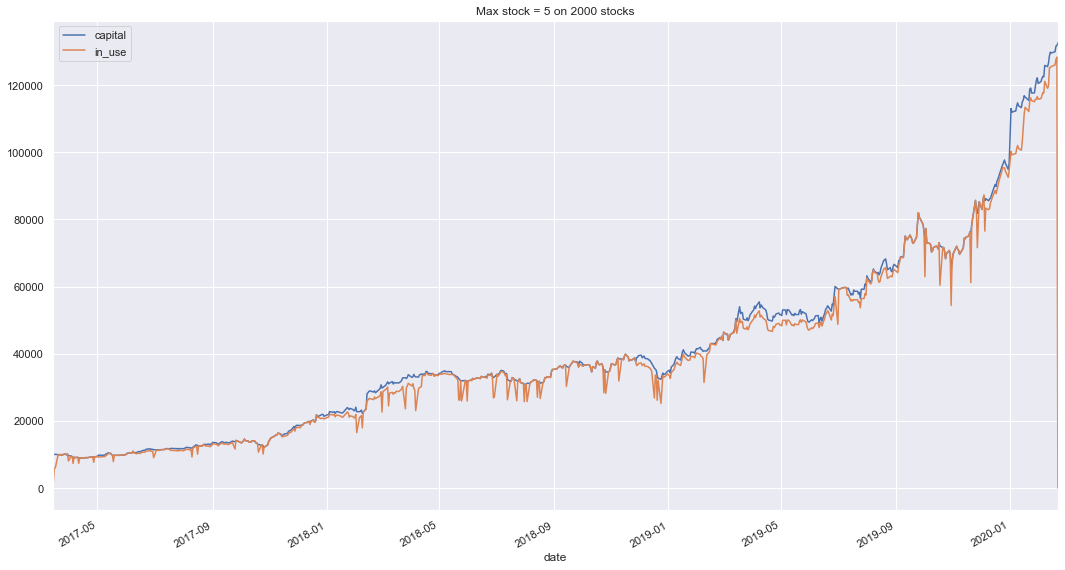

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 2000 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-20    BHR   SELL   2000.000000   1968.072976   228.050171   
0  2017-03-20   CCNE   SELL   2000.000000   2007.114273    88.928413   
0  2017-03-20   CBPO   SELL   2000.000000   1984.502285    19.868865   
0  2017-03-20    JAN   SELL   1998.675066   1998.675066   399.735013   
0  2017-03-20   WRLD   SELL   1990.291624   1990.291624    38.208708   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-21    TGT   SELL  23237.675167  23979.542917   204.935842   
0  2020-02-21   GEOS   SELL  24284.621625  25032.108189  1738.340846   
0  2020-02-21   IOVA   SELL  24513.213670  27737.512681  1067.648679   
0  2020-02-21    CLH   SELL  25840.774326  26163.821394   299.117656   
0  2020-02-21   SMMF   SELL  26295.610153  26233.883369  1028.779740   

    stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0       7.893     0.000000      0.000000         0   -31.927024     -1.60  
0      20.241   -28.457092     -1.397990         0     7.114273      0.36  
0      90.594   -18.478045     -0.922528         0   -15.497715     -0.77  
0       4.500     0.000000      0.000000         0     0.000000      0.00  
0      46.881     0.000000      0.000000         0     0.000000      0.00  
..        ...          ...           ...       ...          ...       ...  
0     102.051  -256.169803     -1.056993         0   741.867749      3.19  
0      12.573   225.984310      0.911002         0   747.486564      3.08  
0      20.664  1174.413547      4.421222         0  3224.299011     13.15  
0      77.751  -269.205891     -1.018445         0   323.047069      1.25  
0      23.004   -61.726784     -0.234742         0   -61.726784     -0.23  

[618 rows x 12 columns]

In [9]:
sell_df.describe()

orig_amount  close_amount     no_shares    stop_loss    daily_gain  \
count    618.000000    618.000000    618.000000   618.000000    618.000000   
mean    7954.757987   8153.113743   1267.942268    42.452604     13.859377   
std     6412.024096   6647.920027   3576.214246    89.409154    740.908042   
min     1563.152829   1551.671307      2.443922     0.153000  -3732.513392   
25%     2610.378286   2669.707549    109.647164     5.150250    -24.432843   
50%     6257.265313   6207.933105    314.309031    14.908500      0.000000   
75%    10608.788097  10734.985702   1168.270091    48.390750     11.807152   
max    26295.610153  33129.350748  65635.486535  1588.500000  16564.675374   

       daily_return  invested          gain    gain_pct  
count    618.000000     618.0    618.000000  618.000000  
mean       0.069634       0.0    198.355755    2.503155  
std        6.231265       0.0   1184.674795   13.267413  
min      -25.526002       0.0  -2031.694693  -23.330000  
25%       -0.456595       0.0      0.000000    0.000000  
50%        0.000000       0.0      0.000000    0.000000  
75%        0.224905       0.0     87.857237    1.542500  
max      100.000000       0.0  15896.276192  122.460000

In [10]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2018-12-20   AVGR   SELL   7105.650508   5447.665390  2368.550169   
0 2017-03-31   ELOX   SELL   1916.770439   1551.671307   456.373914   
0 2017-09-25   CTRC   SELL   2626.334633   2162.863815  1544.902725   
0 2017-10-20   TCCO   SELL   2733.596336   2277.996947   535.999282   
0 2018-07-13   GOGO   SELL   6820.454712   5693.106825  1409.184858   
0 2018-08-17   ELOX   SELL   5496.675410   4622.468061   386.817411   
0 2019-10-30   ENPH   SELL  12921.578245  10889.883552   580.484198   
0 2017-05-18    SES   SELL   2091.699351   1771.792391    38.450356   
0 2018-12-17   CTRC   SELL   7715.939926   6574.119220  1730.031374   
0 2017-04-11   IMGN   SELL   1861.165206   1596.073426   552.274542   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0      2.700 -1184.275085    -17.857143         0 -1657.985119    -23.33  
0      3.780  -273.824348    -15.000000         0  -365.099131    -19.05  
0      1.530  -231.735409     -9.677419         0  -463.470818    -17.65  
0      4.590  -321.599569    -12.371134         0  -455.599389    -16.67  
0      4.356 -1099.164189    -16.182573         0 -1127.347886    -16.53  
0     12.789  -707.875862    -13.280116         0  -874.207349    -15.90  
0     20.034 -3732.513392    -25.526002         0 -2031.694693    -15.72  
0     48.960  -147.649366     -7.692308         0  -319.906959    -15.29  
0      4.014  -536.309726     -7.542579         0 -1141.820707    -14.80  
0      3.033  -104.932163     -6.168831         0  -265.091780    -14.24

In [11]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2019-12-05   MRSN   SELL  12143.072208  27013.465446  6493.621501   
0 2017-12-26   ELOX   SELL   2586.161639   5444.550819   680.568852   
0 2018-03-09   ENPH   SELL   4466.924898   8910.824409  2302.538607   
0 2018-02-13     ZN   SELL   4383.238274   8725.891009  2029.276979   
0 2020-01-02    SES   SELL  17233.074556  33129.350748  2906.083399   
0 2019-03-15   KALV   SELL   8133.697950  12973.584333   448.137628   
0 2019-09-05   MEDP   SELL   7904.988371  12535.550852   151.523641   
0 2020-01-16   RCUS   SELL  13133.864282  20535.159998  1963.208413   
0 2019-08-13   SYRS   SELL   9910.032672  14730.675684  1679.666555   
0 2017-06-12   NVDA   SELL   1670.977854   2477.484510    16.656478   

   stop_loss    daily_gain  daily_return  invested          gain  gain_pct  
0      1.683   -129.872430     -0.478469         0  14870.393238    122.46  
0      3.420    340.284426      6.666667         0   2858.389180    110.53  
0      1.746    184.203089      2.110818         0   4443.899512     99.48  
0      1.944   4058.553958     86.956522         0   4342.652735     99.07  
0      5.337  16564.675374    100.000000         0  15896.276192     92.24  
0     16.335   -963.495900     -6.913183         0   4839.886383     59.50  
0     46.953    203.041679      1.646394         0   4630.562481     58.58  
0      6.021    196.320841      0.965251         0   7401.295716     56.35  
0      5.310    201.559987      1.387283         0   4820.643012     48.64  
0     90.288      6.162897      0.249377         0    806.506656     48.27

In [12]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(142, 0.2297734627831715)

In [13]:
myPnL_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-15   CBPO    BUY   2000.000000   2000.000000    19.868865   
0  2017-03-15   CBPO  CLOSE   2000.000000   2000.000000    19.868865   
0  2017-03-16    BHR    BUY   2000.000000   2000.000000   228.050171   
0  2017-03-16   CCNE    BUY   2000.000000   2000.000000    88.928413   
0  2017-03-16   CBPO  CLOSE   2000.000000   2025.233459    19.868865   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-21    TGT   SELL  23237.675167  23979.542917   204.935842   
0  2020-02-21   GEOS   SELL  24284.621625  25032.108189  1738.340846   
0  2020-02-21   IOVA   SELL  24513.213670  27737.512681  1067.648679   
0  2020-02-21    CLH   SELL  25840.774326  26163.821394   299.117656   
0  2020-02-21   SMMF   SELL  26295.610153  26233.883369  1028.779740   

    stop_loss   daily_gain  daily_return  invested  
0      90.594     0.000000      0.000000         0  
0      90.594     0.000000      0.000000         0  
0       7.893     0.000000      0.000000         0  
0      20.241     0.000000      0.000000         0  
0      90.594    25.233459      1.261673         0  
..        ...          ...           ...       ...  
0     102.051  -256.169803     -1.056993         0  
0      12.573   225.984310      0.911002         0  
0      20.664  1174.413547      4.421222         0  
0      77.751  -269.205891     -1.018445         0  
0      23.004   -61.726784     -0.234742         0  

[4880 rows x 10 columns]

In [14]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['BHR', 'CCNE', 'CBPO', 'JAN', 'WRLD', 'MOH', 'CHNR', 'GLUU',
        'MLAB', 'PTSI', 'CASH', 'OFLX', 'SYX', 'NBIX', 'GEOS', 'DXCM',
        'TGI', 'SGMO', 'ELOX', 'CTRC', 'CBZ', 'CRL', 'EBS', 'TCCO', 'BASI',
        'SCL', 'PODD', 'DPZ', 'BHC', 'STRL', 'ISNS', 'CYH', 'IMGN', 'DAIO',
        'SGC', 'CSGS', 'CCMP', 'TRNS', 'AIRT', 'SES', 'OPNT', 'SRT', 'ZN',
        'SJW', 'TGA', 'CRK', 'SLAB', 'PAAS', 'PZG', 'DOV', 'IOVA', 'NSSC',
        'SPPI', 'ODC', 'VRTX', 'GSIT', 'MU', 'CPHI', 'ATRS', 'ARA', 'AMD',
        'EXAS', 'LMNR', 'TIPT', 'LULU', 'RMD', 'VECO', 'IRDM', 'AVID',
        'PGC', 'PWOD', 'AEL', 'VZ', 'GPS', 'NVDA', 'LZB', 'INS', 'BKH',
        'ARL', 'WTT', 'TSRI', 'MED', 'MELI', 'AEZS', 'PAYS', 'TRST',
        'LHCG', 'HCCI', 'NOA', 'AMWD', 'IMAX', 'CECE', 'UNT', 'RGS',
        'HOFT', 'ATSG', 'THR', 'AGX', 'COST', 'FORM', 'TACT', 'IIN',
        'HSII', 'ATLC', 'GWW', 'EDUC', 'IPHI', 'KIRK', 'CTHR', 'AMPE',
        'ZIXI', 'ABIO', 'SCCO', 'AAPL', 'BFS', 'FMBI', 'MNTX',

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
291    SES  15241.892745
215   MRSN  14870.393238
271   RCUS   7401.295716
246   OVID   5803.162436
281   RUBI   4929.926598
315   SYRS   4820.643012
204   MEDP   4630.562481
113   ELOX   4522.684869
114   ENPH   4266.947764
117   ESNT   4097.345868

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
318   TCCO -2866.079965
289   SELB -2178.703374
39    AVGR -2171.250737
92    CTRC -1870.028733
272   REKR -1790.850691
307   STRM -1378.612324
27    ARDX -1353.278617
9     AGRX -1300.963637
269   RACE  -858.756103
335   TRVN  -783.470758

In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
215   MRSN  14870.393238
271   RCUS   7401.295716
246   OVID   5803.162436
315   SYRS   4820.643012
204   MEDP   4630.562481
236   NXRT   3406.070681
135   FRTA   3291.776625
291    SES   3048.378549
281   RUBI   2464.963299
187    KOD   2288.446913

In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
272   REKR -1790.850691
289   SELB -1089.351687
39    AVGR -1085.625369
269   RACE  -858.756103
335   TRVN  -783.470758
307   STRM  -689.306162
27    ARDX  -676.639308
9     AGRX  -650.481818
326   TLRA  -640.180035
275   RICK  -602.806339

# Suspicious Stocks

Below are the plotted close price plots as returned by yfinance. 

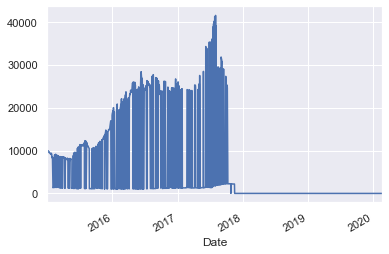

In [19]:
# Google shows close price between $8 - $16, so something seems to be wrong here
asset  = yf.Ticker('SBT')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

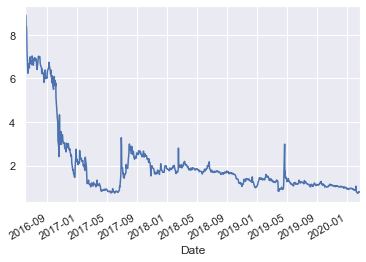

In [20]:
# Data looks okay - there's just a quick change around 2019-04-22 and then a big drop on 2019-04-23.
# Trade is still profitable. Modified the stop_loss logic to match what stockbrokers do...
asset  = yf.Ticker('MBRX')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

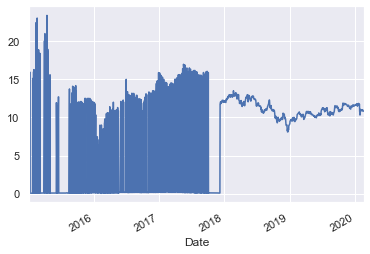

In [21]:
# LBC stock looks suspicious => exclude and rerun...
asset  = yf.Ticker('LBC')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

In [22]:
myCapital_df.tail()

date capital  in_use     free
date                                          
2020-02-14 2020-02-14  129581  125577   4004.2
2020-02-18 2020-02-18  129955  126007  3948.26
2020-02-19 2020-02-19  131663  127715  3948.26
2020-02-20 2020-02-20  131771  128334  3436.99
2020-02-21 2020-02-21  132584       0   132584

In [23]:
len(possible_trades_df)

21692